In [1]:
import scipy
from mlxtend.evaluate import bias_variance_decomp
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import numpy as np

from scipy.stats import bootstrap

import matplotlib.pyplot as plt
import catboost as cb

2023-02-17 20:11:42.024972: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 20:11:45.184567: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.1/lib64:
2023-02-17 20:11:45.184621: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-17 20:11:53.855239: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open share

## load data
- http://rasbt.github.io/mlxtend/user_guide/data/boston_housing_data/#boston_housing_data-the-boston-housing-dataset-for-regression

In [2]:
np.random.seed(1)
tf.random.set_seed(1)


X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)


## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
model = DecisionTreeRegressor(random_state=0)

In [22]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [23]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 4.22
R2: 0.78


In [24]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(model.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.0
R2 score is 1.0




In [25]:
pred_error_cart = y_train_predict - y_train

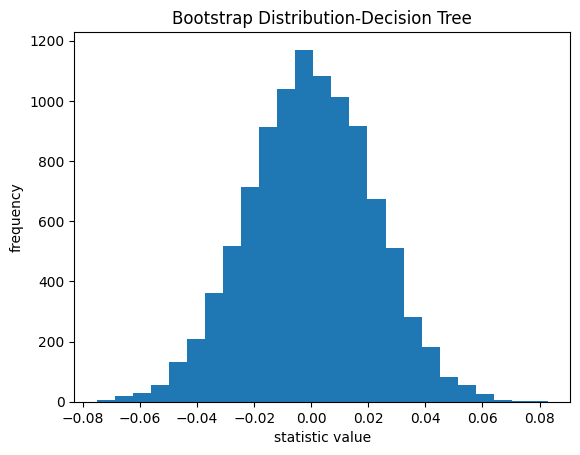

In [26]:
rng = np.random.default_rng()

data = (pred_error_cat,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-Decision Tree')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

In [27]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, X_train, y_train, X_train, y_train, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 8.325
Average bias: 1.573
Average variance: 6.753


## Lightgbm
- https://juliaai.github.io/DataScienceTutorials.jl/end-to-end/boston-lgbm/

In [28]:
from lightgbm import LGBMRegressor

In [29]:
model = LGBMRegressor()

In [30]:
model.fit(X_train, y_train)

LGBMRegressor()

In [31]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 4.14
R2: 0.79


In [32]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(model.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1.4401737533944294
R2 score is 0.98




In [33]:
pred_error_lgb = y_train_predict - y_train

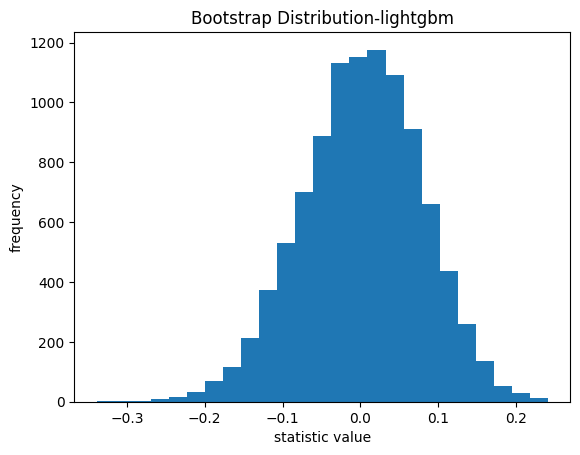

In [34]:
rng = np.random.default_rng()

data = (pred_error_lgb,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-lightgbm')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

In [35]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, X_train, y_train, X_train, y_train, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 6.018
Average bias: 3.513
Average variance: 2.505


## from xgboost import XGBRegressor

In [36]:
from xgboost import XGBRegressor

In [37]:
model = XGBRegressor()

In [38]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [39]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 3.67
R2: 0.83


In [40]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(model.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.010162192500651113
R2 score is 1.0




In [41]:
pred_error_xgb = y_train_predict - y_train

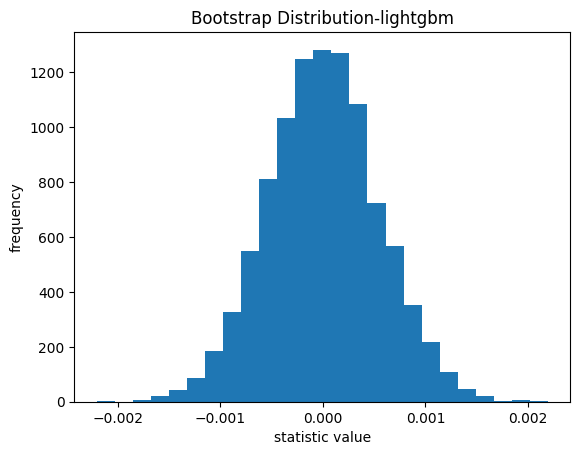

In [42]:
rng = np.random.default_rng()

data = (pred_error_xgb,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-lightgbm')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

## Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
model = RandomForestRegressor()

In [59]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 3.79
R2: 0.82


In [61]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(model.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1.2851056684553384
R2 score is 0.98




In [62]:
pred_error_rf = y_train_predict - y_train

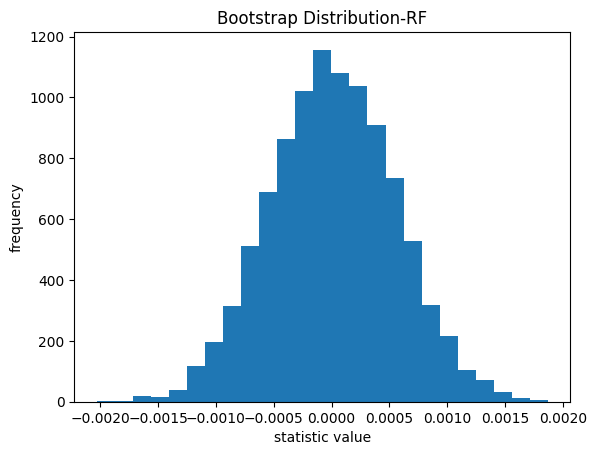

In [63]:
rng = np.random.default_rng()

data = (pred_error_xgb,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-RF')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

## Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
model = GradientBoostingRegressor()

In [66]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [67]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 3.61
R2: 0.84


In [68]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(model.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1.2132292691198048
R2 score is 0.98




In [69]:
pred_error_gb = y_train_predict - y_train

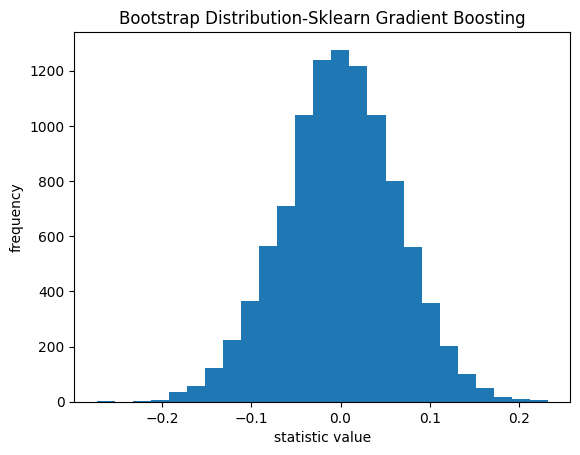

In [70]:
rng = np.random.default_rng()

data = (pred_error_gb,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-Sklearn Gradient Boosting')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

### CATBOOST

In [6]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [10]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [11]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 24.2104899	test: 22.5996842	best: 22.5996842 (0)	total: 48.2ms	remaining: 4.78s
1:	learn: 23.5881240	test: 21.9857266	best: 21.9857266 (1)	total: 49.8ms	remaining: 2.44s
2:	learn: 22.9403945	test: 21.3639856	best: 21.3639856 (2)	total: 50.5ms	remaining: 1.63s
3:	learn: 22.3548825	test: 20.7924550	best: 20.7924550 (3)	total: 51.2ms	remaining: 1.23s
4:	learn: 21.7829074	test: 20.2310752	best: 20.2310752 (4)	total: 52ms	remaining: 988ms
5:	learn: 21.2198998	test: 19.6805256	best: 19.6805256 (5)	total: 53ms	remaining: 830ms
6:	learn: 20.6544835	test: 19.1372643	best: 19.1372643 (6)	total: 53.7ms	remaining: 713ms
7:	learn: 20.1346742	test: 18.6074641	best: 18.6074641 (7)	total: 54.4ms	remaining: 626ms
8:	learn: 19.6099502	test: 18.0890087	best: 18.0890087 (8)	total: 55.1ms	remaining: 557ms
9:	learn: 19.1270299	test: 17.6015891	best: 17.6015891 (9)	total: 55.8ms	remaining: 502ms
10:	learn: 18.6273681	test: 17.1048533	best: 17.1048533 (10)	total: 56.5ms	remaining: 457ms
11:	learn: 1

13:	learn: 17.3858136	test: 15.8413745	best: 15.8413745 (13)	total: 3.55ms	remaining: 21.8ms
14:	learn: 16.9844634	test: 15.4353930	best: 15.4353930 (14)	total: 3.98ms	remaining: 22.5ms
15:	learn: 16.5563611	test: 15.0309645	best: 15.0309645 (15)	total: 4.38ms	remaining: 23ms
16:	learn: 16.1375826	test: 14.6345138	best: 14.6345138 (16)	total: 4.88ms	remaining: 23.9ms
17:	learn: 15.7379291	test: 14.2732069	best: 14.2732069 (17)	total: 5.4ms	remaining: 24.6ms
18:	learn: 15.3662416	test: 13.9130732	best: 13.9130732 (18)	total: 5.78ms	remaining: 24.7ms
19:	learn: 14.9824941	test: 13.5407639	best: 13.5407639 (19)	total: 6.38ms	remaining: 25.5ms
20:	learn: 14.6378732	test: 13.1988740	best: 13.1988740 (20)	total: 6.65ms	remaining: 25ms
21:	learn: 14.2786976	test: 12.8494790	best: 12.8494790 (21)	total: 6.85ms	remaining: 24.3ms
22:	learn: 13.9478476	test: 12.5399257	best: 12.5399257 (22)	total: 7.06ms	remaining: 23.6ms
23:	learn: 13.6126419	test: 12.2199124	best: 12.2199124 (23)	total: 7.37ms	

44:	learn: 8.6164526	test: 7.5341257	best: 7.5341257 (44)	total: 12.3ms	remaining: 28.6ms
45:	learn: 8.4453686	test: 7.3732366	best: 7.3732366 (45)	total: 12.9ms	remaining: 29.2ms
46:	learn: 8.2756777	test: 7.2181401	best: 7.2181401 (46)	total: 13.1ms	remaining: 28.7ms
47:	learn: 8.1486808	test: 7.1098941	best: 7.1098941 (47)	total: 13.3ms	remaining: 28.3ms
48:	learn: 8.0061754	test: 6.9872059	best: 6.9872059 (48)	total: 13.5ms	remaining: 27.8ms
49:	learn: 7.8611808	test: 6.8503959	best: 6.8503959 (49)	total: 13.7ms	remaining: 27.3ms
50:	learn: 7.7193383	test: 6.7206265	best: 6.7206265 (50)	total: 13.8ms	remaining: 26.9ms
51:	learn: 7.5920534	test: 6.6043625	best: 6.6043625 (51)	total: 14ms	remaining: 26.4ms
52:	learn: 7.4470844	test: 6.4687191	best: 6.4687191 (52)	total: 14.2ms	remaining: 26ms
53:	learn: 7.3394037	test: 6.3643022	best: 6.3643022 (53)	total: 14.4ms	remaining: 25.6ms
54:	learn: 7.2073825	test: 6.2589103	best: 6.2589103 (54)	total: 14.6ms	remaining: 25.1ms
55:	learn: 7.0

9:	learn: 19.1270299	test: 17.6015891	best: 17.6015891 (9)	total: 2.81ms	remaining: 53.3ms
10:	learn: 18.6273681	test: 17.1048533	best: 17.1048533 (10)	total: 3.34ms	remaining: 57.4ms
11:	learn: 18.1738552	test: 16.6570944	best: 16.6570944 (11)	total: 3.65ms	remaining: 57.2ms
12:	learn: 17.7334705	test: 16.2089706	best: 16.2089706 (12)	total: 3.85ms	remaining: 55.4ms
13:	learn: 17.3107194	test: 15.7852399	best: 15.7852399 (13)	total: 4.04ms	remaining: 53.7ms
14:	learn: 16.9072286	test: 15.3777738	best: 15.3777738 (14)	total: 4.23ms	remaining: 52.2ms
15:	learn: 16.4728845	test: 14.9680650	best: 14.9680650 (15)	total: 4.42ms	remaining: 50.9ms
16:	learn: 16.0465302	test: 14.5655369	best: 14.5655369 (16)	total: 4.62ms	remaining: 49.7ms
17:	learn: 15.6410912	test: 14.2003971	best: 14.2003971 (17)	total: 4.81ms	remaining: 48.6ms
18:	learn: 15.2687536	test: 13.8406146	best: 13.8406146 (18)	total: 4.99ms	remaining: 47.6ms
19:	learn: 14.8805294	test: 13.4659912	best: 13.4659912 (19)	total: 5.18

63:	learn: 6.3894892	test: 5.4770869	best: 5.4770869 (63)	total: 13.6ms	remaining: 28.9ms
64:	learn: 6.2967050	test: 5.3971249	best: 5.3971249 (64)	total: 14ms	remaining: 29ms
65:	learn: 6.2125499	test: 5.3172732	best: 5.3172732 (65)	total: 14.2ms	remaining: 28.7ms
66:	learn: 6.1298901	test: 5.2471830	best: 5.2471830 (66)	total: 14.3ms	remaining: 28.5ms
67:	learn: 6.0587046	test: 5.1786906	best: 5.1786906 (67)	total: 14.5ms	remaining: 28.2ms
68:	learn: 5.9704860	test: 5.0982907	best: 5.0982907 (68)	total: 14.7ms	remaining: 27.9ms
69:	learn: 5.8905177	test: 5.0379241	best: 5.0379241 (69)	total: 14.9ms	remaining: 27.6ms
70:	learn: 5.8238557	test: 4.9803251	best: 4.9803251 (70)	total: 15.1ms	remaining: 27.4ms
71:	learn: 5.7443127	test: 4.9251286	best: 4.9251286 (71)	total: 16.8ms	remaining: 29.9ms
72:	learn: 5.6723428	test: 4.8736312	best: 4.8736312 (72)	total: 17ms	remaining: 29.6ms
73:	learn: 5.6129277	test: 4.8073012	best: 4.8073012 (73)	total: 17.2ms	remaining: 29.3ms
74:	learn: 5.541

88:	learn: 2.8503203	test: 2.8873240	best: 2.8781922 (84)	total: 16.4ms	remaining: 20.5ms
89:	learn: 2.8326678	test: 2.8660843	best: 2.8660843 (89)	total: 17ms	remaining: 20.8ms
90:	learn: 2.8217743	test: 2.8628217	best: 2.8628217 (90)	total: 17.3ms	remaining: 20.7ms
91:	learn: 2.8106840	test: 2.8668537	best: 2.8628217 (90)	total: 17.5ms	remaining: 20.5ms
92:	learn: 2.7983184	test: 2.8603197	best: 2.8603197 (92)	total: 17.7ms	remaining: 20.3ms
93:	learn: 2.7860316	test: 2.8551490	best: 2.8551490 (93)	total: 17.9ms	remaining: 20.1ms
94:	learn: 2.7770162	test: 2.8549268	best: 2.8549268 (94)	total: 18ms	remaining: 19.9ms
95:	learn: 2.7633010	test: 2.8461509	best: 2.8461509 (95)	total: 18.2ms	remaining: 19.7ms
96:	learn: 2.7549997	test: 2.8438311	best: 2.8438311 (96)	total: 18.4ms	remaining: 19.5ms
97:	learn: 2.7452126	test: 2.8316973	best: 2.8316973 (97)	total: 18.6ms	remaining: 19.3ms
98:	learn: 2.7361020	test: 2.8293988	best: 2.8293988 (98)	total: 18.8ms	remaining: 19.2ms
99:	learn: 2.7

58:	learn: 2.4503719	test: 3.0983114	best: 3.0983114 (58)	total: 22.2ms	remaining: 15.4ms
59:	learn: 2.4266320	test: 3.0913786	best: 3.0913786 (59)	total: 22.9ms	remaining: 15.3ms
60:	learn: 2.3862862	test: 3.0809122	best: 3.0809122 (60)	total: 23.3ms	remaining: 14.9ms
61:	learn: 2.3558807	test: 3.0714101	best: 3.0714101 (61)	total: 23.7ms	remaining: 14.6ms
62:	learn: 2.3363300	test: 3.0438084	best: 3.0438084 (62)	total: 24.2ms	remaining: 14.2ms
63:	learn: 2.3049826	test: 3.0245014	best: 3.0245014 (63)	total: 24.6ms	remaining: 13.8ms
64:	learn: 2.2789530	test: 3.0192037	best: 3.0192037 (64)	total: 28.8ms	remaining: 15.5ms
65:	learn: 2.2611394	test: 3.0233347	best: 3.0192037 (64)	total: 29.4ms	remaining: 15.2ms
66:	learn: 2.2434447	test: 3.0083457	best: 3.0083457 (66)	total: 30.1ms	remaining: 14.8ms
67:	learn: 2.2268920	test: 2.9955597	best: 2.9955597 (67)	total: 30.8ms	remaining: 14.5ms
68:	learn: 2.2052057	test: 2.9903004	best: 2.9903004 (68)	total: 31.5ms	remaining: 14.2ms
69:	learn:

87:	learn: 2.3966458	test: 3.1266258	best: 3.1266258 (87)	total: 40.2ms	remaining: 5.49ms
88:	learn: 2.3794820	test: 3.1292261	best: 3.1266258 (87)	total: 40.9ms	remaining: 5.06ms
89:	learn: 2.3627788	test: 3.1321042	best: 3.1266258 (87)	total: 41.5ms	remaining: 4.61ms
90:	learn: 2.3435420	test: 3.1339370	best: 3.1266258 (87)	total: 42.2ms	remaining: 4.17ms
91:	learn: 2.3301750	test: 3.1265972	best: 3.1265972 (91)	total: 42.8ms	remaining: 3.72ms
92:	learn: 2.3210065	test: 3.1334142	best: 3.1265972 (91)	total: 43.4ms	remaining: 3.27ms
93:	learn: 2.3099965	test: 3.1235378	best: 3.1235378 (93)	total: 44.3ms	remaining: 2.83ms
94:	learn: 2.3035131	test: 3.1218336	best: 3.1218336 (94)	total: 45ms	remaining: 2.37ms
95:	learn: 2.2883009	test: 3.1150791	best: 3.1150791 (95)	total: 45.6ms	remaining: 1.9ms
96:	learn: 2.2817316	test: 3.1233133	best: 3.1150791 (95)	total: 46ms	remaining: 1.42ms
97:	learn: 2.2544109	test: 3.1063694	best: 3.1063694 (97)	total: 46.5ms	remaining: 948us
98:	learn: 2.236

131:	learn: 3.0039358	test: 3.1663453	best: 3.1663453 (131)	total: 47.5ms	remaining: 6.47ms
132:	learn: 2.9919713	test: 3.1602406	best: 3.1602406 (132)	total: 48.7ms	remaining: 6.22ms
133:	learn: 2.9686310	test: 3.1479809	best: 3.1479809 (133)	total: 49.8ms	remaining: 5.94ms
134:	learn: 2.9548801	test: 3.1402714	best: 3.1402714 (134)	total: 50.7ms	remaining: 5.63ms
135:	learn: 2.9422512	test: 3.1251021	best: 3.1251021 (135)	total: 51.6ms	remaining: 5.31ms
136:	learn: 2.9311984	test: 3.1211742	best: 3.1211742 (136)	total: 52.7ms	remaining: 5ms
137:	learn: 2.9097819	test: 3.1129137	best: 3.1129137 (137)	total: 53.8ms	remaining: 4.67ms
138:	learn: 2.9003897	test: 3.1050806	best: 3.1050806 (138)	total: 54.8ms	remaining: 4.34ms
139:	learn: 2.8865829	test: 3.1007939	best: 3.1007939 (139)	total: 55.8ms	remaining: 3.98ms
140:	learn: 2.8712704	test: 3.0920233	best: 3.0920233 (140)	total: 56.7ms	remaining: 3.62ms
141:	learn: 2.8582851	test: 3.0824255	best: 3.0824255 (141)	total: 57.6ms	remaining

95:	learn: 1.8871843	test: 3.1330543	best: 3.0894458 (82)	total: 35ms	remaining: 19.7ms
96:	learn: 1.8738652	test: 3.1416226	best: 3.0894458 (82)	total: 35.8ms	remaining: 19.6ms
97:	learn: 1.8586607	test: 3.1268912	best: 3.0894458 (82)	total: 36.4ms	remaining: 19.3ms
98:	learn: 1.8455079	test: 3.1295945	best: 3.0894458 (82)	total: 36.8ms	remaining: 18.9ms
99:	learn: 1.8364200	test: 3.1320312	best: 3.0894458 (82)	total: 37.2ms	remaining: 18.6ms
100:	learn: 1.8238772	test: 3.1404057	best: 3.0894458 (82)	total: 37.6ms	remaining: 18.2ms
101:	learn: 1.8092161	test: 3.1298449	best: 3.0894458 (82)	total: 38ms	remaining: 17.9ms
102:	learn: 1.8005065	test: 3.1374952	best: 3.0894458 (82)	total: 38.4ms	remaining: 17.5ms
103:	learn: 1.7962480	test: 3.1390776	best: 3.0894458 (82)	total: 38.8ms	remaining: 17.2ms
104:	learn: 1.7873361	test: 3.1478849	best: 3.0894458 (82)	total: 39.2ms	remaining: 16.8ms
105:	learn: 1.7777712	test: 3.1426458	best: 3.0894458 (82)	total: 39.6ms	remaining: 16.4ms
106:	lea

30:	learn: 11.0326600	test: 10.2130389	best: 10.2130389 (30)	total: 11.8ms	remaining: 64.2ms
31:	learn: 10.7757873	test: 9.9812783	best: 9.9812783 (31)	total: 12.1ms	remaining: 63.7ms
32:	learn: 10.5140787	test: 9.7352639	best: 9.7352639 (32)	total: 12.5ms	remaining: 63.3ms
33:	learn: 10.2680396	test: 9.5178098	best: 9.5178098 (33)	total: 12.9ms	remaining: 62.9ms
34:	learn: 10.0365984	test: 9.3109261	best: 9.3109261 (34)	total: 16.5ms	remaining: 78ms
35:	learn: 9.7993915	test: 9.0901447	best: 9.0901447 (35)	total: 16.9ms	remaining: 77ms
36:	learn: 9.6044585	test: 8.9012086	best: 8.9012086 (36)	total: 17.3ms	remaining: 76.1ms
37:	learn: 9.3872778	test: 8.6975209	best: 8.6975209 (37)	total: 17.6ms	remaining: 75.1ms
38:	learn: 9.1750907	test: 8.4931046	best: 8.4931046 (38)	total: 18ms	remaining: 74.2ms
39:	learn: 8.9655604	test: 8.3216156	best: 8.3216156 (39)	total: 18.3ms	remaining: 73.3ms
40:	learn: 8.7771381	test: 8.1561000	best: 8.1561000 (40)	total: 18.7ms	remaining: 72.4ms
41:	learn

185:	learn: 0.9682846	test: 2.7444001	best: 2.7438881 (183)	total: 103ms	remaining: 7.75ms
186:	learn: 0.9602828	test: 2.7412546	best: 2.7412546 (186)	total: 104ms	remaining: 7.21ms
187:	learn: 0.9558956	test: 2.7457068	best: 2.7412546 (186)	total: 106ms	remaining: 6.77ms
188:	learn: 0.9516507	test: 2.7451976	best: 2.7412546 (186)	total: 106ms	remaining: 6.19ms
189:	learn: 0.9480261	test: 2.7439192	best: 2.7412546 (186)	total: 107ms	remaining: 5.62ms
190:	learn: 0.9444710	test: 2.7444141	best: 2.7412546 (186)	total: 108ms	remaining: 5.1ms
191:	learn: 0.9409941	test: 2.7452532	best: 2.7412546 (186)	total: 109ms	remaining: 4.55ms
192:	learn: 0.9358564	test: 2.7432014	best: 2.7412546 (186)	total: 110ms	remaining: 3.99ms
193:	learn: 0.9294497	test: 2.7454541	best: 2.7412546 (186)	total: 111ms	remaining: 3.42ms
194:	learn: 0.9236465	test: 2.7451199	best: 2.7412546 (186)	total: 111ms	remaining: 2.85ms
195:	learn: 0.9175302	test: 2.7423667	best: 2.7412546 (186)	total: 112ms	remaining: 2.29ms


32:	learn: 10.8305380	test: 10.0343396	best: 10.0343396 (32)	total: 12.8ms	remaining: 64.8ms
33:	learn: 10.5894468	test: 9.8153487	best: 9.8153487 (33)	total: 13.4ms	remaining: 65.5ms
34:	learn: 10.3610903	test: 9.6090762	best: 9.6090762 (34)	total: 13.8ms	remaining: 65ms
35:	learn: 10.1221502	test: 9.3869350	best: 9.3869350 (35)	total: 14.2ms	remaining: 64.6ms
36:	learn: 9.9266431	test: 9.1959755	best: 9.1959755 (36)	total: 14.5ms	remaining: 64.1ms
37:	learn: 9.7094998	test: 8.9921281	best: 8.9921281 (37)	total: 14.9ms	remaining: 63.6ms
38:	learn: 9.4994614	test: 8.7930947	best: 8.7930947 (38)	total: 15.3ms	remaining: 63.1ms
39:	learn: 9.2949693	test: 8.6233936	best: 8.6233936 (39)	total: 15.9ms	remaining: 63.5ms
40:	learn: 9.0874707	test: 8.4496401	best: 8.4496401 (40)	total: 17.2ms	remaining: 66.6ms
41:	learn: 8.8929986	test: 8.2473418	best: 8.2473418 (41)	total: 17.6ms	remaining: 66.1ms
42:	learn: 8.7145398	test: 8.0878194	best: 8.0878194 (42)	total: 18.4ms	remaining: 67.2ms
43:	le

69:	learn: 6.0041852	test: 5.5516988	best: 5.5516988 (69)	total: 26.1ms	remaining: 48.4ms
70:	learn: 5.9182682	test: 5.4752473	best: 5.4752473 (70)	total: 29ms	remaining: 52.7ms
71:	learn: 5.8306889	test: 5.3991333	best: 5.3991333 (71)	total: 32.1ms	remaining: 57.1ms
72:	learn: 5.7546229	test: 5.3254019	best: 5.3254019 (72)	total: 32.8ms	remaining: 57ms
73:	learn: 5.6770544	test: 5.2478905	best: 5.2478905 (73)	total: 33.5ms	remaining: 57ms
74:	learn: 5.6046324	test: 5.1853207	best: 5.1853207 (74)	total: 34.1ms	remaining: 56.8ms
75:	learn: 5.5433151	test: 5.1447488	best: 5.1447488 (75)	total: 34.8ms	remaining: 56.8ms
76:	learn: 5.4868855	test: 5.0928209	best: 5.0928209 (76)	total: 35.4ms	remaining: 56.6ms
77:	learn: 5.4321638	test: 5.0375680	best: 5.0375680 (77)	total: 36.1ms	remaining: 56.5ms
78:	learn: 5.3583186	test: 4.9682803	best: 4.9682803 (78)	total: 36.8ms	remaining: 56.3ms
79:	learn: 5.2994223	test: 4.9085690	best: 4.9085690 (79)	total: 37.7ms	remaining: 56.5ms
80:	learn: 5.239

47:	learn: 7.3322612	test: 7.0012357	best: 7.0012357 (47)	total: 40.6ms	remaining: 44ms
48:	learn: 7.1776084	test: 6.8734876	best: 6.8734876 (48)	total: 41.8ms	remaining: 43.5ms
49:	learn: 7.0026078	test: 6.7252350	best: 6.7252350 (49)	total: 42.5ms	remaining: 42.5ms
50:	learn: 6.8608564	test: 6.5987765	best: 6.5987765 (50)	total: 43.3ms	remaining: 41.6ms
51:	learn: 6.7319837	test: 6.4832586	best: 6.4832586 (51)	total: 44ms	remaining: 40.6ms
52:	learn: 6.5916202	test: 6.3570666	best: 6.3570666 (52)	total: 45ms	remaining: 39.9ms
53:	learn: 6.4556904	test: 6.2396911	best: 6.2396911 (53)	total: 45.8ms	remaining: 39ms
54:	learn: 6.3104181	test: 6.1221809	best: 6.1221809 (54)	total: 46.6ms	remaining: 38.1ms
55:	learn: 6.1729740	test: 6.0172205	best: 6.0172205 (55)	total: 47.3ms	remaining: 37.1ms
56:	learn: 6.0471997	test: 5.9132896	best: 5.9132896 (56)	total: 48.1ms	remaining: 36.3ms
57:	learn: 5.9195599	test: 5.8014921	best: 5.8014921 (57)	total: 48.8ms	remaining: 35.4ms
58:	learn: 5.79074

81:	learn: 4.1406394	test: 4.3275641	best: 4.3275641 (81)	total: 63.7ms	remaining: 14ms
82:	learn: 4.0789756	test: 4.2716854	best: 4.2716854 (82)	total: 65.1ms	remaining: 13.3ms
83:	learn: 4.0247242	test: 4.2271726	best: 4.2271726 (83)	total: 65.8ms	remaining: 12.5ms
84:	learn: 3.9679024	test: 4.1794924	best: 4.1794924 (84)	total: 66.5ms	remaining: 11.7ms
85:	learn: 3.9207382	test: 4.1418586	best: 4.1418586 (85)	total: 67.2ms	remaining: 10.9ms
86:	learn: 3.8648303	test: 4.1009063	best: 4.1009063 (86)	total: 68ms	remaining: 10.2ms
87:	learn: 3.8128925	test: 4.0713420	best: 4.0713420 (87)	total: 68.7ms	remaining: 9.37ms
88:	learn: 3.7512429	test: 4.0269320	best: 4.0269320 (88)	total: 69.4ms	remaining: 8.58ms
89:	learn: 3.6997607	test: 3.9956965	best: 3.9956965 (89)	total: 70.1ms	remaining: 7.79ms
90:	learn: 3.6636393	test: 3.9640151	best: 3.9640151 (90)	total: 71ms	remaining: 7.02ms
91:	learn: 3.6185505	test: 3.9234449	best: 3.9234449 (91)	total: 71.7ms	remaining: 6.24ms
92:	learn: 3.573

7:	learn: 12.3431469	test: 11.6075919	best: 11.6075919 (7)	total: 6.82ms	remaining: 78.4ms
8:	learn: 11.3742278	test: 10.6638955	best: 10.6638955 (8)	total: 7.8ms	remaining: 78.9ms
9:	learn: 10.5422683	test: 9.8848841	best: 9.8848841 (9)	total: 8.61ms	remaining: 77.5ms
10:	learn: 9.7612857	test: 9.2149738	best: 9.2149738 (10)	total: 9.71ms	remaining: 78.5ms
11:	learn: 9.0549565	test: 8.5635500	best: 8.5635500 (11)	total: 10.9ms	remaining: 80ms
12:	learn: 8.4236399	test: 7.9928322	best: 7.9928322 (12)	total: 12.1ms	remaining: 80.8ms
13:	learn: 7.8711294	test: 7.4782160	best: 7.4782160 (13)	total: 13.6ms	remaining: 83.5ms
14:	learn: 7.3885687	test: 7.0850623	best: 7.0850623 (14)	total: 14.4ms	remaining: 81.6ms
15:	learn: 6.9504234	test: 6.7026624	best: 6.7026624 (15)	total: 15.3ms	remaining: 80.1ms
16:	learn: 6.5461126	test: 6.3865248	best: 6.3865248 (16)	total: 16.1ms	remaining: 78.6ms
17:	learn: 6.1436873	test: 6.0672953	best: 6.0672953 (17)	total: 16.9ms	remaining: 77.1ms
18:	learn: 5

22:	learn: 5.5149630	test: 5.3277577	best: 5.3277577 (22)	total: 22ms	remaining: 73.6ms
23:	learn: 5.2749338	test: 5.1273012	best: 5.1273012 (23)	total: 23.5ms	remaining: 74.4ms
24:	learn: 5.0609454	test: 4.9573758	best: 4.9573758 (24)	total: 24.6ms	remaining: 73.8ms
25:	learn: 4.9083638	test: 4.8558905	best: 4.8558905 (25)	total: 25.5ms	remaining: 72.6ms
26:	learn: 4.7194142	test: 4.7073768	best: 4.7073768 (26)	total: 27ms	remaining: 73ms
27:	learn: 4.5684772	test: 4.5946428	best: 4.5946428 (27)	total: 28.2ms	remaining: 72.4ms
28:	learn: 4.3973197	test: 4.4820045	best: 4.4820045 (28)	total: 29.1ms	remaining: 71.3ms
29:	learn: 4.2160297	test: 4.3163706	best: 4.3163706 (29)	total: 30.2ms	remaining: 70.5ms
30:	learn: 4.1102550	test: 4.2207753	best: 4.2207753 (30)	total: 31.4ms	remaining: 69.9ms
31:	learn: 3.9975939	test: 4.0976583	best: 4.0976583 (31)	total: 32.4ms	remaining: 68.7ms
32:	learn: 3.8758062	test: 3.9923012	best: 3.9923012 (32)	total: 33.8ms	remaining: 68.5ms
33:	learn: 3.771

9:	learn: 9.9420489	test: 9.3660237	best: 9.3660237 (9)	total: 8.37ms	remaining: 117ms
10:	learn: 9.2209696	test: 8.7181014	best: 8.7181014 (10)	total: 9.91ms	remaining: 125ms
11:	learn: 8.5312204	test: 8.0795747	best: 8.0795747 (11)	total: 12.3ms	remaining: 141ms
12:	learn: 7.8997975	test: 7.5078101	best: 7.5078101 (12)	total: 13.2ms	remaining: 139ms
13:	learn: 7.3561054	test: 7.0127413	best: 7.0127413 (13)	total: 14.2ms	remaining: 138ms
14:	learn: 6.8780984	test: 6.6222710	best: 6.6222710 (14)	total: 15.4ms	remaining: 139ms
15:	learn: 6.4553676	test: 6.2467579	best: 6.2467579 (15)	total: 16.5ms	remaining: 138ms
16:	learn: 6.0482519	test: 5.9081419	best: 5.9081419 (16)	total: 18.1ms	remaining: 142ms
17:	learn: 5.6631393	test: 5.6030126	best: 5.6030126 (17)	total: 19.2ms	remaining: 141ms
18:	learn: 5.2734638	test: 5.3300683	best: 5.3300683 (18)	total: 20.6ms	remaining: 142ms
19:	learn: 4.9446445	test: 5.0995644	best: 5.0995644 (19)	total: 21.7ms	remaining: 141ms
20:	learn: 4.6672232	te

70:	learn: 4.9011597	test: 4.9607021	best: 4.9607021 (70)	total: 57.8ms	remaining: 64.3ms
71:	learn: 4.8305353	test: 4.9025878	best: 4.9025878 (71)	total: 59.2ms	remaining: 64.2ms
72:	learn: 4.7591880	test: 4.8465436	best: 4.8465436 (72)	total: 60.4ms	remaining: 63.7ms
73:	learn: 4.6805273	test: 4.7765117	best: 4.7765117 (73)	total: 61.4ms	remaining: 63.1ms
74:	learn: 4.6101712	test: 4.7316007	best: 4.7316007 (74)	total: 62.6ms	remaining: 62.6ms
75:	learn: 4.5390169	test: 4.6751925	best: 4.6751925 (75)	total: 63.6ms	remaining: 62ms
76:	learn: 4.4651823	test: 4.6073112	best: 4.6073112 (76)	total: 64.8ms	remaining: 61.4ms
77:	learn: 4.4019396	test: 4.5551973	best: 4.5551973 (77)	total: 65.8ms	remaining: 60.7ms
78:	learn: 4.3304901	test: 4.4993180	best: 4.4993180 (78)	total: 67.1ms	remaining: 60.3ms
79:	learn: 4.2735172	test: 4.4468795	best: 4.4468795 (79)	total: 68.9ms	remaining: 60.3ms
80:	learn: 4.2088698	test: 4.3866368	best: 4.3866368 (80)	total: 70ms	remaining: 59.6ms
81:	learn: 4.1

19:	learn: 14.9355504	test: 13.9585037	best: 13.9585037 (19)	total: 16.3ms	remaining: 106ms
20:	learn: 14.5699654	test: 13.6003712	best: 13.6003712 (20)	total: 17.8ms	remaining: 109ms
21:	learn: 14.2384452	test: 13.2759278	best: 13.2759278 (21)	total: 18.3ms	remaining: 107ms
22:	learn: 13.8887394	test: 12.9537317	best: 12.9537317 (22)	total: 19.3ms	remaining: 107ms
23:	learn: 13.5350868	test: 12.6354797	best: 12.6354797 (23)	total: 20.4ms	remaining: 107ms
24:	learn: 13.2151744	test: 12.3606684	best: 12.3606684 (24)	total: 21.5ms	remaining: 107ms
25:	learn: 12.9122902	test: 12.0573993	best: 12.0573993 (25)	total: 22.6ms	remaining: 108ms
26:	learn: 12.6195886	test: 11.7765916	best: 11.7765916 (26)	total: 23.7ms	remaining: 108ms
27:	learn: 12.3411379	test: 11.5290377	best: 11.5290377 (27)	total: 24.4ms	remaining: 106ms
28:	learn: 12.0559629	test: 11.2635674	best: 11.2635674 (28)	total: 25.1ms	remaining: 105ms
29:	learn: 11.7782066	test: 10.9892076	best: 10.9892076 (29)	total: 25.8ms	remai

77:	learn: 1.6503900	test: 3.0094259	best: 3.0094259 (77)	total: 69.6ms	remaining: 64.2ms
78:	learn: 1.6255666	test: 2.9975501	best: 2.9975501 (78)	total: 70.9ms	remaining: 63.7ms
79:	learn: 1.6103066	test: 2.9986857	best: 2.9975501 (78)	total: 71.7ms	remaining: 62.8ms
80:	learn: 1.5900536	test: 2.9822818	best: 2.9822818 (80)	total: 72.5ms	remaining: 61.8ms
81:	learn: 1.5685831	test: 2.9792665	best: 2.9792665 (81)	total: 73.2ms	remaining: 60.7ms
82:	learn: 1.5589832	test: 2.9854835	best: 2.9792665 (81)	total: 74ms	remaining: 59.7ms
83:	learn: 1.5416770	test: 2.9706244	best: 2.9706244 (83)	total: 74.7ms	remaining: 58.7ms
84:	learn: 1.5242348	test: 2.9721368	best: 2.9706244 (83)	total: 75.5ms	remaining: 57.7ms
85:	learn: 1.5098893	test: 2.9722832	best: 2.9706244 (83)	total: 76.2ms	remaining: 56.7ms
86:	learn: 1.4945178	test: 2.9713793	best: 2.9706244 (83)	total: 77ms	remaining: 55.8ms
87:	learn: 1.4765058	test: 2.9809128	best: 2.9706244 (83)	total: 77.8ms	remaining: 54.8ms
88:	learn: 1.4

18:	learn: 6.6723366	test: 6.3199514	best: 6.3199514 (18)	total: 14.9ms	remaining: 103ms
19:	learn: 6.3199830	test: 6.0219782	best: 6.0219782 (19)	total: 17.5ms	remaining: 114ms
20:	learn: 6.0200680	test: 5.7404695	best: 5.7404695 (20)	total: 17.9ms	remaining: 110ms
21:	learn: 5.7341111	test: 5.4797214	best: 5.4797214 (21)	total: 18.5ms	remaining: 108ms
22:	learn: 5.5149630	test: 5.3277577	best: 5.3277577 (22)	total: 19.3ms	remaining: 107ms
23:	learn: 5.2749338	test: 5.1273012	best: 5.1273012 (23)	total: 20ms	remaining: 105ms
24:	learn: 5.0609454	test: 4.9573758	best: 4.9573758 (24)	total: 20.6ms	remaining: 103ms
25:	learn: 4.9083638	test: 4.8558905	best: 4.8558905 (25)	total: 21.4ms	remaining: 102ms
26:	learn: 4.7194142	test: 4.7073768	best: 4.7073768 (26)	total: 22.4ms	remaining: 102ms
27:	learn: 4.5684772	test: 4.5946428	best: 4.5946428 (27)	total: 23.1ms	remaining: 101ms
28:	learn: 4.3973197	test: 4.4820045	best: 4.4820045 (28)	total: 23.8ms	remaining: 99.1ms
29:	learn: 4.2160297	t

88:	learn: 3.5318793	test: 3.8693167	best: 3.8693167 (88)	total: 70.6ms	remaining: 88ms
89:	learn: 3.4839521	test: 3.8405926	best: 3.8405926 (89)	total: 71.8ms	remaining: 87.8ms
90:	learn: 3.4490381	test: 3.8114529	best: 3.8114529 (90)	total: 73.4ms	remaining: 87.9ms
91:	learn: 3.4070060	test: 3.7796338	best: 3.7796338 (91)	total: 74.5ms	remaining: 87.5ms
92:	learn: 3.3657468	test: 3.7516719	best: 3.7516719 (92)	total: 75.5ms	remaining: 86.8ms
93:	learn: 3.3269784	test: 3.7322707	best: 3.7322707 (93)	total: 76.5ms	remaining: 86.3ms
94:	learn: 3.2897180	test: 3.7036490	best: 3.7036490 (94)	total: 77.4ms	remaining: 85.5ms
95:	learn: 3.2509491	test: 3.6836587	best: 3.6836587 (95)	total: 78.1ms	remaining: 84.6ms
96:	learn: 3.2118750	test: 3.6606658	best: 3.6606658 (96)	total: 78.8ms	remaining: 83.7ms
97:	learn: 3.1791696	test: 3.6252597	best: 3.6252597 (97)	total: 79.5ms	remaining: 82.7ms
98:	learn: 3.1427784	test: 3.6067830	best: 3.6067830 (98)	total: 80.2ms	remaining: 81.8ms
99:	learn: 3

109:	learn: 0.9395789	test: 2.7143042	best: 2.7080890 (107)	total: 92.5ms	remaining: 75.7ms
110:	learn: 0.9307108	test: 2.7203577	best: 2.7080890 (107)	total: 94ms	remaining: 75.3ms
111:	learn: 0.9197966	test: 2.7144817	best: 2.7080890 (107)	total: 95.1ms	remaining: 74.7ms
112:	learn: 0.9066513	test: 2.7127938	best: 2.7080890 (107)	total: 96.3ms	remaining: 74.1ms
113:	learn: 0.8990014	test: 2.7096386	best: 2.7080890 (107)	total: 97.3ms	remaining: 73.4ms
114:	learn: 0.8886002	test: 2.7001283	best: 2.7001283 (114)	total: 98.6ms	remaining: 72.8ms
115:	learn: 0.8798274	test: 2.6983822	best: 2.6983822 (115)	total: 99.5ms	remaining: 72ms
116:	learn: 0.8750209	test: 2.7000651	best: 2.6983822 (115)	total: 100ms	remaining: 71.2ms
117:	learn: 0.8678403	test: 2.6956705	best: 2.6956705 (117)	total: 102ms	remaining: 70.7ms
118:	learn: 0.8594863	test: 2.6868225	best: 2.6868225 (118)	total: 103ms	remaining: 69.9ms
119:	learn: 0.8552268	test: 2.6877730	best: 2.6868225 (118)	total: 104ms	remaining: 69.

126:	learn: 2.6083146	test: 3.2408649	best: 3.2408649 (126)	total: 101ms	remaining: 58.1ms
127:	learn: 2.5935270	test: 3.2284050	best: 3.2284050 (127)	total: 102ms	remaining: 57.6ms
128:	learn: 2.5809317	test: 3.2199301	best: 3.2199301 (128)	total: 103ms	remaining: 56.9ms
129:	learn: 2.5620617	test: 3.2047791	best: 3.2047791 (129)	total: 105ms	remaining: 56.4ms
130:	learn: 2.5451395	test: 3.1954169	best: 3.1954169 (130)	total: 106ms	remaining: 56.1ms
131:	learn: 2.5283858	test: 3.1878318	best: 3.1878318 (131)	total: 108ms	remaining: 55.5ms
132:	learn: 2.5121904	test: 3.1709609	best: 3.1709609 (132)	total: 109ms	remaining: 54.9ms
133:	learn: 2.4979362	test: 3.1613921	best: 3.1613921 (133)	total: 110ms	remaining: 54.2ms
134:	learn: 2.4769583	test: 3.1558168	best: 3.1558168 (134)	total: 111ms	remaining: 53.6ms
135:	learn: 2.4618092	test: 3.1448507	best: 3.1448507 (135)	total: 113ms	remaining: 53ms
136:	learn: 2.4415384	test: 3.1342635	best: 3.1342635 (136)	total: 114ms	remaining: 52.3ms
1

150:	learn: 0.6648159	test: 2.7886649	best: 2.7881252 (149)	total: 119ms	remaining: 38.6ms
151:	learn: 0.6598142	test: 2.7874179	best: 2.7874179 (151)	total: 123ms	remaining: 38.7ms
152:	learn: 0.6516899	test: 2.7879020	best: 2.7874179 (151)	total: 124ms	remaining: 38ms
153:	learn: 0.6456169	test: 2.7805318	best: 2.7805318 (153)	total: 125ms	remaining: 37.3ms
154:	learn: 0.6413547	test: 2.7799808	best: 2.7799808 (154)	total: 126ms	remaining: 36.5ms
155:	learn: 0.6317463	test: 2.7808506	best: 2.7799808 (154)	total: 126ms	remaining: 35.7ms
156:	learn: 0.6225288	test: 2.7779543	best: 2.7779543 (156)	total: 127ms	remaining: 34.8ms
157:	learn: 0.6138191	test: 2.7777104	best: 2.7777104 (157)	total: 128ms	remaining: 34ms
158:	learn: 0.6087047	test: 2.7713686	best: 2.7713686 (158)	total: 129ms	remaining: 33.2ms
159:	learn: 0.6026671	test: 2.7692327	best: 2.7692327 (159)	total: 130ms	remaining: 32.5ms
160:	learn: 0.5967618	test: 2.7654375	best: 2.7654375 (160)	total: 131ms	remaining: 31.7ms
161

180:	learn: 2.1120453	test: 2.9277126	best: 2.9277126 (180)	total: 136ms	remaining: 14.3ms
181:	learn: 2.1018933	test: 2.9235403	best: 2.9235403 (181)	total: 139ms	remaining: 13.7ms
182:	learn: 2.0940115	test: 2.9175713	best: 2.9175713 (182)	total: 140ms	remaining: 13ms
183:	learn: 2.0870146	test: 2.9176400	best: 2.9175713 (182)	total: 142ms	remaining: 12.3ms
184:	learn: 2.0789085	test: 2.9177698	best: 2.9175713 (182)	total: 143ms	remaining: 11.6ms
185:	learn: 2.0730632	test: 2.9152186	best: 2.9152186 (185)	total: 145ms	remaining: 10.9ms
186:	learn: 2.0646769	test: 2.9113992	best: 2.9113992 (186)	total: 146ms	remaining: 10.2ms
187:	learn: 2.0536614	test: 2.9059135	best: 2.9059135 (187)	total: 147ms	remaining: 9.4ms
188:	learn: 2.0423498	test: 2.8988397	best: 2.8988397 (188)	total: 149ms	remaining: 8.66ms
189:	learn: 2.0325642	test: 2.8934119	best: 2.8934119 (189)	total: 150ms	remaining: 7.9ms
190:	learn: 2.0253669	test: 2.8942807	best: 2.8934119 (189)	total: 151ms	remaining: 7.13ms
191

183:	learn: 0.6169175	test: 2.7882397	best: 2.7882397 (183)	total: 172ms	remaining: 14.9ms
184:	learn: 0.6101210	test: 2.7856741	best: 2.7856741 (184)	total: 173ms	remaining: 14ms
185:	learn: 0.6019081	test: 2.7862539	best: 2.7856741 (184)	total: 174ms	remaining: 13.1ms
186:	learn: 0.5957482	test: 2.7820677	best: 2.7820677 (186)	total: 175ms	remaining: 12.2ms
187:	learn: 0.5928918	test: 2.7800337	best: 2.7800337 (187)	total: 175ms	remaining: 11.2ms
188:	learn: 0.5870931	test: 2.7793750	best: 2.7793750 (188)	total: 176ms	remaining: 10.2ms
189:	learn: 0.5828673	test: 2.7800175	best: 2.7793750 (188)	total: 177ms	remaining: 9.32ms
190:	learn: 0.5806686	test: 2.7801228	best: 2.7793750 (188)	total: 178ms	remaining: 8.39ms
191:	learn: 0.5782788	test: 2.7828079	best: 2.7793750 (188)	total: 182ms	remaining: 7.57ms
192:	learn: 0.5741631	test: 2.7813424	best: 2.7793750 (188)	total: 183ms	remaining: 6.62ms
193:	learn: 0.5683055	test: 2.7802431	best: 2.7793750 (188)	total: 183ms	remaining: 5.67ms
1

186:	learn: 2.5095020	test: 3.0992820	best: 3.0992820 (186)	total: 175ms	remaining: 12.2ms
187:	learn: 2.5008692	test: 3.0916397	best: 3.0916397 (187)	total: 176ms	remaining: 11.3ms
188:	learn: 2.4870045	test: 3.0883670	best: 3.0883670 (188)	total: 177ms	remaining: 10.3ms
189:	learn: 2.4799479	test: 3.0858681	best: 3.0858681 (189)	total: 179ms	remaining: 9.44ms
190:	learn: 2.4698835	test: 3.0844396	best: 3.0844396 (190)	total: 180ms	remaining: 8.49ms
191:	learn: 2.4579025	test: 3.0823338	best: 3.0823338 (191)	total: 181ms	remaining: 7.54ms
192:	learn: 2.4483712	test: 3.0803467	best: 3.0803467 (192)	total: 182ms	remaining: 6.59ms
193:	learn: 2.4407436	test: 3.0755769	best: 3.0755769 (193)	total: 183ms	remaining: 5.66ms
194:	learn: 2.4345237	test: 3.0712548	best: 3.0712548 (194)	total: 184ms	remaining: 4.73ms
195:	learn: 2.4251473	test: 3.0660330	best: 3.0660330 (195)	total: 185ms	remaining: 3.78ms
196:	learn: 2.4149192	test: 3.0665024	best: 3.0660330 (195)	total: 187ms	remaining: 2.85ms

191:	learn: 0.8066357	test: 2.8366642	best: 2.8327897 (187)	total: 180ms	remaining: 7.48ms
192:	learn: 0.8013413	test: 2.8378380	best: 2.8327897 (187)	total: 180ms	remaining: 6.54ms
193:	learn: 0.7977360	test: 2.8396861	best: 2.8327897 (187)	total: 182ms	remaining: 5.62ms
194:	learn: 0.7947327	test: 2.8378135	best: 2.8327897 (187)	total: 183ms	remaining: 4.69ms
195:	learn: 0.7928605	test: 2.8397215	best: 2.8327897 (187)	total: 184ms	remaining: 3.75ms
196:	learn: 0.7863990	test: 2.8416277	best: 2.8327897 (187)	total: 185ms	remaining: 2.81ms
197:	learn: 0.7837242	test: 2.8406622	best: 2.8327897 (187)	total: 186ms	remaining: 1.87ms
198:	learn: 0.7808738	test: 2.8424919	best: 2.8327897 (187)	total: 187ms	remaining: 937us
199:	learn: 0.7787402	test: 2.8441811	best: 2.8327897 (187)	total: 187ms	remaining: 0us

bestTest = 2.832789744
bestIteration = 187

71:	loss: 2.8327897	best: 2.6029353 (65)	total: 6.22s	remaining: 2.08s
0:	learn: 24.2013452	test: 22.6123490	best: 22.6123490 (0)	total: 3.6

85:	learn: 3.4186424	test: 4.7670986	best: 4.7670986 (85)	total: 192ms	remaining: 31.2ms
86:	learn: 3.3653731	test: 4.7301258	best: 4.7301258 (86)	total: 195ms	remaining: 29.2ms
87:	learn: 3.3109419	test: 4.6939901	best: 4.6939901 (87)	total: 198ms	remaining: 27ms
88:	learn: 3.2524345	test: 4.6500549	best: 4.6500549 (88)	total: 200ms	remaining: 24.8ms
89:	learn: 3.2028963	test: 4.6102230	best: 4.6102230 (89)	total: 202ms	remaining: 22.5ms
90:	learn: 3.1502310	test: 4.5742389	best: 4.5742389 (90)	total: 205ms	remaining: 20.3ms
91:	learn: 3.1006320	test: 4.5339910	best: 4.5339910 (91)	total: 208ms	remaining: 18.1ms
92:	learn: 3.0599415	test: 4.5075744	best: 4.5075744 (92)	total: 211ms	remaining: 15.9ms
93:	learn: 3.0211816	test: 4.4719435	best: 4.4719435 (93)	total: 214ms	remaining: 13.6ms
94:	learn: 2.9826701	test: 4.4350809	best: 4.4350809 (94)	total: 216ms	remaining: 11.4ms
95:	learn: 2.9431566	test: 4.4085815	best: 4.4085815 (95)	total: 220ms	remaining: 9.17ms
96:	learn: 2.9021686	te

33:	learn: 10.3472042	test: 10.3214795	best: 10.3214795 (33)	total: 91.6ms	remaining: 178ms
34:	learn: 10.0793295	test: 10.0912830	best: 10.0912830 (34)	total: 93.9ms	remaining: 174ms
35:	learn: 9.8483989	test: 9.9059421	best: 9.9059421 (35)	total: 97.4ms	remaining: 173ms
36:	learn: 9.6274095	test: 9.7339376	best: 9.7339376 (36)	total: 101ms	remaining: 172ms
37:	learn: 9.3954239	test: 9.5044560	best: 9.5044560 (37)	total: 104ms	remaining: 170ms
38:	learn: 9.1850516	test: 9.3344060	best: 9.3344060 (38)	total: 107ms	remaining: 168ms
39:	learn: 8.9830334	test: 9.1433028	best: 9.1433028 (39)	total: 110ms	remaining: 165ms
40:	learn: 8.7817846	test: 8.9609420	best: 8.9609420 (40)	total: 114ms	remaining: 163ms
41:	learn: 8.5896502	test: 8.7876357	best: 8.7876357 (41)	total: 117ms	remaining: 161ms
42:	learn: 8.3969810	test: 8.6317151	best: 8.6317151 (42)	total: 120ms	remaining: 159ms
43:	learn: 8.2008009	test: 8.4689544	best: 8.4689544 (43)	total: 123ms	remaining: 156ms
44:	learn: 8.0273891	te

65:	learn: 1.3228824	test: 3.2751543	best: 3.2751543 (65)	total: 190ms	remaining: 98.1ms
66:	learn: 1.2974928	test: 3.2717695	best: 3.2717695 (66)	total: 194ms	remaining: 95.8ms
67:	learn: 1.2595941	test: 3.2689554	best: 3.2689554 (67)	total: 197ms	remaining: 92.8ms
68:	learn: 1.2404849	test: 3.2621218	best: 3.2621218 (68)	total: 201ms	remaining: 90.4ms
69:	learn: 1.2172293	test: 3.2557263	best: 3.2557263 (69)	total: 204ms	remaining: 87.5ms
70:	learn: 1.1990505	test: 3.2519045	best: 3.2519045 (70)	total: 207ms	remaining: 84.4ms
71:	learn: 1.1787705	test: 3.2542781	best: 3.2519045 (70)	total: 210ms	remaining: 81.7ms
72:	learn: 1.1562050	test: 3.2457983	best: 3.2457983 (72)	total: 214ms	remaining: 79.1ms
73:	learn: 1.1369172	test: 3.2393437	best: 3.2393437 (73)	total: 218ms	remaining: 76.7ms
74:	learn: 1.1165296	test: 3.2314783	best: 3.2314783 (74)	total: 222ms	remaining: 73.9ms
75:	learn: 1.0947461	test: 3.2252423	best: 3.2252423 (75)	total: 224ms	remaining: 70.9ms
76:	learn: 1.0769005	

88:	learn: 3.8969164	test: 4.9050424	best: 4.9050424 (88)	total: 296ms	remaining: 36.6ms
89:	learn: 3.8405052	test: 4.8605215	best: 4.8605215 (89)	total: 301ms	remaining: 33.4ms
90:	learn: 3.7812734	test: 4.8165515	best: 4.8165515 (90)	total: 308ms	remaining: 30.4ms
91:	learn: 3.7291722	test: 4.7851836	best: 4.7851836 (91)	total: 311ms	remaining: 27.1ms
92:	learn: 3.6775810	test: 4.7431223	best: 4.7431223 (92)	total: 315ms	remaining: 23.7ms
93:	learn: 3.6235889	test: 4.7042534	best: 4.7042534 (93)	total: 320ms	remaining: 20.4ms
94:	learn: 3.5757926	test: 4.6675409	best: 4.6675409 (94)	total: 324ms	remaining: 17ms
95:	learn: 3.5320013	test: 4.6375821	best: 4.6375821 (95)	total: 328ms	remaining: 13.6ms
96:	learn: 3.4885801	test: 4.6030441	best: 4.6030441 (96)	total: 330ms	remaining: 10.2ms
97:	learn: 3.4408069	test: 4.5566863	best: 4.5566863 (97)	total: 333ms	remaining: 6.8ms
98:	learn: 3.4073505	test: 4.5315881	best: 4.5315881 (98)	total: 337ms	remaining: 3.4ms
99:	learn: 3.3692944	test

19:	learn: 16.0146891	test: 14.9702078	best: 14.9702078 (19)	total: 88.6ms	remaining: 354ms
20:	learn: 15.7344272	test: 14.7247591	best: 14.7247591 (20)	total: 93ms	remaining: 350ms
21:	learn: 15.4472949	test: 14.4754705	best: 14.4754705 (21)	total: 96.3ms	remaining: 342ms
22:	learn: 15.1554610	test: 14.2486848	best: 14.2486848 (22)	total: 102ms	remaining: 341ms
23:	learn: 14.8660288	test: 13.9972918	best: 13.9972918 (23)	total: 105ms	remaining: 332ms
24:	learn: 14.6015548	test: 13.7742239	best: 13.7742239 (24)	total: 108ms	remaining: 325ms
25:	learn: 14.3307977	test: 13.5388878	best: 13.5388878 (25)	total: 113ms	remaining: 321ms
26:	learn: 14.0674443	test: 13.3041551	best: 13.3041551 (26)	total: 116ms	remaining: 315ms
27:	learn: 13.8120422	test: 13.0868556	best: 13.0868556 (27)	total: 121ms	remaining: 310ms
28:	learn: 13.5199001	test: 12.8180965	best: 12.8180965 (28)	total: 128ms	remaining: 314ms
29:	learn: 13.2476186	test: 12.5845537	best: 12.5845537 (29)	total: 131ms	remaining: 307m

34:	learn: 3.7382150	test: 4.5916298	best: 4.5916298 (34)	total: 112ms	remaining: 207ms
35:	learn: 3.6342256	test: 4.4815502	best: 4.4815502 (35)	total: 114ms	remaining: 203ms
36:	learn: 3.5421094	test: 4.4033491	best: 4.4033491 (36)	total: 125ms	remaining: 213ms
37:	learn: 3.4421195	test: 4.3432372	best: 4.3432372 (37)	total: 128ms	remaining: 209ms
38:	learn: 3.3624332	test: 4.2922237	best: 4.2922237 (38)	total: 132ms	remaining: 206ms
39:	learn: 3.2772841	test: 4.2500997	best: 4.2500997 (39)	total: 136ms	remaining: 204ms
40:	learn: 3.1954997	test: 4.1729547	best: 4.1729547 (40)	total: 139ms	remaining: 200ms
41:	learn: 3.1359305	test: 4.1400926	best: 4.1400926 (41)	total: 142ms	remaining: 196ms
42:	learn: 3.0615300	test: 4.1235630	best: 4.1235630 (42)	total: 145ms	remaining: 193ms
43:	learn: 3.0105298	test: 4.0481092	best: 4.0481092 (43)	total: 146ms	remaining: 186ms
44:	learn: 2.9665341	test: 4.0121033	best: 4.0121033 (44)	total: 150ms	remaining: 183ms
45:	learn: 2.9111944	test: 3.984

73:	learn: 4.1691430	test: 5.2976064	best: 5.2976064 (73)	total: 181ms	remaining: 186ms
74:	learn: 4.0930128	test: 5.2419084	best: 5.2419084 (74)	total: 184ms	remaining: 184ms
75:	learn: 4.0280864	test: 5.2024673	best: 5.2024673 (75)	total: 186ms	remaining: 181ms
76:	learn: 3.9544674	test: 5.1508142	best: 5.1508142 (76)	total: 188ms	remaining: 178ms
77:	learn: 3.8879233	test: 5.1074224	best: 5.1074224 (77)	total: 192ms	remaining: 177ms
78:	learn: 3.8267592	test: 5.0747286	best: 5.0747286 (78)	total: 194ms	remaining: 174ms
79:	learn: 3.7650109	test: 5.0222282	best: 5.0222282 (79)	total: 198ms	remaining: 173ms
80:	learn: 3.6994156	test: 4.9777048	best: 4.9777048 (80)	total: 200ms	remaining: 171ms
81:	learn: 3.6293582	test: 4.9255104	best: 4.9255104 (81)	total: 203ms	remaining: 168ms
82:	learn: 3.5804255	test: 4.8802023	best: 4.8802023 (82)	total: 204ms	remaining: 165ms
83:	learn: 3.5316496	test: 4.8505394	best: 4.8505394 (83)	total: 210ms	remaining: 165ms
84:	learn: 3.4781064	test: 4.809

59:	learn: 1.2824211	test: 3.1617622	best: 3.1617622 (59)	total: 195ms	remaining: 293ms
60:	learn: 1.2567872	test: 3.1562323	best: 3.1562323 (60)	total: 204ms	remaining: 298ms
61:	learn: 1.2382643	test: 3.1512897	best: 3.1512897 (61)	total: 208ms	remaining: 295ms
62:	learn: 1.2207780	test: 3.1509659	best: 3.1509659 (62)	total: 210ms	remaining: 290ms
63:	learn: 1.1954492	test: 3.1385302	best: 3.1385302 (63)	total: 213ms	remaining: 287ms
64:	learn: 1.1707038	test: 3.1267813	best: 3.1267813 (64)	total: 217ms	remaining: 284ms
65:	learn: 1.1440780	test: 3.1166569	best: 3.1166569 (65)	total: 220ms	remaining: 280ms
66:	learn: 1.1113583	test: 3.1092213	best: 3.1092213 (66)	total: 223ms	remaining: 276ms
67:	learn: 1.0891544	test: 3.1041474	best: 3.1041474 (67)	total: 226ms	remaining: 272ms
68:	learn: 1.0682331	test: 3.1044949	best: 3.1041474 (67)	total: 229ms	remaining: 269ms
69:	learn: 1.0494276	test: 3.0973108	best: 3.0973108 (69)	total: 233ms	remaining: 266ms
70:	learn: 1.0319406	test: 3.092

26:	learn: 12.3038507	test: 12.0309883	best: 12.0309883 (26)	total: 97.6ms	remaining: 445ms
27:	learn: 12.0077530	test: 11.7575697	best: 11.7575697 (27)	total: 101ms	remaining: 440ms
28:	learn: 11.7170833	test: 11.4861714	best: 11.4861714 (28)	total: 101ms	remaining: 423ms
29:	learn: 11.4272591	test: 11.2743973	best: 11.2743973 (29)	total: 109ms	remaining: 435ms
30:	learn: 11.1429760	test: 11.0199029	best: 11.0199029 (30)	total: 110ms	remaining: 421ms
31:	learn: 10.8689376	test: 10.7772045	best: 10.7772045 (31)	total: 112ms	remaining: 414ms
32:	learn: 10.6014554	test: 10.5516575	best: 10.5516575 (32)	total: 118ms	remaining: 418ms
33:	learn: 10.3472042	test: 10.3214795	best: 10.3214795 (33)	total: 121ms	remaining: 413ms
34:	learn: 10.0793295	test: 10.0912830	best: 10.0912830 (34)	total: 123ms	remaining: 403ms
35:	learn: 9.8483989	test: 9.9059421	best: 9.9059421 (35)	total: 127ms	remaining: 401ms
36:	learn: 9.6274095	test: 9.7339376	best: 9.7339376 (36)	total: 129ms	remaining: 394ms
37:	

144:	learn: 2.0001258	test: 3.6333969	best: 3.6333969 (144)	total: 499ms	remaining: 17.2ms
145:	learn: 1.9896482	test: 3.6264765	best: 3.6264765 (145)	total: 503ms	remaining: 13.8ms
146:	learn: 1.9755972	test: 3.6116658	best: 3.6116658 (146)	total: 506ms	remaining: 10.3ms
147:	learn: 1.9612474	test: 3.6028993	best: 3.6028993 (147)	total: 508ms	remaining: 6.87ms
148:	learn: 1.9461801	test: 3.5915743	best: 3.5915743 (148)	total: 511ms	remaining: 3.43ms
149:	learn: 1.9334227	test: 3.5806386	best: 3.5806386 (149)	total: 513ms	remaining: 0us

bestTest = 3.580638632
bestIteration = 149

82:	loss: 3.5806386	best: 2.6029353 (65)	total: 10.3s	remaining: 1.61s
0:	learn: 22.6690420	test: 21.2101136	best: 21.2101136 (0)	total: 6.48ms	remaining: 966ms
1:	learn: 20.6233003	test: 19.3327316	best: 19.3327316 (1)	total: 9.1ms	remaining: 673ms
2:	learn: 18.8378757	test: 17.5754316	best: 17.5754316 (2)	total: 9.95ms	remaining: 488ms
3:	learn: 17.1540203	test: 16.0442929	best: 16.0442929 (3)	total: 11.5ms

110:	learn: 0.5972549	test: 3.1314106	best: 3.1314106 (110)	total: 385ms	remaining: 135ms
111:	learn: 0.5884305	test: 3.1301978	best: 3.1301978 (111)	total: 388ms	remaining: 132ms
112:	learn: 0.5791022	test: 3.1280860	best: 3.1280860 (112)	total: 391ms	remaining: 128ms
113:	learn: 0.5675416	test: 3.1270765	best: 3.1270765 (113)	total: 394ms	remaining: 124ms
114:	learn: 0.5559341	test: 3.1269971	best: 3.1269971 (114)	total: 398ms	remaining: 121ms
115:	learn: 0.5497643	test: 3.1260362	best: 3.1260362 (115)	total: 401ms	remaining: 117ms
116:	learn: 0.5436907	test: 3.1215652	best: 3.1215652 (116)	total: 404ms	remaining: 114ms
117:	learn: 0.5366771	test: 3.1188054	best: 3.1188054 (117)	total: 406ms	remaining: 110ms
118:	learn: 0.5287603	test: 3.1179189	best: 3.1179189 (118)	total: 410ms	remaining: 107ms
119:	learn: 0.5205157	test: 3.1143259	best: 3.1143259 (119)	total: 416ms	remaining: 104ms
120:	learn: 0.5086235	test: 3.1145051	best: 3.1143259 (119)	total: 419ms	remaining: 101ms
121:	learn

78:	learn: 4.5180959	test: 5.3859997	best: 5.3859997 (78)	total: 269ms	remaining: 242ms
79:	learn: 4.4475209	test: 5.3397549	best: 5.3397549 (79)	total: 280ms	remaining: 245ms
80:	learn: 4.3764312	test: 5.2924437	best: 5.2924437 (80)	total: 285ms	remaining: 242ms
81:	learn: 4.3147522	test: 5.2298836	best: 5.2298836 (81)	total: 287ms	remaining: 238ms
82:	learn: 4.2604239	test: 5.1832282	best: 5.1832282 (82)	total: 291ms	remaining: 235ms
83:	learn: 4.1974717	test: 5.1417234	best: 5.1417234 (83)	total: 298ms	remaining: 234ms
84:	learn: 4.1343590	test: 5.0943916	best: 5.0943916 (84)	total: 301ms	remaining: 230ms
85:	learn: 4.0712567	test: 5.0447224	best: 5.0447224 (85)	total: 302ms	remaining: 225ms
86:	learn: 4.0088175	test: 4.9963942	best: 4.9963942 (86)	total: 305ms	remaining: 221ms
87:	learn: 3.9498785	test: 4.9407641	best: 4.9407641 (87)	total: 309ms	remaining: 218ms
88:	learn: 3.8969164	test: 4.9050424	best: 4.9050424 (88)	total: 312ms	remaining: 214ms
89:	learn: 3.8405052	test: 4.860

19:	learn: 5.3052992	test: 5.8398158	best: 5.8398158 (19)	total: 129ms	remaining: 839ms
20:	learn: 4.9931962	test: 5.5903138	best: 5.5903138 (20)	total: 132ms	remaining: 811ms
21:	learn: 4.7415675	test: 5.4280992	best: 5.4280992 (21)	total: 135ms	remaining: 785ms
22:	learn: 4.4961566	test: 5.2496061	best: 5.2496061 (22)	total: 138ms	remaining: 762ms
23:	learn: 4.2698894	test: 5.1062929	best: 5.1062929 (23)	total: 142ms	remaining: 744ms
24:	learn: 4.0412458	test: 4.9520933	best: 4.9520933 (24)	total: 145ms	remaining: 725ms
25:	learn: 3.8650485	test: 4.8352229	best: 4.8352229 (25)	total: 149ms	remaining: 709ms
26:	learn: 3.7082893	test: 4.7362540	best: 4.7362540 (26)	total: 151ms	remaining: 689ms
27:	learn: 3.5517208	test: 4.6230171	best: 4.6230171 (27)	total: 156ms	remaining: 682ms
28:	learn: 3.4353718	test: 4.4764254	best: 4.4764254 (28)	total: 157ms	remaining: 656ms
29:	learn: 3.2795365	test: 4.3722410	best: 4.3722410 (29)	total: 164ms	remaining: 657ms
30:	learn: 3.1734514	test: 4.309

140:	learn: 0.5017914	test: 3.3466601	best: 3.3440472 (134)	total: 530ms	remaining: 33.8ms
141:	learn: 0.4956501	test: 3.3449228	best: 3.3440472 (134)	total: 533ms	remaining: 30ms
142:	learn: 0.4913362	test: 3.3429154	best: 3.3429154 (142)	total: 538ms	remaining: 26.3ms
143:	learn: 0.4876261	test: 3.3433510	best: 3.3429154 (142)	total: 542ms	remaining: 22.6ms
144:	learn: 0.4803810	test: 3.3411477	best: 3.3411477 (144)	total: 544ms	remaining: 18.8ms
145:	learn: 0.4758635	test: 3.3415971	best: 3.3411477 (144)	total: 547ms	remaining: 15ms
146:	learn: 0.4674340	test: 3.3424255	best: 3.3411477 (144)	total: 550ms	remaining: 11.2ms
147:	learn: 0.4632789	test: 3.3419940	best: 3.3411477 (144)	total: 552ms	remaining: 7.46ms
148:	learn: 0.4582338	test: 3.3422472	best: 3.3411477 (144)	total: 555ms	remaining: 3.73ms
149:	learn: 0.4515893	test: 3.3423556	best: 3.3411477 (144)	total: 561ms	remaining: 0us

bestTest = 3.341147661
bestIteration = 144

85:	loss: 3.3411477	best: 2.6029353 (65)	total: 11.9

122:	learn: 3.5937172	test: 4.3972073	best: 4.3972073 (122)	total: 370ms	remaining: 81.1ms
123:	learn: 3.5647800	test: 4.3789358	best: 4.3789358 (123)	total: 374ms	remaining: 78.4ms
124:	learn: 3.5330644	test: 4.3579086	best: 4.3579086 (124)	total: 377ms	remaining: 75.4ms
125:	learn: 3.5067002	test: 4.3470340	best: 4.3470340 (125)	total: 379ms	remaining: 72.3ms
126:	learn: 3.4793281	test: 4.3294805	best: 4.3294805 (126)	total: 382ms	remaining: 69.2ms
127:	learn: 3.4474620	test: 4.3045151	best: 4.3045151 (127)	total: 385ms	remaining: 66.1ms
128:	learn: 3.4148910	test: 4.2725779	best: 4.2725779 (128)	total: 387ms	remaining: 63ms
129:	learn: 3.3829081	test: 4.2464687	best: 4.2464687 (129)	total: 390ms	remaining: 60ms
130:	learn: 3.3527130	test: 4.2234194	best: 4.2234194 (130)	total: 393ms	remaining: 56.9ms
131:	learn: 3.3330213	test: 4.2048806	best: 4.2048806 (131)	total: 396ms	remaining: 53.9ms
132:	learn: 3.3129264	test: 4.1929513	best: 4.1929513 (132)	total: 398ms	remaining: 50.9ms
133

76:	learn: 1.7797943	test: 3.5442698	best: 3.5442698 (76)	total: 322ms	remaining: 305ms
77:	learn: 1.7600474	test: 3.5416713	best: 3.5416713 (77)	total: 326ms	remaining: 301ms
78:	learn: 1.7334164	test: 3.5367835	best: 3.5367835 (78)	total: 329ms	remaining: 295ms
79:	learn: 1.7066753	test: 3.5317722	best: 3.5317722 (79)	total: 332ms	remaining: 290ms
80:	learn: 1.6952517	test: 3.5383908	best: 3.5317722 (79)	total: 335ms	remaining: 285ms
81:	learn: 1.6722369	test: 3.5414951	best: 3.5317722 (79)	total: 338ms	remaining: 281ms
82:	learn: 1.6509803	test: 3.5329154	best: 3.5317722 (79)	total: 343ms	remaining: 277ms
83:	learn: 1.6341425	test: 3.5322289	best: 3.5317722 (79)	total: 346ms	remaining: 272ms
84:	learn: 1.6189209	test: 3.5258523	best: 3.5258523 (84)	total: 348ms	remaining: 266ms
85:	learn: 1.6104101	test: 3.5245634	best: 3.5245634 (85)	total: 351ms	remaining: 261ms
86:	learn: 1.5898692	test: 3.5216732	best: 3.5216732 (86)	total: 355ms	remaining: 257ms
87:	learn: 1.5734871	test: 3.521

54:	learn: 6.1107966	test: 6.8732929	best: 6.8732929 (54)	total: 165ms	remaining: 435ms
55:	learn: 5.9803128	test: 6.7689905	best: 6.7689905 (55)	total: 168ms	remaining: 433ms
56:	learn: 5.8482688	test: 6.6598123	best: 6.6598123 (56)	total: 170ms	remaining: 427ms
57:	learn: 5.7273107	test: 6.5523916	best: 6.5523916 (57)	total: 173ms	remaining: 424ms
58:	learn: 5.6038681	test: 6.4472890	best: 6.4472890 (58)	total: 176ms	remaining: 420ms
59:	learn: 5.4826814	test: 6.3519038	best: 6.3519038 (59)	total: 184ms	remaining: 429ms
60:	learn: 5.3734518	test: 6.2742955	best: 6.2742955 (60)	total: 187ms	remaining: 425ms
61:	learn: 5.2654341	test: 6.1890554	best: 6.1890554 (61)	total: 190ms	remaining: 422ms
62:	learn: 5.1509056	test: 6.0933769	best: 6.0933769 (62)	total: 193ms	remaining: 420ms
63:	learn: 5.0516875	test: 5.9929435	best: 5.9929435 (63)	total: 198ms	remaining: 421ms
64:	learn: 4.9510913	test: 5.9170014	best: 5.9170014 (64)	total: 202ms	remaining: 420ms
65:	learn: 4.8548731	test: 5.835

176:	learn: 1.4684655	test: 3.4265352	best: 3.4265352 (176)	total: 562ms	remaining: 73ms
177:	learn: 1.4626363	test: 3.4245804	best: 3.4245804 (177)	total: 566ms	remaining: 69.9ms
178:	learn: 1.4520094	test: 3.4198980	best: 3.4198980 (178)	total: 570ms	remaining: 66.8ms
179:	learn: 1.4428316	test: 3.4130815	best: 3.4130815 (179)	total: 573ms	remaining: 63.7ms
180:	learn: 1.4354009	test: 3.4116272	best: 3.4116272 (180)	total: 577ms	remaining: 60.6ms
181:	learn: 1.4273563	test: 3.4106630	best: 3.4106630 (181)	total: 580ms	remaining: 57.4ms
182:	learn: 1.4182341	test: 3.4058990	best: 3.4058990 (182)	total: 587ms	remaining: 54.5ms
183:	learn: 1.4081916	test: 3.4064642	best: 3.4058990 (182)	total: 591ms	remaining: 51.4ms
184:	learn: 1.3987114	test: 3.4003317	best: 3.4003317 (184)	total: 594ms	remaining: 48.2ms
185:	learn: 1.3886808	test: 3.3933526	best: 3.3933526 (185)	total: 601ms	remaining: 45.2ms
186:	learn: 1.3830119	test: 3.3834811	best: 3.3834811 (186)	total: 604ms	remaining: 42ms
187

81:	learn: 0.8349973	test: 3.0688135	best: 3.0688135 (81)	total: 308ms	remaining: 443ms
82:	learn: 0.8152815	test: 3.0628228	best: 3.0628228 (82)	total: 311ms	remaining: 438ms
83:	learn: 0.8027137	test: 3.0570072	best: 3.0570072 (83)	total: 314ms	remaining: 434ms
84:	learn: 0.7895015	test: 3.0531875	best: 3.0531875 (84)	total: 317ms	remaining: 429ms
85:	learn: 0.7757593	test: 3.0536647	best: 3.0531875 (84)	total: 322ms	remaining: 426ms
86:	learn: 0.7634866	test: 3.0572817	best: 3.0531875 (84)	total: 325ms	remaining: 422ms
87:	learn: 0.7415111	test: 3.0481895	best: 3.0481895 (87)	total: 327ms	remaining: 417ms
88:	learn: 0.7260865	test: 3.0471588	best: 3.0471588 (88)	total: 330ms	remaining: 412ms
89:	learn: 0.7176485	test: 3.0475071	best: 3.0471588 (88)	total: 338ms	remaining: 413ms
90:	learn: 0.6945032	test: 3.0425720	best: 3.0425720 (90)	total: 342ms	remaining: 410ms
91:	learn: 0.6797039	test: 3.0393806	best: 3.0393806 (91)	total: 345ms	remaining: 405ms
92:	learn: 0.6604616	test: 3.039

182:	learn: 0.1498593	test: 3.0083504	best: 3.0073677 (176)	total: 716ms	remaining: 66.5ms
183:	learn: 0.1477684	test: 3.0085907	best: 3.0073677 (176)	total: 720ms	remaining: 62.6ms
184:	learn: 0.1438332	test: 3.0086604	best: 3.0073677 (176)	total: 724ms	remaining: 58.7ms
185:	learn: 0.1417841	test: 3.0100516	best: 3.0073677 (176)	total: 728ms	remaining: 54.8ms
186:	learn: 0.1403726	test: 3.0096356	best: 3.0073677 (176)	total: 733ms	remaining: 51ms
187:	learn: 0.1389736	test: 3.0103787	best: 3.0073677 (176)	total: 739ms	remaining: 47.1ms
188:	learn: 0.1376189	test: 3.0092340	best: 3.0073677 (176)	total: 742ms	remaining: 43.2ms
189:	learn: 0.1362279	test: 3.0099850	best: 3.0073677 (176)	total: 747ms	remaining: 39.3ms
190:	learn: 0.1346428	test: 3.0099162	best: 3.0073677 (176)	total: 750ms	remaining: 35.4ms
191:	learn: 0.1327717	test: 3.0095868	best: 3.0073677 (176)	total: 753ms	remaining: 31.4ms
192:	learn: 0.1290020	test: 3.0092860	best: 3.0073677 (176)	total: 756ms	remaining: 27.4ms
1

126:	learn: 2.3199292	test: 3.8071059	best: 3.8071059 (126)	total: 536ms	remaining: 308ms
127:	learn: 2.3060446	test: 3.8007082	best: 3.8007082 (127)	total: 545ms	remaining: 307ms
128:	learn: 2.2878841	test: 3.7951238	best: 3.7951238 (128)	total: 551ms	remaining: 303ms
129:	learn: 2.2669791	test: 3.7819053	best: 3.7819053 (129)	total: 560ms	remaining: 302ms
130:	learn: 2.2485555	test: 3.7749466	best: 3.7749466 (130)	total: 564ms	remaining: 297ms
131:	learn: 2.2262520	test: 3.7625463	best: 3.7625463 (131)	total: 567ms	remaining: 292ms
132:	learn: 2.2020498	test: 3.7502806	best: 3.7502806 (132)	total: 570ms	remaining: 287ms
133:	learn: 2.1838878	test: 3.7423000	best: 3.7423000 (133)	total: 573ms	remaining: 282ms
134:	learn: 2.1625637	test: 3.7322564	best: 3.7322564 (134)	total: 577ms	remaining: 278ms
135:	learn: 2.1455532	test: 3.7239066	best: 3.7239066 (135)	total: 581ms	remaining: 273ms
136:	learn: 2.1250135	test: 3.7109401	best: 3.7109401 (136)	total: 584ms	remaining: 268ms
137:	learn

47:	learn: 1.7882319	test: 3.3943472	best: 3.3943472 (47)	total: 148ms	remaining: 469ms
48:	learn: 1.7545414	test: 3.4003851	best: 3.3943472 (47)	total: 153ms	remaining: 472ms
49:	learn: 1.7250108	test: 3.4096314	best: 3.3943472 (47)	total: 156ms	remaining: 467ms
50:	learn: 1.7036095	test: 3.3926381	best: 3.3926381 (50)	total: 157ms	remaining: 460ms
51:	learn: 1.6609288	test: 3.3724640	best: 3.3724640 (51)	total: 161ms	remaining: 459ms
52:	learn: 1.6393393	test: 3.3662991	best: 3.3662991 (52)	total: 165ms	remaining: 457ms
53:	learn: 1.6071205	test: 3.3536065	best: 3.3536065 (53)	total: 168ms	remaining: 454ms
54:	learn: 1.5885087	test: 3.3441290	best: 3.3441290 (54)	total: 172ms	remaining: 452ms
55:	learn: 1.5698575	test: 3.3279627	best: 3.3279627 (55)	total: 175ms	remaining: 450ms
56:	learn: 1.5333847	test: 3.3276981	best: 3.3276981 (56)	total: 178ms	remaining: 447ms
57:	learn: 1.5087454	test: 3.3191753	best: 3.3191753 (57)	total: 181ms	remaining: 443ms
58:	learn: 1.4863834	test: 3.324

167:	learn: 0.2549622	test: 3.0869603	best: 3.0869603 (167)	total: 548ms	remaining: 104ms
168:	learn: 0.2492835	test: 3.0871369	best: 3.0869603 (167)	total: 551ms	remaining: 101ms
169:	learn: 0.2470189	test: 3.0887911	best: 3.0869603 (167)	total: 554ms	remaining: 97.8ms
170:	learn: 0.2450187	test: 3.0887937	best: 3.0869603 (167)	total: 557ms	remaining: 94.4ms
171:	learn: 0.2417271	test: 3.0866113	best: 3.0866113 (171)	total: 559ms	remaining: 91.1ms
172:	learn: 0.2398620	test: 3.0871619	best: 3.0866113 (171)	total: 561ms	remaining: 87.5ms
173:	learn: 0.2334873	test: 3.0852895	best: 3.0852895 (173)	total: 570ms	remaining: 85.2ms
174:	learn: 0.2304039	test: 3.0846333	best: 3.0846333 (174)	total: 573ms	remaining: 81.8ms
175:	learn: 0.2271823	test: 3.0853632	best: 3.0846333 (174)	total: 575ms	remaining: 78.4ms
176:	learn: 0.2244361	test: 3.0853713	best: 3.0846333 (174)	total: 579ms	remaining: 75.3ms
177:	learn: 0.2222503	test: 3.0857031	best: 3.0846333 (174)	total: 583ms	remaining: 72.1ms
1

98:	learn: 3.4073505	test: 4.5315881	best: 4.5315881 (98)	total: 294ms	remaining: 300ms
99:	learn: 3.3692944	test: 4.5043774	best: 4.5043774 (99)	total: 298ms	remaining: 298ms
100:	learn: 3.3253262	test: 4.4695217	best: 4.4695217 (100)	total: 300ms	remaining: 294ms
101:	learn: 3.2952153	test: 4.4502570	best: 4.4502570 (101)	total: 302ms	remaining: 290ms
102:	learn: 3.2534152	test: 4.4162945	best: 4.4162945 (102)	total: 308ms	remaining: 290ms
103:	learn: 3.2172431	test: 4.3863448	best: 4.3863448 (103)	total: 311ms	remaining: 287ms
104:	learn: 3.1733928	test: 4.3535193	best: 4.3535193 (104)	total: 313ms	remaining: 284ms
105:	learn: 3.1438693	test: 4.3250307	best: 4.3250307 (105)	total: 316ms	remaining: 280ms
106:	learn: 3.1100755	test: 4.3001290	best: 4.3001290 (106)	total: 319ms	remaining: 278ms
107:	learn: 3.0779961	test: 4.2768334	best: 4.2768334 (107)	total: 324ms	remaining: 276ms
108:	learn: 3.0431042	test: 4.2494284	best: 4.2494284 (108)	total: 328ms	remaining: 274ms
109:	learn: 3.

16:	learn: 6.3976175	test: 6.6538282	best: 6.6538282 (16)	total: 73.5ms	remaining: 791ms
17:	learn: 5.9746547	test: 6.3453127	best: 6.3453127 (17)	total: 76.6ms	remaining: 774ms
18:	learn: 5.6132534	test: 6.0617898	best: 6.0617898 (18)	total: 80.3ms	remaining: 765ms
19:	learn: 5.3052992	test: 5.8398158	best: 5.8398158 (19)	total: 83.6ms	remaining: 753ms
20:	learn: 4.9931962	test: 5.5903138	best: 5.5903138 (20)	total: 86.5ms	remaining: 738ms
21:	learn: 4.7415675	test: 5.4280992	best: 5.4280992 (21)	total: 89.9ms	remaining: 727ms
22:	learn: 4.4961566	test: 5.2496061	best: 5.2496061 (22)	total: 94.1ms	remaining: 724ms
23:	learn: 4.2698894	test: 5.1062929	best: 5.1062929 (23)	total: 100ms	remaining: 735ms
24:	learn: 4.0412458	test: 4.9520933	best: 4.9520933 (24)	total: 103ms	remaining: 721ms
25:	learn: 3.8650485	test: 4.8352229	best: 4.8352229 (25)	total: 106ms	remaining: 711ms
26:	learn: 3.7082893	test: 4.7362540	best: 4.7362540 (26)	total: 109ms	remaining: 697ms
27:	learn: 3.5517208	test

138:	learn: 0.5154414	test: 3.3456943	best: 3.3440472 (134)	total: 474ms	remaining: 208ms
139:	learn: 0.5106835	test: 3.3458187	best: 3.3440472 (134)	total: 477ms	remaining: 205ms
140:	learn: 0.5017914	test: 3.3466601	best: 3.3440472 (134)	total: 480ms	remaining: 201ms
141:	learn: 0.4956501	test: 3.3449228	best: 3.3440472 (134)	total: 484ms	remaining: 198ms
142:	learn: 0.4913362	test: 3.3429154	best: 3.3429154 (142)	total: 487ms	remaining: 194ms
143:	learn: 0.4876261	test: 3.3433510	best: 3.3429154 (142)	total: 492ms	remaining: 191ms
144:	learn: 0.4803810	test: 3.3411477	best: 3.3411477 (144)	total: 495ms	remaining: 188ms
145:	learn: 0.4758635	test: 3.3415971	best: 3.3411477 (144)	total: 498ms	remaining: 184ms
146:	learn: 0.4674340	test: 3.3424255	best: 3.3411477 (144)	total: 502ms	remaining: 181ms
147:	learn: 0.4632789	test: 3.3419940	best: 3.3411477 (144)	total: 507ms	remaining: 178ms
148:	learn: 0.4582338	test: 3.3422472	best: 3.3411477 (144)	total: 510ms	remaining: 175ms
149:	learn

55:	learn: 8.2245226	test: 8.1767268	best: 8.1767268 (55)	total: 195ms	remaining: 503ms
56:	learn: 8.0811145	test: 8.0542262	best: 8.0542262 (56)	total: 198ms	remaining: 497ms
57:	learn: 7.9479721	test: 7.9394057	best: 7.9394057 (57)	total: 201ms	remaining: 492ms
58:	learn: 7.8152913	test: 7.8225710	best: 7.8225710 (58)	total: 204ms	remaining: 487ms
59:	learn: 7.6890046	test: 7.7256560	best: 7.7256560 (59)	total: 207ms	remaining: 483ms
60:	learn: 7.5768846	test: 7.6288667	best: 7.6288667 (60)	total: 210ms	remaining: 479ms
61:	learn: 7.4552425	test: 7.5315728	best: 7.5315728 (61)	total: 215ms	remaining: 478ms
62:	learn: 7.3293072	test: 7.4226219	best: 7.4226219 (62)	total: 219ms	remaining: 475ms
63:	learn: 7.2002078	test: 7.3090169	best: 7.3090169 (63)	total: 224ms	remaining: 475ms
64:	learn: 7.0841696	test: 7.1971419	best: 7.1971419 (64)	total: 227ms	remaining: 471ms
65:	learn: 6.9774398	test: 7.1196609	best: 7.1196609 (65)	total: 230ms	remaining: 466ms
66:	learn: 6.8775924	test: 7.039

158:	learn: 2.7643305	test: 3.8392987	best: 3.8392987 (158)	total: 601ms	remaining: 155ms
159:	learn: 2.7501652	test: 3.8321499	best: 3.8321499 (159)	total: 605ms	remaining: 151ms
160:	learn: 2.7277432	test: 3.8203281	best: 3.8203281 (160)	total: 612ms	remaining: 148ms
161:	learn: 2.7129320	test: 3.8076372	best: 3.8076372 (161)	total: 618ms	remaining: 145ms
162:	learn: 2.6964273	test: 3.7991029	best: 3.7991029 (162)	total: 621ms	remaining: 141ms
163:	learn: 2.6804875	test: 3.7882224	best: 3.7882224 (163)	total: 624ms	remaining: 137ms
164:	learn: 2.6619097	test: 3.7717971	best: 3.7717971 (164)	total: 626ms	remaining: 133ms
165:	learn: 2.6448871	test: 3.7616453	best: 3.7616453 (165)	total: 630ms	remaining: 129ms
166:	learn: 2.6293480	test: 3.7506908	best: 3.7506908 (166)	total: 634ms	remaining: 125ms
167:	learn: 2.6171417	test: 3.7458551	best: 3.7458551 (167)	total: 642ms	remaining: 122ms
168:	learn: 2.6007912	test: 3.7363749	best: 3.7363749 (168)	total: 646ms	remaining: 118ms
169:	learn

55:	learn: 2.4267413	test: 3.7292643	best: 3.7291803 (54)	total: 236ms	remaining: 607ms
56:	learn: 2.3768406	test: 3.7051911	best: 3.7051911 (56)	total: 239ms	remaining: 599ms
57:	learn: 2.3453750	test: 3.6896576	best: 3.6896576 (57)	total: 245ms	remaining: 600ms
58:	learn: 2.3150952	test: 3.6573108	best: 3.6573108 (58)	total: 251ms	remaining: 600ms
59:	learn: 2.2688502	test: 3.6281693	best: 3.6281693 (59)	total: 254ms	remaining: 592ms
60:	learn: 2.2356999	test: 3.6066661	best: 3.6066661 (60)	total: 256ms	remaining: 584ms
61:	learn: 2.2056126	test: 3.6049568	best: 3.6049568 (61)	total: 260ms	remaining: 578ms
62:	learn: 2.1736011	test: 3.6120753	best: 3.6049568 (61)	total: 264ms	remaining: 574ms
63:	learn: 2.1358530	test: 3.5964405	best: 3.5964405 (63)	total: 267ms	remaining: 567ms
64:	learn: 2.0978543	test: 3.5839589	best: 3.5839589 (64)	total: 269ms	remaining: 560ms
65:	learn: 2.0676543	test: 3.5959353	best: 3.5839589 (64)	total: 272ms	remaining: 552ms
66:	learn: 2.0436241	test: 3.578

189:	learn: 0.5997647	test: 3.4336493	best: 3.4259939 (169)	total: 837ms	remaining: 44.1ms
190:	learn: 0.5954351	test: 3.4342598	best: 3.4259939 (169)	total: 842ms	remaining: 39.7ms
191:	learn: 0.5880281	test: 3.4328875	best: 3.4259939 (169)	total: 846ms	remaining: 35.2ms
192:	learn: 0.5821387	test: 3.4328468	best: 3.4259939 (169)	total: 849ms	remaining: 30.8ms
193:	learn: 0.5762804	test: 3.4353034	best: 3.4259939 (169)	total: 853ms	remaining: 26.4ms
194:	learn: 0.5731325	test: 3.4360738	best: 3.4259939 (169)	total: 857ms	remaining: 22ms
195:	learn: 0.5682602	test: 3.4366565	best: 3.4259939 (169)	total: 859ms	remaining: 17.5ms
196:	learn: 0.5619618	test: 3.4357043	best: 3.4259939 (169)	total: 862ms	remaining: 13.1ms
197:	learn: 0.5573967	test: 3.4353671	best: 3.4259939 (169)	total: 866ms	remaining: 8.74ms
198:	learn: 0.5546923	test: 3.4340426	best: 3.4259939 (169)	total: 870ms	remaining: 4.37ms
199:	learn: 0.5523665	test: 3.4356431	best: 3.4259939 (169)	total: 873ms	remaining: 0us

bes

145:	learn: 0.5016712	test: 4.4841408	best: 4.4841408 (145)	total: 192ms	remaining: 71.2ms
146:	learn: 0.4949394	test: 4.4839333	best: 4.4839333 (146)	total: 200ms	remaining: 72.2ms
147:	learn: 0.4837386	test: 4.4820096	best: 4.4820096 (147)	total: 201ms	remaining: 70.8ms
148:	learn: 0.4798009	test: 4.4821862	best: 4.4820096 (147)	total: 203ms	remaining: 69.3ms
149:	learn: 0.4770171	test: 4.4811827	best: 4.4811827 (149)	total: 203ms	remaining: 67.8ms
150:	learn: 0.4723186	test: 4.4798831	best: 4.4798831 (150)	total: 205ms	remaining: 66.4ms
151:	learn: 0.4631832	test: 4.4796999	best: 4.4796999 (151)	total: 206ms	remaining: 64.9ms
152:	learn: 0.4549335	test: 4.4795501	best: 4.4795501 (152)	total: 206ms	remaining: 63.4ms
153:	learn: 0.4455872	test: 4.4791140	best: 4.4791140 (153)	total: 207ms	remaining: 61.9ms
154:	learn: 0.4417801	test: 4.4785056	best: 4.4785056 (154)	total: 209ms	remaining: 60.6ms
155:	learn: 0.4374654	test: 4.4792549	best: 4.4785056 (154)	total: 210ms	remaining: 59.2ms

85:	learn: 1.0585862	test: 3.3830536	best: 3.3817431 (83)	total: 116ms	remaining: 153ms
86:	learn: 1.0471683	test: 3.3787804	best: 3.3787804 (86)	total: 117ms	remaining: 152ms
87:	learn: 1.0346437	test: 3.3751241	best: 3.3751241 (87)	total: 118ms	remaining: 151ms
88:	learn: 1.0233980	test: 3.3772608	best: 3.3751241 (87)	total: 120ms	remaining: 150ms
89:	learn: 1.0123570	test: 3.3779309	best: 3.3751241 (87)	total: 121ms	remaining: 148ms
90:	learn: 0.9989355	test: 3.3605079	best: 3.3605079 (90)	total: 122ms	remaining: 146ms
91:	learn: 0.9802736	test: 3.3584389	best: 3.3584389 (91)	total: 123ms	remaining: 144ms
92:	learn: 0.9714657	test: 3.3490972	best: 3.3490972 (92)	total: 123ms	remaining: 142ms
93:	learn: 0.9576552	test: 3.3513133	best: 3.3490972 (92)	total: 124ms	remaining: 140ms
94:	learn: 0.9437276	test: 3.3481121	best: 3.3481121 (94)	total: 125ms	remaining: 138ms
95:	learn: 0.9295843	test: 3.3478028	best: 3.3478028 (95)	total: 126ms	remaining: 136ms
96:	learn: 0.9140696	test: 3.356

82:	learn: 1.1069435	test: 2.9388054	best: 2.9374550 (80)	total: 80.6ms	remaining: 114ms
83:	learn: 1.0967009	test: 2.9339664	best: 2.9339664 (83)	total: 84.7ms	remaining: 117ms
84:	learn: 1.0859870	test: 2.9339229	best: 2.9339229 (84)	total: 86.6ms	remaining: 117ms
85:	learn: 1.0716172	test: 2.9290724	best: 2.9290724 (85)	total: 88.2ms	remaining: 117ms
86:	learn: 1.0643216	test: 2.9292841	best: 2.9290724 (85)	total: 89.6ms	remaining: 116ms
87:	learn: 1.0458023	test: 2.9285340	best: 2.9285340 (87)	total: 90.8ms	remaining: 116ms
88:	learn: 1.0286429	test: 2.9140701	best: 2.9140701 (88)	total: 91.8ms	remaining: 115ms
89:	learn: 1.0136756	test: 2.9069703	best: 2.9069703 (89)	total: 93.2ms	remaining: 114ms
90:	learn: 1.0012850	test: 2.9000972	best: 2.9000972 (90)	total: 94.4ms	remaining: 113ms
91:	learn: 0.9906455	test: 2.9046058	best: 2.9000972 (90)	total: 95.3ms	remaining: 112ms
92:	learn: 0.9810246	test: 2.8975366	best: 2.8975366 (92)	total: 96.4ms	remaining: 111ms
93:	learn: 0.9655633	

{'params': {'depth': 6,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [15]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 3.42
R2: 0.86


In [16]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(model.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.4095848160942447
R2 score is 1.0




In [17]:
pred_error_cat = y_train_predict - y_train

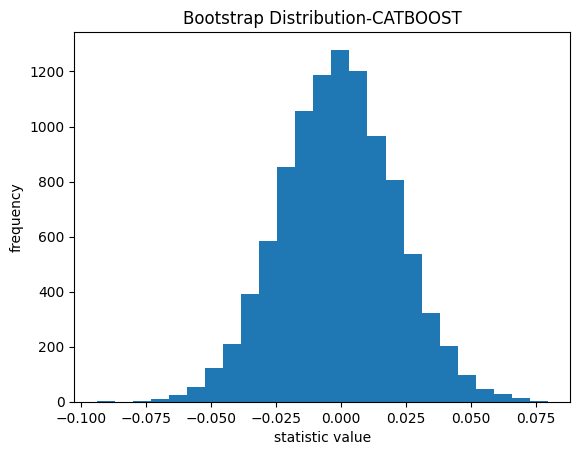

In [18]:
rng = np.random.default_rng()

data = (pred_error_cat,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-CATBOOST')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

In [19]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, X_train, y_train, X_train, y_train, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

0:	learn: 8.0398451	total: 2.8ms	remaining: 557ms
1:	learn: 7.4810575	total: 4.85ms	remaining: 481ms
2:	learn: 6.9254954	total: 6.67ms	remaining: 438ms
3:	learn: 6.5194351	total: 8.4ms	remaining: 412ms
4:	learn: 6.1265639	total: 10ms	remaining: 391ms
5:	learn: 5.7191723	total: 11.7ms	remaining: 378ms
6:	learn: 5.3358992	total: 14.2ms	remaining: 391ms
7:	learn: 5.0090204	total: 15.9ms	remaining: 381ms
8:	learn: 4.6790827	total: 17.5ms	remaining: 372ms
9:	learn: 4.3871745	total: 19.4ms	remaining: 370ms
10:	learn: 4.1789712	total: 21.1ms	remaining: 363ms
11:	learn: 3.9759422	total: 22.8ms	remaining: 356ms
12:	learn: 3.7952219	total: 24.3ms	remaining: 349ms
13:	learn: 3.6037932	total: 26ms	remaining: 346ms
14:	learn: 3.4444318	total: 27.3ms	remaining: 337ms
15:	learn: 3.3080991	total: 28.7ms	remaining: 330ms
16:	learn: 3.1501983	total: 30ms	remaining: 323ms
17:	learn: 3.0188376	total: 31.1ms	remaining: 314ms
18:	learn: 2.9154808	total: 32ms	remaining: 305ms
19:	learn: 2.8127017	total: 32.9

0:	learn: 8.7269077	total: 3.11ms	remaining: 618ms
1:	learn: 8.0715985	total: 6.32ms	remaining: 625ms
2:	learn: 7.4136693	total: 8.91ms	remaining: 585ms
3:	learn: 6.8698871	total: 11.8ms	remaining: 580ms
4:	learn: 6.3659299	total: 14.6ms	remaining: 568ms
5:	learn: 5.9132894	total: 17ms	remaining: 548ms
6:	learn: 5.5334500	total: 19.7ms	remaining: 542ms
7:	learn: 5.1632231	total: 22.3ms	remaining: 535ms
8:	learn: 4.8223827	total: 24.7ms	remaining: 525ms
9:	learn: 4.5212792	total: 28.4ms	remaining: 540ms
10:	learn: 4.2633662	total: 30.9ms	remaining: 531ms
11:	learn: 4.0249239	total: 33.5ms	remaining: 525ms
12:	learn: 3.8156443	total: 36ms	remaining: 518ms
13:	learn: 3.6267785	total: 38.4ms	remaining: 511ms
14:	learn: 3.4447991	total: 40.8ms	remaining: 504ms
15:	learn: 3.2986649	total: 44.3ms	remaining: 509ms
16:	learn: 3.1523641	total: 46.3ms	remaining: 498ms
17:	learn: 3.0300065	total: 48.4ms	remaining: 489ms
18:	learn: 2.8939255	total: 50.9ms	remaining: 484ms
19:	learn: 2.7835748	total

0:	learn: 8.5511538	total: 3.67ms	remaining: 731ms
1:	learn: 7.9426472	total: 8.02ms	remaining: 794ms
2:	learn: 7.3292209	total: 10.7ms	remaining: 700ms
3:	learn: 6.7798989	total: 13.9ms	remaining: 683ms
4:	learn: 6.3698317	total: 16.1ms	remaining: 627ms
5:	learn: 5.9875976	total: 18.6ms	remaining: 600ms
6:	learn: 5.5961642	total: 21.3ms	remaining: 587ms
7:	learn: 5.2409972	total: 24.4ms	remaining: 586ms
8:	learn: 4.8994663	total: 27ms	remaining: 574ms
9:	learn: 4.6112283	total: 29.1ms	remaining: 552ms
10:	learn: 4.3611149	total: 31.4ms	remaining: 539ms
11:	learn: 4.1276582	total: 35ms	remaining: 549ms
12:	learn: 3.9119962	total: 37.6ms	remaining: 541ms
13:	learn: 3.7127819	total: 39.9ms	remaining: 530ms
14:	learn: 3.5426194	total: 42.4ms	remaining: 523ms
15:	learn: 3.3490704	total: 44.9ms	remaining: 516ms
16:	learn: 3.2042458	total: 47.5ms	remaining: 511ms
17:	learn: 3.0943519	total: 50.5ms	remaining: 510ms
18:	learn: 2.9692983	total: 53.5ms	remaining: 510ms
19:	learn: 2.8491713	total

0:	learn: 8.1053317	total: 2.68ms	remaining: 534ms
1:	learn: 7.5897142	total: 6.03ms	remaining: 597ms
2:	learn: 7.0105836	total: 8.63ms	remaining: 567ms
3:	learn: 6.5123966	total: 11.8ms	remaining: 578ms
4:	learn: 6.0972670	total: 14.3ms	remaining: 559ms
5:	learn: 5.7218996	total: 17.1ms	remaining: 554ms
6:	learn: 5.3724437	total: 19.8ms	remaining: 545ms
7:	learn: 5.0518007	total: 22.3ms	remaining: 534ms
8:	learn: 4.7539944	total: 24.9ms	remaining: 528ms
9:	learn: 4.4920500	total: 27.7ms	remaining: 526ms
10:	learn: 4.2613434	total: 30.3ms	remaining: 521ms
11:	learn: 4.0339009	total: 33.1ms	remaining: 518ms
12:	learn: 3.8310892	total: 35.6ms	remaining: 512ms
13:	learn: 3.6485732	total: 38.6ms	remaining: 513ms
14:	learn: 3.4873793	total: 41.5ms	remaining: 512ms
15:	learn: 3.3205827	total: 44ms	remaining: 506ms
16:	learn: 3.1784642	total: 46.9ms	remaining: 505ms
17:	learn: 3.0475804	total: 49.4ms	remaining: 499ms
18:	learn: 2.9332019	total: 51.7ms	remaining: 493ms
19:	learn: 2.8332721	tot

0:	learn: 8.1329247	total: 3.02ms	remaining: 602ms
1:	learn: 7.5327306	total: 5.92ms	remaining: 586ms
2:	learn: 6.9737927	total: 8.76ms	remaining: 575ms
3:	learn: 6.5796793	total: 11.2ms	remaining: 551ms
4:	learn: 6.1805910	total: 14.2ms	remaining: 553ms
5:	learn: 5.7719687	total: 17.5ms	remaining: 566ms
6:	learn: 5.4113097	total: 20.1ms	remaining: 554ms
7:	learn: 5.0811294	total: 23.2ms	remaining: 557ms
8:	learn: 4.7982341	total: 25.6ms	remaining: 543ms
9:	learn: 4.5342698	total: 28ms	remaining: 532ms
10:	learn: 4.2797515	total: 31.8ms	remaining: 546ms
11:	learn: 4.0791363	total: 34.4ms	remaining: 538ms
12:	learn: 3.8951295	total: 37.1ms	remaining: 534ms
13:	learn: 3.7026999	total: 39.7ms	remaining: 527ms
14:	learn: 3.5545912	total: 42.2ms	remaining: 521ms
15:	learn: 3.3848647	total: 45.2ms	remaining: 520ms
16:	learn: 3.2360401	total: 48.1ms	remaining: 518ms
17:	learn: 3.0970592	total: 50.9ms	remaining: 515ms
18:	learn: 2.9736031	total: 53.5ms	remaining: 509ms
19:	learn: 2.8667940	tot

0:	learn: 9.0447305	total: 4.25ms	remaining: 845ms
1:	learn: 8.4019112	total: 7.63ms	remaining: 755ms
2:	learn: 7.6874132	total: 10.7ms	remaining: 704ms
3:	learn: 7.1641228	total: 14ms	remaining: 684ms
4:	learn: 6.6992858	total: 18.2ms	remaining: 709ms
5:	learn: 6.2125250	total: 21.2ms	remaining: 685ms
6:	learn: 5.7751694	total: 24.3ms	remaining: 669ms
7:	learn: 5.3835325	total: 27.6ms	remaining: 662ms
8:	learn: 5.0435252	total: 31.2ms	remaining: 662ms
9:	learn: 4.7137328	total: 34.3ms	remaining: 652ms
10:	learn: 4.4478185	total: 37.4ms	remaining: 642ms
11:	learn: 4.1956013	total: 39.9ms	remaining: 626ms
12:	learn: 3.9577730	total: 42.9ms	remaining: 617ms
13:	learn: 3.7670893	total: 46.3ms	remaining: 616ms
14:	learn: 3.5672855	total: 50ms	remaining: 617ms
15:	learn: 3.4010144	total: 52.7ms	remaining: 606ms
16:	learn: 3.2330134	total: 55.7ms	remaining: 600ms
17:	learn: 3.0991607	total: 58.3ms	remaining: 589ms
18:	learn: 2.9687058	total: 64.9ms	remaining: 618ms
19:	learn: 2.8340510	total

0:	learn: 8.2030371	total: 2.78ms	remaining: 553ms
1:	learn: 7.6580562	total: 7.27ms	remaining: 720ms
2:	learn: 7.0938727	total: 9.95ms	remaining: 653ms
3:	learn: 6.6710089	total: 13.7ms	remaining: 672ms
4:	learn: 6.3064723	total: 16.7ms	remaining: 651ms
5:	learn: 5.8868403	total: 19.4ms	remaining: 628ms
6:	learn: 5.5466134	total: 22ms	remaining: 605ms
7:	learn: 5.2325393	total: 24.4ms	remaining: 585ms
8:	learn: 4.9544842	total: 26.7ms	remaining: 567ms
9:	learn: 4.6769798	total: 29ms	remaining: 551ms
10:	learn: 4.4129399	total: 32.2ms	remaining: 554ms
11:	learn: 4.1977112	total: 35ms	remaining: 548ms
12:	learn: 3.9806336	total: 37.9ms	remaining: 545ms
13:	learn: 3.7598184	total: 40.7ms	remaining: 541ms
14:	learn: 3.5859960	total: 43.4ms	remaining: 536ms
15:	learn: 3.4396534	total: 46.3ms	remaining: 533ms
16:	learn: 3.2951082	total: 49.2ms	remaining: 530ms
17:	learn: 3.1715818	total: 52.9ms	remaining: 535ms
18:	learn: 3.0463767	total: 64.5ms	remaining: 615ms
19:	learn: 2.9210799	total: 

0:	learn: 8.2275722	total: 2.66ms	remaining: 529ms
1:	learn: 7.6847873	total: 5.88ms	remaining: 583ms
2:	learn: 7.1058150	total: 8.45ms	remaining: 555ms
3:	learn: 6.6325215	total: 11ms	remaining: 538ms
4:	learn: 6.2423850	total: 14.3ms	remaining: 556ms
5:	learn: 5.8285955	total: 17.4ms	remaining: 562ms
6:	learn: 5.4903632	total: 19.9ms	remaining: 548ms
7:	learn: 5.1271296	total: 22.5ms	remaining: 540ms
8:	learn: 4.8049754	total: 24.8ms	remaining: 527ms
9:	learn: 4.5030056	total: 27.4ms	remaining: 522ms
10:	learn: 4.2614248	total: 30.5ms	remaining: 524ms
11:	learn: 3.9981438	total: 33.2ms	remaining: 520ms
12:	learn: 3.7544123	total: 35.8ms	remaining: 514ms
13:	learn: 3.5913283	total: 38.2ms	remaining: 508ms
14:	learn: 3.4176986	total: 40.9ms	remaining: 505ms
15:	learn: 3.2591912	total: 45.3ms	remaining: 521ms
16:	learn: 3.1117788	total: 47.8ms	remaining: 514ms
17:	learn: 2.9746942	total: 50.4ms	remaining: 509ms
18:	learn: 2.8490935	total: 52.9ms	remaining: 504ms
19:	learn: 2.7519009	tot

0:	learn: 8.7055228	total: 2.53ms	remaining: 504ms
1:	learn: 8.1356965	total: 5.62ms	remaining: 556ms
2:	learn: 7.5079203	total: 8.48ms	remaining: 557ms
3:	learn: 6.9683297	total: 11.1ms	remaining: 544ms
4:	learn: 6.5200681	total: 14.1ms	remaining: 552ms
5:	learn: 6.1354139	total: 16.9ms	remaining: 546ms
6:	learn: 5.7754343	total: 21.8ms	remaining: 600ms
7:	learn: 5.3815573	total: 24.6ms	remaining: 589ms
8:	learn: 5.0451331	total: 27.2ms	remaining: 577ms
9:	learn: 4.7477092	total: 29.9ms	remaining: 568ms
10:	learn: 4.5269858	total: 32.7ms	remaining: 561ms
11:	learn: 4.3234753	total: 35.9ms	remaining: 563ms
12:	learn: 4.0759878	total: 38.7ms	remaining: 556ms
13:	learn: 3.9067598	total: 41.3ms	remaining: 549ms
14:	learn: 3.7230297	total: 45.4ms	remaining: 560ms
15:	learn: 3.5854755	total: 48.6ms	remaining: 559ms
16:	learn: 3.4248567	total: 51.6ms	remaining: 555ms
17:	learn: 3.2893932	total: 54.3ms	remaining: 549ms
18:	learn: 3.1664539	total: 56.5ms	remaining: 539ms
19:	learn: 3.0506207	t

0:	learn: 8.0734228	total: 3.35ms	remaining: 666ms
1:	learn: 7.5133285	total: 6.89ms	remaining: 683ms
2:	learn: 6.9133493	total: 10.2ms	remaining: 669ms
3:	learn: 6.4786815	total: 13.2ms	remaining: 647ms
4:	learn: 6.0888915	total: 17.2ms	remaining: 669ms
5:	learn: 5.6834469	total: 21.2ms	remaining: 685ms
6:	learn: 5.3195783	total: 24.5ms	remaining: 676ms
7:	learn: 4.9727894	total: 27.7ms	remaining: 665ms
8:	learn: 4.6722769	total: 31ms	remaining: 657ms
9:	learn: 4.4158234	total: 34ms	remaining: 647ms
10:	learn: 4.1612746	total: 37ms	remaining: 635ms
11:	learn: 3.9282516	total: 39.2ms	remaining: 615ms
12:	learn: 3.7010340	total: 41.4ms	remaining: 595ms
13:	learn: 3.5122733	total: 43ms	remaining: 571ms
14:	learn: 3.3601646	total: 44.5ms	remaining: 549ms
15:	learn: 3.2114320	total: 46.4ms	remaining: 534ms
16:	learn: 3.0630902	total: 47.9ms	remaining: 516ms
17:	learn: 2.9389020	total: 49ms	remaining: 496ms
18:	learn: 2.8104327	total: 50.3ms	remaining: 479ms
19:	learn: 2.7022586	total: 51.7

192:	learn: 0.2202244	total: 190ms	remaining: 6.87ms
193:	learn: 0.2186832	total: 190ms	remaining: 5.89ms
194:	learn: 0.2166933	total: 191ms	remaining: 4.9ms
195:	learn: 0.2136082	total: 192ms	remaining: 3.91ms
196:	learn: 0.2118342	total: 192ms	remaining: 2.93ms
197:	learn: 0.2091149	total: 193ms	remaining: 1.95ms
198:	learn: 0.2060898	total: 193ms	remaining: 972us
199:	learn: 0.2046779	total: 194ms	remaining: 0us
0:	learn: 8.9624556	total: 4.06ms	remaining: 808ms
1:	learn: 8.3197440	total: 7.53ms	remaining: 745ms
2:	learn: 7.6676838	total: 11.2ms	remaining: 736ms
3:	learn: 7.1061202	total: 14.9ms	remaining: 732ms
4:	learn: 6.6709144	total: 20.3ms	remaining: 792ms
5:	learn: 6.2423307	total: 23.6ms	remaining: 762ms
6:	learn: 5.8198627	total: 26.3ms	remaining: 725ms
7:	learn: 5.4155581	total: 30.4ms	remaining: 729ms
8:	learn: 5.0862522	total: 33.4ms	remaining: 708ms
9:	learn: 4.7644247	total: 37.2ms	remaining: 707ms
10:	learn: 4.5189555	total: 40.6ms	remaining: 697ms
11:	learn: 4.266094

0:	learn: 8.5374663	total: 3.04ms	remaining: 606ms
1:	learn: 7.9013159	total: 6.65ms	remaining: 659ms
2:	learn: 7.2970486	total: 9.53ms	remaining: 626ms
3:	learn: 6.7923005	total: 12.5ms	remaining: 612ms
4:	learn: 6.3277786	total: 15.1ms	remaining: 590ms
5:	learn: 5.9291460	total: 18.4ms	remaining: 596ms
6:	learn: 5.5516226	total: 21.3ms	remaining: 587ms
7:	learn: 5.1635684	total: 24.5ms	remaining: 587ms
8:	learn: 4.8453000	total: 27.5ms	remaining: 584ms
9:	learn: 4.5354047	total: 30ms	remaining: 571ms
10:	learn: 4.2871746	total: 33ms	remaining: 567ms
11:	learn: 4.0539934	total: 36.1ms	remaining: 565ms
12:	learn: 3.8312052	total: 38.7ms	remaining: 556ms
13:	learn: 3.6473281	total: 41.9ms	remaining: 557ms
14:	learn: 3.4789309	total: 45.4ms	remaining: 560ms
15:	learn: 3.3227849	total: 48.3ms	remaining: 555ms
16:	learn: 3.1909913	total: 51ms	remaining: 549ms
17:	learn: 3.0644933	total: 53.4ms	remaining: 540ms
18:	learn: 2.9229998	total: 57ms	remaining: 543ms
19:	learn: 2.8096978	total: 60

0:	learn: 8.7521763	total: 4.45ms	remaining: 886ms
1:	learn: 8.0894687	total: 7.6ms	remaining: 753ms
2:	learn: 7.4498643	total: 11.3ms	remaining: 743ms
3:	learn: 6.9956449	total: 15ms	remaining: 734ms
4:	learn: 6.5008218	total: 18.4ms	remaining: 716ms
5:	learn: 6.0591006	total: 22.4ms	remaining: 724ms
6:	learn: 5.6503901	total: 27ms	remaining: 745ms
7:	learn: 5.3007648	total: 29.9ms	remaining: 718ms
8:	learn: 4.9511014	total: 32.7ms	remaining: 693ms
9:	learn: 4.6665982	total: 36.1ms	remaining: 686ms
10:	learn: 4.4239131	total: 39.8ms	remaining: 684ms
11:	learn: 4.1962097	total: 43.1ms	remaining: 675ms
12:	learn: 3.9476987	total: 46.2ms	remaining: 664ms
13:	learn: 3.7674915	total: 49.2ms	remaining: 654ms
14:	learn: 3.5707529	total: 52.2ms	remaining: 644ms
15:	learn: 3.4216905	total: 55.7ms	remaining: 641ms
16:	learn: 3.2577894	total: 59.1ms	remaining: 636ms
17:	learn: 3.1188749	total: 61.7ms	remaining: 624ms
18:	learn: 2.9924859	total: 66.2ms	remaining: 631ms
19:	learn: 2.8849607	total:

159:	learn: 0.3609962	total: 190ms	remaining: 47.6ms
160:	learn: 0.3583060	total: 191ms	remaining: 46.3ms
161:	learn: 0.3524675	total: 192ms	remaining: 45ms
162:	learn: 0.3497912	total: 193ms	remaining: 43.8ms
163:	learn: 0.3467627	total: 194ms	remaining: 42.5ms
164:	learn: 0.3436702	total: 196ms	remaining: 41.6ms
165:	learn: 0.3404493	total: 197ms	remaining: 40.3ms
166:	learn: 0.3383580	total: 198ms	remaining: 39.1ms
167:	learn: 0.3350148	total: 198ms	remaining: 37.8ms
168:	learn: 0.3297020	total: 199ms	remaining: 36.5ms
169:	learn: 0.3241614	total: 200ms	remaining: 35.2ms
170:	learn: 0.3217185	total: 200ms	remaining: 34ms
171:	learn: 0.3179256	total: 201ms	remaining: 32.7ms
172:	learn: 0.3160192	total: 202ms	remaining: 31.5ms
173:	learn: 0.3136370	total: 202ms	remaining: 30.2ms
174:	learn: 0.3091825	total: 203ms	remaining: 29ms
175:	learn: 0.3054344	total: 203ms	remaining: 27.7ms
176:	learn: 0.3048770	total: 204ms	remaining: 26.5ms
177:	learn: 0.2999998	total: 204ms	remaining: 25.3ms

184:	learn: 0.2520206	total: 188ms	remaining: 15.2ms
185:	learn: 0.2489040	total: 189ms	remaining: 14.2ms
186:	learn: 0.2467518	total: 189ms	remaining: 13.1ms
187:	learn: 0.2442693	total: 191ms	remaining: 12.2ms
188:	learn: 0.2423338	total: 191ms	remaining: 11.1ms
189:	learn: 0.2406677	total: 192ms	remaining: 10.1ms
190:	learn: 0.2360887	total: 193ms	remaining: 9.07ms
191:	learn: 0.2330361	total: 193ms	remaining: 8.05ms
192:	learn: 0.2302378	total: 194ms	remaining: 7.02ms
193:	learn: 0.2262276	total: 194ms	remaining: 6.01ms
194:	learn: 0.2239956	total: 195ms	remaining: 5ms
195:	learn: 0.2199723	total: 195ms	remaining: 3.99ms
196:	learn: 0.2170277	total: 196ms	remaining: 2.98ms
197:	learn: 0.2147775	total: 196ms	remaining: 1.98ms
198:	learn: 0.2135103	total: 197ms	remaining: 990us
199:	learn: 0.2091190	total: 198ms	remaining: 0us
0:	learn: 8.8352666	total: 2.84ms	remaining: 565ms
1:	learn: 8.2473866	total: 6.21ms	remaining: 614ms
2:	learn: 7.5722768	total: 9.27ms	remaining: 609ms
3:	lea

156:	learn: 0.4222665	total: 188ms	remaining: 51.6ms
157:	learn: 0.4190921	total: 189ms	remaining: 50.2ms
158:	learn: 0.4158703	total: 192ms	remaining: 49.6ms
159:	learn: 0.4109529	total: 193ms	remaining: 48.2ms
160:	learn: 0.4058282	total: 194ms	remaining: 46.9ms
161:	learn: 0.4006380	total: 194ms	remaining: 45.6ms
162:	learn: 0.3958586	total: 195ms	remaining: 44.3ms
163:	learn: 0.3904991	total: 196ms	remaining: 43ms
164:	learn: 0.3863674	total: 196ms	remaining: 41.7ms
165:	learn: 0.3833360	total: 197ms	remaining: 40.4ms
166:	learn: 0.3790819	total: 198ms	remaining: 39.1ms
167:	learn: 0.3760360	total: 198ms	remaining: 37.8ms
168:	learn: 0.3741812	total: 199ms	remaining: 36.6ms
169:	learn: 0.3704545	total: 200ms	remaining: 35.4ms
170:	learn: 0.3654310	total: 201ms	remaining: 34.1ms
171:	learn: 0.3617412	total: 202ms	remaining: 32.8ms
172:	learn: 0.3568077	total: 203ms	remaining: 31.6ms
173:	learn: 0.3496675	total: 203ms	remaining: 30.4ms
174:	learn: 0.3452739	total: 204ms	remaining: 29

134:	learn: 0.5062182	total: 189ms	remaining: 91ms
135:	learn: 0.5022009	total: 190ms	remaining: 89.4ms
136:	learn: 0.4964532	total: 191ms	remaining: 87.7ms
137:	learn: 0.4887635	total: 192ms	remaining: 86.1ms
138:	learn: 0.4850818	total: 192ms	remaining: 84.4ms
139:	learn: 0.4776058	total: 193ms	remaining: 82.9ms
140:	learn: 0.4720803	total: 194ms	remaining: 81.2ms
141:	learn: 0.4638773	total: 195ms	remaining: 79.6ms
142:	learn: 0.4550815	total: 196ms	remaining: 77.9ms
143:	learn: 0.4517241	total: 196ms	remaining: 76.3ms
144:	learn: 0.4476522	total: 197ms	remaining: 74.6ms
145:	learn: 0.4430354	total: 198ms	remaining: 73.1ms
146:	learn: 0.4368354	total: 198ms	remaining: 71.5ms
147:	learn: 0.4307441	total: 199ms	remaining: 69.9ms
148:	learn: 0.4254471	total: 200ms	remaining: 68.4ms
149:	learn: 0.4205208	total: 200ms	remaining: 66.8ms
150:	learn: 0.4140988	total: 201ms	remaining: 65.4ms
151:	learn: 0.4063331	total: 202ms	remaining: 63.8ms
152:	learn: 0.4006172	total: 203ms	remaining: 62

162:	learn: 0.3453791	total: 187ms	remaining: 42.6ms
163:	learn: 0.3414452	total: 188ms	remaining: 41.3ms
164:	learn: 0.3372289	total: 189ms	remaining: 40.1ms
165:	learn: 0.3330959	total: 189ms	remaining: 38.8ms
166:	learn: 0.3287016	total: 190ms	remaining: 37.6ms
167:	learn: 0.3253484	total: 191ms	remaining: 36.3ms
168:	learn: 0.3202112	total: 191ms	remaining: 35.1ms
169:	learn: 0.3159758	total: 192ms	remaining: 33.9ms
170:	learn: 0.3116772	total: 193ms	remaining: 32.7ms
171:	learn: 0.3087411	total: 193ms	remaining: 31.5ms
172:	learn: 0.3053377	total: 194ms	remaining: 30.2ms
173:	learn: 0.3011126	total: 194ms	remaining: 29ms
174:	learn: 0.2970409	total: 195ms	remaining: 27.9ms
175:	learn: 0.2932592	total: 196ms	remaining: 26.8ms
176:	learn: 0.2875135	total: 197ms	remaining: 25.6ms
177:	learn: 0.2834616	total: 198ms	remaining: 24.4ms
178:	learn: 0.2805741	total: 198ms	remaining: 23.3ms
179:	learn: 0.2774876	total: 199ms	remaining: 22.1ms
180:	learn: 0.2733571	total: 199ms	remaining: 20

154:	learn: 0.4204004	total: 189ms	remaining: 54.7ms
155:	learn: 0.4146927	total: 189ms	remaining: 53.4ms
156:	learn: 0.4094067	total: 190ms	remaining: 52.1ms
157:	learn: 0.4044192	total: 191ms	remaining: 50.7ms
158:	learn: 0.4006817	total: 191ms	remaining: 49.4ms
159:	learn: 0.3965903	total: 192ms	remaining: 48ms
160:	learn: 0.3928268	total: 193ms	remaining: 46.7ms
161:	learn: 0.3891116	total: 193ms	remaining: 45.3ms
162:	learn: 0.3844264	total: 194ms	remaining: 44ms
163:	learn: 0.3789468	total: 194ms	remaining: 42.6ms
164:	learn: 0.3748822	total: 195ms	remaining: 41.3ms
165:	learn: 0.3711468	total: 195ms	remaining: 40ms
166:	learn: 0.3673819	total: 196ms	remaining: 38.7ms
167:	learn: 0.3620963	total: 196ms	remaining: 37.4ms
168:	learn: 0.3562859	total: 197ms	remaining: 36.1ms
169:	learn: 0.3538468	total: 197ms	remaining: 34.8ms
170:	learn: 0.3489051	total: 198ms	remaining: 33.6ms
171:	learn: 0.3436386	total: 199ms	remaining: 32.3ms
172:	learn: 0.3410032	total: 199ms	remaining: 31.1ms

147:	learn: 0.3650028	total: 189ms	remaining: 66.4ms
148:	learn: 0.3633085	total: 190ms	remaining: 65ms
149:	learn: 0.3604075	total: 190ms	remaining: 63.5ms
150:	learn: 0.3576067	total: 191ms	remaining: 62ms
151:	learn: 0.3545099	total: 192ms	remaining: 60.6ms
152:	learn: 0.3522428	total: 192ms	remaining: 59.1ms
153:	learn: 0.3463492	total: 193ms	remaining: 57.6ms
154:	learn: 0.3428096	total: 194ms	remaining: 56.2ms
155:	learn: 0.3360569	total: 194ms	remaining: 54.8ms
156:	learn: 0.3337277	total: 195ms	remaining: 53.4ms
157:	learn: 0.3287849	total: 195ms	remaining: 51.9ms
158:	learn: 0.3247154	total: 196ms	remaining: 50.5ms
159:	learn: 0.3215691	total: 197ms	remaining: 49.1ms
160:	learn: 0.3183709	total: 197ms	remaining: 47.8ms
161:	learn: 0.3141580	total: 198ms	remaining: 46.4ms
162:	learn: 0.3107009	total: 198ms	remaining: 45ms
163:	learn: 0.3084339	total: 199ms	remaining: 43.7ms
164:	learn: 0.3048790	total: 199ms	remaining: 42.3ms
165:	learn: 0.3030244	total: 200ms	remaining: 41ms
1

143:	learn: 0.4331567	total: 188ms	remaining: 73ms
144:	learn: 0.4306539	total: 189ms	remaining: 71.5ms
145:	learn: 0.4252777	total: 189ms	remaining: 70ms
146:	learn: 0.4202634	total: 190ms	remaining: 68.4ms
147:	learn: 0.4121075	total: 190ms	remaining: 66.9ms
148:	learn: 0.4095650	total: 191ms	remaining: 65.4ms
149:	learn: 0.4086474	total: 191ms	remaining: 63.8ms
150:	learn: 0.4023153	total: 192ms	remaining: 62.3ms
151:	learn: 0.3989394	total: 192ms	remaining: 60.8ms
152:	learn: 0.3930114	total: 193ms	remaining: 59.3ms
153:	learn: 0.3857291	total: 194ms	remaining: 57.9ms
154:	learn: 0.3803974	total: 194ms	remaining: 56.4ms
155:	learn: 0.3756912	total: 195ms	remaining: 55ms
156:	learn: 0.3717155	total: 196ms	remaining: 53.6ms
157:	learn: 0.3663838	total: 196ms	remaining: 52.2ms
158:	learn: 0.3585497	total: 197ms	remaining: 50.8ms
159:	learn: 0.3558170	total: 197ms	remaining: 49.4ms
160:	learn: 0.3496284	total: 198ms	remaining: 48ms
161:	learn: 0.3455048	total: 199ms	remaining: 46.6ms
1

196:	learn: 0.1875258	total: 188ms	remaining: 2.86ms
197:	learn: 0.1836426	total: 189ms	remaining: 1.91ms
198:	learn: 0.1816234	total: 189ms	remaining: 952us
199:	learn: 0.1786840	total: 190ms	remaining: 0us
0:	learn: 8.3547345	total: 3.25ms	remaining: 647ms
1:	learn: 7.7854833	total: 6.67ms	remaining: 661ms
2:	learn: 7.2066810	total: 9.3ms	remaining: 611ms
3:	learn: 6.7303708	total: 11.8ms	remaining: 579ms
4:	learn: 6.3507430	total: 14.9ms	remaining: 581ms
5:	learn: 5.9268192	total: 18.2ms	remaining: 589ms
6:	learn: 5.6204165	total: 21ms	remaining: 578ms
7:	learn: 5.2943966	total: 23.9ms	remaining: 574ms
8:	learn: 4.9649051	total: 26.3ms	remaining: 557ms
9:	learn: 4.6583925	total: 29.4ms	remaining: 559ms
10:	learn: 4.4122899	total: 32.8ms	remaining: 564ms
11:	learn: 4.1759858	total: 36.1ms	remaining: 565ms
12:	learn: 3.9586830	total: 38.6ms	remaining: 555ms
13:	learn: 3.7820570	total: 41.1ms	remaining: 546ms
14:	learn: 3.6243355	total: 44ms	remaining: 542ms
15:	learn: 3.4648844	total:

0:	learn: 8.8726897	total: 2.7ms	remaining: 538ms
1:	learn: 8.2235661	total: 5.7ms	remaining: 564ms
2:	learn: 7.5599994	total: 9.81ms	remaining: 644ms
3:	learn: 7.0606202	total: 12.5ms	remaining: 614ms
4:	learn: 6.5600029	total: 15ms	remaining: 587ms
5:	learn: 6.1242816	total: 17.6ms	remaining: 569ms
6:	learn: 5.7348299	total: 20.3ms	remaining: 559ms
7:	learn: 5.3647703	total: 22.9ms	remaining: 550ms
8:	learn: 5.0192088	total: 25.6ms	remaining: 544ms
9:	learn: 4.6819795	total: 28.1ms	remaining: 534ms
10:	learn: 4.4042862	total: 31.3ms	remaining: 537ms
11:	learn: 4.1483680	total: 33.7ms	remaining: 528ms
12:	learn: 3.8891356	total: 36.3ms	remaining: 523ms
13:	learn: 3.6946277	total: 40ms	remaining: 532ms
14:	learn: 3.5009401	total: 42.7ms	remaining: 526ms
15:	learn: 3.3473020	total: 45.2ms	remaining: 520ms
16:	learn: 3.1898222	total: 47.5ms	remaining: 511ms
17:	learn: 3.0584643	total: 50ms	remaining: 506ms
18:	learn: 2.9179923	total: 52.5ms	remaining: 500ms
19:	learn: 2.7998149	total: 57

0:	learn: 8.9276944	total: 2.67ms	remaining: 532ms
1:	learn: 8.2915533	total: 5.67ms	remaining: 562ms
2:	learn: 7.6916759	total: 8.76ms	remaining: 575ms
3:	learn: 7.1604575	total: 11.5ms	remaining: 566ms
4:	learn: 6.6793486	total: 14.1ms	remaining: 549ms
5:	learn: 6.2501947	total: 16.9ms	remaining: 546ms
6:	learn: 5.8472108	total: 19.3ms	remaining: 533ms
7:	learn: 5.4580760	total: 22.9ms	remaining: 550ms
8:	learn: 5.1055587	total: 25.8ms	remaining: 547ms
9:	learn: 4.8223759	total: 28.2ms	remaining: 536ms
10:	learn: 4.5665297	total: 31ms	remaining: 532ms
11:	learn: 4.3308193	total: 33.6ms	remaining: 526ms
12:	learn: 4.1175012	total: 35.9ms	remaining: 516ms
13:	learn: 3.9576845	total: 40.9ms	remaining: 544ms
14:	learn: 3.7868497	total: 43.6ms	remaining: 537ms
15:	learn: 3.5831850	total: 46.2ms	remaining: 531ms
16:	learn: 3.4153410	total: 48.7ms	remaining: 524ms
17:	learn: 3.3158998	total: 51.2ms	remaining: 518ms
18:	learn: 3.1839835	total: 54ms	remaining: 515ms
19:	learn: 3.0702357	total

0:	learn: 8.5079491	total: 3.24ms	remaining: 645ms
1:	learn: 7.8717083	total: 8.25ms	remaining: 817ms
2:	learn: 7.2699100	total: 11ms	remaining: 725ms
3:	learn: 6.7456866	total: 14.1ms	remaining: 693ms
4:	learn: 6.3367233	total: 16.9ms	remaining: 658ms
5:	learn: 5.9500958	total: 19.7ms	remaining: 638ms
6:	learn: 5.6072782	total: 22.8ms	remaining: 628ms
7:	learn: 5.2669377	total: 25.8ms	remaining: 619ms
8:	learn: 4.9713896	total: 28.1ms	remaining: 595ms
9:	learn: 4.6702866	total: 30.8ms	remaining: 584ms
10:	learn: 4.4152995	total: 33.5ms	remaining: 575ms
11:	learn: 4.1923135	total: 37.8ms	remaining: 592ms
12:	learn: 3.9720416	total: 40.1ms	remaining: 577ms
13:	learn: 3.7578879	total: 42.5ms	remaining: 564ms
14:	learn: 3.5775039	total: 44.9ms	remaining: 554ms
15:	learn: 3.4018040	total: 47.1ms	remaining: 541ms
16:	learn: 3.2760506	total: 49.8ms	remaining: 536ms
17:	learn: 3.1402133	total: 54.7ms	remaining: 553ms
18:	learn: 3.0371932	total: 57.2ms	remaining: 545ms
19:	learn: 2.9330668	tot

0:	learn: 8.1840055	total: 2.88ms	remaining: 573ms
1:	learn: 7.6041664	total: 6.14ms	remaining: 608ms
2:	learn: 7.0556780	total: 9ms	remaining: 591ms
3:	learn: 6.5759900	total: 12.7ms	remaining: 624ms
4:	learn: 6.1489771	total: 15.5ms	remaining: 605ms
5:	learn: 5.7841861	total: 17.9ms	remaining: 578ms
6:	learn: 5.3670641	total: 20.1ms	remaining: 555ms
7:	learn: 5.0296622	total: 22.3ms	remaining: 536ms
8:	learn: 4.7260859	total: 24.9ms	remaining: 528ms
9:	learn: 4.4469837	total: 27.7ms	remaining: 527ms
10:	learn: 4.1777636	total: 30.9ms	remaining: 531ms
11:	learn: 3.9825484	total: 33.3ms	remaining: 522ms
12:	learn: 3.7642955	total: 35.8ms	remaining: 514ms
13:	learn: 3.5762561	total: 38.2ms	remaining: 507ms
14:	learn: 3.4134365	total: 40.7ms	remaining: 502ms
15:	learn: 3.2685976	total: 44.2ms	remaining: 509ms
16:	learn: 3.1306545	total: 46.9ms	remaining: 505ms
17:	learn: 2.9932759	total: 49.6ms	remaining: 501ms
18:	learn: 2.8778843	total: 52ms	remaining: 495ms
19:	learn: 2.7762498	total:

162:	learn: 0.3000633	total: 188ms	remaining: 42.8ms
163:	learn: 0.2979007	total: 189ms	remaining: 41.5ms
164:	learn: 0.2940592	total: 190ms	remaining: 40.2ms
165:	learn: 0.2897685	total: 190ms	remaining: 39ms
166:	learn: 0.2863982	total: 191ms	remaining: 37.8ms
167:	learn: 0.2846783	total: 192ms	remaining: 36.6ms
168:	learn: 0.2795636	total: 193ms	remaining: 35.3ms
169:	learn: 0.2760485	total: 193ms	remaining: 34.1ms
170:	learn: 0.2735801	total: 194ms	remaining: 32.9ms
171:	learn: 0.2681443	total: 194ms	remaining: 31.7ms
172:	learn: 0.2637068	total: 195ms	remaining: 30.5ms
173:	learn: 0.2622044	total: 196ms	remaining: 29.3ms
174:	learn: 0.2595970	total: 197ms	remaining: 28.1ms
175:	learn: 0.2568078	total: 197ms	remaining: 26.9ms
176:	learn: 0.2544309	total: 198ms	remaining: 25.7ms
177:	learn: 0.2510139	total: 198ms	remaining: 24.5ms
178:	learn: 0.2480757	total: 199ms	remaining: 23.3ms
179:	learn: 0.2458035	total: 199ms	remaining: 22.2ms
180:	learn: 0.2416786	total: 200ms	remaining: 21

0:	learn: 8.2415050	total: 2.75ms	remaining: 547ms
1:	learn: 7.6393469	total: 6.66ms	remaining: 659ms
2:	learn: 7.0342584	total: 9.24ms	remaining: 607ms
3:	learn: 6.5269587	total: 12.1ms	remaining: 593ms
4:	learn: 6.0356535	total: 15.1ms	remaining: 590ms
5:	learn: 5.6364993	total: 18.1ms	remaining: 586ms
6:	learn: 5.2823818	total: 21ms	remaining: 579ms
7:	learn: 4.9401526	total: 23.6ms	remaining: 566ms
8:	learn: 4.6598467	total: 26.1ms	remaining: 554ms
9:	learn: 4.3618491	total: 28.7ms	remaining: 545ms
10:	learn: 4.0842182	total: 31.3ms	remaining: 538ms
11:	learn: 3.8541893	total: 34.1ms	remaining: 534ms
12:	learn: 3.6567216	total: 37ms	remaining: 533ms
13:	learn: 3.4741622	total: 39.5ms	remaining: 524ms
14:	learn: 3.3425804	total: 41.9ms	remaining: 517ms
15:	learn: 3.1995601	total: 44.7ms	remaining: 514ms
16:	learn: 3.0522418	total: 47.1ms	remaining: 507ms
17:	learn: 2.9440546	total: 51.3ms	remaining: 518ms
18:	learn: 2.8205545	total: 53.5ms	remaining: 509ms
19:	learn: 2.7169010	total

0:	learn: 7.7726884	total: 3.39ms	remaining: 675ms
1:	learn: 7.2295817	total: 6.93ms	remaining: 686ms
2:	learn: 6.6745358	total: 9.57ms	remaining: 629ms
3:	learn: 6.2432261	total: 12.1ms	remaining: 594ms
4:	learn: 5.8263346	total: 14.6ms	remaining: 571ms
5:	learn: 5.4222539	total: 17.2ms	remaining: 556ms
6:	learn: 5.0492821	total: 19.7ms	remaining: 543ms
7:	learn: 4.7420492	total: 22.3ms	remaining: 534ms
8:	learn: 4.4740268	total: 24.3ms	remaining: 516ms
9:	learn: 4.2069184	total: 26.6ms	remaining: 505ms
10:	learn: 4.0070334	total: 28.6ms	remaining: 492ms
11:	learn: 3.7780396	total: 30.7ms	remaining: 481ms
12:	learn: 3.5773016	total: 33.9ms	remaining: 487ms
13:	learn: 3.3961550	total: 36.4ms	remaining: 484ms
14:	learn: 3.2374491	total: 38.8ms	remaining: 479ms
15:	learn: 3.1097140	total: 41.5ms	remaining: 478ms
16:	learn: 2.9743610	total: 44ms	remaining: 474ms
17:	learn: 2.8571200	total: 46.5ms	remaining: 470ms
18:	learn: 2.7334656	total: 49.6ms	remaining: 473ms
19:	learn: 2.6195868	tot

0:	learn: 8.0098447	total: 3.04ms	remaining: 605ms
1:	learn: 7.4709971	total: 7.09ms	remaining: 702ms
2:	learn: 6.8909168	total: 10.2ms	remaining: 667ms
3:	learn: 6.4493638	total: 12.7ms	remaining: 620ms
4:	learn: 6.0342278	total: 15.2ms	remaining: 592ms
5:	learn: 5.7101812	total: 18.2ms	remaining: 588ms
6:	learn: 5.3734232	total: 20.7ms	remaining: 571ms
7:	learn: 5.0240336	total: 23.2ms	remaining: 556ms
8:	learn: 4.7094164	total: 25.5ms	remaining: 541ms
9:	learn: 4.4485748	total: 28.1ms	remaining: 535ms
10:	learn: 4.2150346	total: 30.7ms	remaining: 528ms
11:	learn: 3.9997162	total: 33.4ms	remaining: 523ms
12:	learn: 3.7957304	total: 36.3ms	remaining: 522ms
13:	learn: 3.6094418	total: 39.2ms	remaining: 521ms
14:	learn: 3.4559358	total: 41.7ms	remaining: 514ms
15:	learn: 3.3128083	total: 44.3ms	remaining: 510ms
16:	learn: 3.1707846	total: 46.9ms	remaining: 505ms
17:	learn: 3.0484830	total: 49.7ms	remaining: 502ms
18:	learn: 2.9302141	total: 53ms	remaining: 505ms
19:	learn: 2.8240041	tot

0:	learn: 9.1959959	total: 2.84ms	remaining: 566ms
1:	learn: 8.5577761	total: 5.85ms	remaining: 579ms
2:	learn: 7.8536070	total: 8.59ms	remaining: 564ms
3:	learn: 7.2915357	total: 11.1ms	remaining: 544ms
4:	learn: 6.8236327	total: 13.4ms	remaining: 524ms
5:	learn: 6.4376808	total: 16.5ms	remaining: 535ms
6:	learn: 6.0574132	total: 19.5ms	remaining: 539ms
7:	learn: 5.6438713	total: 22.1ms	remaining: 529ms
8:	learn: 5.2431002	total: 24.5ms	remaining: 521ms
9:	learn: 4.9271879	total: 26.9ms	remaining: 512ms
10:	learn: 4.6566646	total: 29.4ms	remaining: 505ms
11:	learn: 4.3736621	total: 32.3ms	remaining: 505ms
12:	learn: 4.1499498	total: 35.2ms	remaining: 506ms
13:	learn: 3.9413174	total: 37.6ms	remaining: 500ms
14:	learn: 3.7434484	total: 40.1ms	remaining: 495ms
15:	learn: 3.5759942	total: 42.8ms	remaining: 492ms
16:	learn: 3.3806988	total: 45.4ms	remaining: 489ms
17:	learn: 3.2422407	total: 48.3ms	remaining: 489ms
18:	learn: 3.0619417	total: 50.9ms	remaining: 485ms
19:	learn: 2.9349378	t

0:	learn: 8.9836702	total: 3.33ms	remaining: 662ms
1:	learn: 8.4230908	total: 6.21ms	remaining: 615ms
2:	learn: 7.8001662	total: 9.66ms	remaining: 634ms
3:	learn: 7.2147671	total: 12.5ms	remaining: 611ms
4:	learn: 6.7163363	total: 15.5ms	remaining: 604ms
5:	learn: 6.2392978	total: 17.9ms	remaining: 578ms
6:	learn: 5.8579667	total: 20.4ms	remaining: 562ms
7:	learn: 5.4707327	total: 24.5ms	remaining: 588ms
8:	learn: 5.1799212	total: 27.4ms	remaining: 581ms
9:	learn: 4.8537331	total: 29.9ms	remaining: 569ms
10:	learn: 4.5956406	total: 32.6ms	remaining: 559ms
11:	learn: 4.3728832	total: 35.5ms	remaining: 556ms
12:	learn: 4.1570098	total: 37.8ms	remaining: 544ms
13:	learn: 3.9410218	total: 40.9ms	remaining: 543ms
14:	learn: 3.7345369	total: 43.4ms	remaining: 536ms
15:	learn: 3.5536863	total: 46.2ms	remaining: 531ms
16:	learn: 3.3705747	total: 48.9ms	remaining: 526ms
17:	learn: 3.2305788	total: 51.3ms	remaining: 519ms
18:	learn: 3.0792546	total: 54.5ms	remaining: 520ms
19:	learn: 2.9612158	t

0:	learn: 7.9444989	total: 2.98ms	remaining: 593ms
1:	learn: 7.4191440	total: 6.75ms	remaining: 668ms
2:	learn: 6.8537047	total: 10.4ms	remaining: 683ms
3:	learn: 6.4107957	total: 12.9ms	remaining: 634ms
4:	learn: 6.0095092	total: 16ms	remaining: 624ms
5:	learn: 5.6365056	total: 18.8ms	remaining: 609ms
6:	learn: 5.3103271	total: 21.7ms	remaining: 600ms
7:	learn: 4.9836044	total: 25.1ms	remaining: 602ms
8:	learn: 4.6709405	total: 28.3ms	remaining: 600ms
9:	learn: 4.4090137	total: 31.3ms	remaining: 595ms
10:	learn: 4.1605132	total: 35.7ms	remaining: 613ms
11:	learn: 3.9418827	total: 39.5ms	remaining: 618ms
12:	learn: 3.7399165	total: 42.6ms	remaining: 612ms
13:	learn: 3.5301569	total: 45.3ms	remaining: 602ms
14:	learn: 3.3954943	total: 48ms	remaining: 592ms
15:	learn: 3.2419237	total: 50.8ms	remaining: 584ms
16:	learn: 3.1079407	total: 53.6ms	remaining: 577ms
17:	learn: 2.9791994	total: 56.5ms	remaining: 571ms
18:	learn: 2.8725577	total: 59.1ms	remaining: 563ms
19:	learn: 2.7752919	total

182:	learn: 0.2653241	total: 189ms	remaining: 17.5ms
183:	learn: 0.2631914	total: 190ms	remaining: 16.5ms
184:	learn: 0.2604719	total: 191ms	remaining: 15.4ms
185:	learn: 0.2571115	total: 192ms	remaining: 14.5ms
186:	learn: 0.2550301	total: 193ms	remaining: 13.4ms
187:	learn: 0.2528152	total: 194ms	remaining: 12.4ms
188:	learn: 0.2499538	total: 195ms	remaining: 11.3ms
189:	learn: 0.2482997	total: 196ms	remaining: 10.3ms
190:	learn: 0.2465828	total: 198ms	remaining: 9.31ms
191:	learn: 0.2442742	total: 199ms	remaining: 8.28ms
192:	learn: 0.2431104	total: 200ms	remaining: 7.25ms
193:	learn: 0.2391828	total: 201ms	remaining: 6.22ms
194:	learn: 0.2375739	total: 202ms	remaining: 5.19ms
195:	learn: 0.2354519	total: 204ms	remaining: 4.16ms
196:	learn: 0.2324362	total: 205ms	remaining: 3.12ms
197:	learn: 0.2304433	total: 206ms	remaining: 2.08ms
198:	learn: 0.2286911	total: 208ms	remaining: 1.04ms
199:	learn: 0.2273577	total: 208ms	remaining: 0us
0:	learn: 8.4604588	total: 2.85ms	remaining: 567m

0:	learn: 8.3847211	total: 3.2ms	remaining: 637ms
1:	learn: 7.7554603	total: 6.7ms	remaining: 663ms
2:	learn: 7.1552074	total: 10.1ms	remaining: 666ms
3:	learn: 6.6617738	total: 14.8ms	remaining: 725ms
4:	learn: 6.2434432	total: 18.4ms	remaining: 716ms
5:	learn: 5.8624506	total: 22.1ms	remaining: 715ms
6:	learn: 5.4768961	total: 25.2ms	remaining: 696ms
7:	learn: 5.1262142	total: 29.4ms	remaining: 705ms
8:	learn: 4.8139764	total: 32.7ms	remaining: 694ms
9:	learn: 4.5319056	total: 35.7ms	remaining: 679ms
10:	learn: 4.2983583	total: 39.1ms	remaining: 672ms
11:	learn: 4.1056742	total: 43.3ms	remaining: 678ms
12:	learn: 3.8968668	total: 46.6ms	remaining: 670ms
13:	learn: 3.7029597	total: 50.1ms	remaining: 666ms
14:	learn: 3.5313151	total: 54.6ms	remaining: 674ms
15:	learn: 3.3674706	total: 57.8ms	remaining: 665ms
16:	learn: 3.2293037	total: 70.3ms	remaining: 757ms
17:	learn: 3.1169019	total: 73.9ms	remaining: 748ms
18:	learn: 3.0130946	total: 77.4ms	remaining: 738ms
19:	learn: 2.8856002	tot

0:	learn: 8.5765821	total: 1.22ms	remaining: 242ms
1:	learn: 7.9135351	total: 2.38ms	remaining: 235ms
2:	learn: 7.2954594	total: 3.23ms	remaining: 212ms
3:	learn: 6.7712406	total: 4.04ms	remaining: 198ms
4:	learn: 6.3365476	total: 4.7ms	remaining: 183ms
5:	learn: 5.9534026	total: 5.34ms	remaining: 173ms
6:	learn: 5.5722923	total: 6.05ms	remaining: 167ms
7:	learn: 5.2312680	total: 7.36ms	remaining: 177ms
8:	learn: 4.9014699	total: 8.41ms	remaining: 178ms
9:	learn: 4.5925571	total: 9.26ms	remaining: 176ms
10:	learn: 4.3510702	total: 10.1ms	remaining: 173ms
11:	learn: 4.1108809	total: 10.8ms	remaining: 170ms
12:	learn: 3.8658514	total: 11.4ms	remaining: 164ms
13:	learn: 3.6642085	total: 12ms	remaining: 160ms
14:	learn: 3.5020261	total: 12.8ms	remaining: 158ms
15:	learn: 3.3267601	total: 13.4ms	remaining: 154ms
16:	learn: 3.1886611	total: 14.1ms	remaining: 152ms
17:	learn: 3.0740830	total: 14.7ms	remaining: 149ms
18:	learn: 2.9629317	total: 15.3ms	remaining: 146ms
19:	learn: 2.8591817	tota

0:	learn: 8.8068435	total: 2.84ms	remaining: 566ms
1:	learn: 8.1749243	total: 6.49ms	remaining: 642ms
2:	learn: 7.5495514	total: 9.05ms	remaining: 594ms
3:	learn: 7.1014410	total: 12ms	remaining: 588ms
4:	learn: 6.6793468	total: 15ms	remaining: 585ms
5:	learn: 6.2120320	total: 18.6ms	remaining: 600ms
6:	learn: 5.8109780	total: 21.4ms	remaining: 590ms
7:	learn: 5.4720067	total: 23.9ms	remaining: 573ms
8:	learn: 5.0958829	total: 26.6ms	remaining: 565ms
9:	learn: 4.7886171	total: 29ms	remaining: 551ms
10:	learn: 4.5532748	total: 31.6ms	remaining: 542ms
11:	learn: 4.2996001	total: 35.5ms	remaining: 555ms
12:	learn: 4.0760711	total: 38ms	remaining: 546ms
13:	learn: 3.8753707	total: 40.7ms	remaining: 540ms
14:	learn: 3.6793703	total: 43.1ms	remaining: 531ms
15:	learn: 3.5051980	total: 45.7ms	remaining: 525ms
16:	learn: 3.3158086	total: 48.7ms	remaining: 525ms
17:	learn: 3.1753692	total: 51.6ms	remaining: 522ms
18:	learn: 3.0565842	total: 54.1ms	remaining: 515ms
19:	learn: 2.9434039	total: 57

0:	learn: 9.0571597	total: 3.23ms	remaining: 643ms
1:	learn: 8.4060194	total: 6.53ms	remaining: 646ms
2:	learn: 7.7278967	total: 9.27ms	remaining: 609ms
3:	learn: 7.2185485	total: 11.7ms	remaining: 572ms
4:	learn: 6.7218406	total: 14.2ms	remaining: 553ms
5:	learn: 6.2494252	total: 17.1ms	remaining: 552ms
6:	learn: 5.8671857	total: 20.3ms	remaining: 559ms
7:	learn: 5.4671364	total: 22.8ms	remaining: 547ms
8:	learn: 5.1196708	total: 25.7ms	remaining: 545ms
9:	learn: 4.7902561	total: 28.2ms	remaining: 536ms
10:	learn: 4.5028158	total: 30.8ms	remaining: 529ms
11:	learn: 4.2115242	total: 34.1ms	remaining: 534ms
12:	learn: 3.9630707	total: 37.7ms	remaining: 542ms
13:	learn: 3.7694414	total: 40.1ms	remaining: 532ms
14:	learn: 3.5839996	total: 42.5ms	remaining: 524ms
15:	learn: 3.4329854	total: 45.1ms	remaining: 519ms
16:	learn: 3.2541987	total: 47.8ms	remaining: 514ms
17:	learn: 3.1145369	total: 50.7ms	remaining: 513ms
18:	learn: 2.9981579	total: 53.3ms	remaining: 508ms
19:	learn: 2.8740199	t

0:	learn: 9.4003635	total: 2.54ms	remaining: 505ms
1:	learn: 8.6673289	total: 6.5ms	remaining: 643ms
2:	learn: 7.9376383	total: 9.59ms	remaining: 629ms
3:	learn: 7.3751277	total: 13.9ms	remaining: 683ms
4:	learn: 6.8698900	total: 17.8ms	remaining: 695ms
5:	learn: 6.3711030	total: 20.7ms	remaining: 669ms
6:	learn: 5.9343943	total: 22.9ms	remaining: 632ms
7:	learn: 5.5372629	total: 25.4ms	remaining: 610ms
8:	learn: 5.1656745	total: 28.9ms	remaining: 613ms
9:	learn: 4.8299561	total: 31.8ms	remaining: 605ms
10:	learn: 4.5445498	total: 34.8ms	remaining: 597ms
11:	learn: 4.2788152	total: 37.6ms	remaining: 590ms
12:	learn: 4.0426785	total: 41.6ms	remaining: 599ms
13:	learn: 3.8189058	total: 44.8ms	remaining: 595ms
14:	learn: 3.6332834	total: 49.9ms	remaining: 616ms
15:	learn: 3.4584101	total: 52.7ms	remaining: 606ms
16:	learn: 3.2844824	total: 56.3ms	remaining: 606ms
17:	learn: 3.1433835	total: 59.6ms	remaining: 602ms
18:	learn: 3.0146381	total: 63.6ms	remaining: 606ms
19:	learn: 2.8835660	to

0:	learn: 9.0298257	total: 2.64ms	remaining: 525ms
1:	learn: 8.3992476	total: 5.84ms	remaining: 578ms
2:	learn: 7.7583172	total: 9.29ms	remaining: 610ms
3:	learn: 7.2068236	total: 12.6ms	remaining: 617ms
4:	learn: 6.7477830	total: 15.2ms	remaining: 591ms
5:	learn: 6.3256612	total: 18.1ms	remaining: 586ms
6:	learn: 5.8711655	total: 20.9ms	remaining: 575ms
7:	learn: 5.4514587	total: 25.1ms	remaining: 603ms
8:	learn: 5.0946847	total: 28.8ms	remaining: 612ms
9:	learn: 4.7584206	total: 32.5ms	remaining: 617ms
10:	learn: 4.5221708	total: 35.4ms	remaining: 608ms
11:	learn: 4.2639649	total: 38.6ms	remaining: 604ms
12:	learn: 4.0026305	total: 41.7ms	remaining: 600ms
13:	learn: 3.8031385	total: 44.4ms	remaining: 590ms
14:	learn: 3.6311091	total: 48.7ms	remaining: 601ms
15:	learn: 3.4633957	total: 51.8ms	remaining: 596ms
16:	learn: 3.2885221	total: 56.8ms	remaining: 611ms
17:	learn: 3.1796018	total: 59.3ms	remaining: 599ms
18:	learn: 3.0644051	total: 63.7ms	remaining: 607ms
19:	learn: 2.9605943	t

159:	learn: 0.3059297	total: 192ms	remaining: 48ms
160:	learn: 0.3018395	total: 193ms	remaining: 46.7ms
161:	learn: 0.2993670	total: 194ms	remaining: 45.5ms
162:	learn: 0.2969693	total: 195ms	remaining: 44.2ms
163:	learn: 0.2937747	total: 195ms	remaining: 42.9ms
164:	learn: 0.2906385	total: 196ms	remaining: 41.6ms
165:	learn: 0.2870518	total: 196ms	remaining: 40.2ms
166:	learn: 0.2821756	total: 197ms	remaining: 38.9ms
167:	learn: 0.2788548	total: 198ms	remaining: 37.6ms
168:	learn: 0.2747825	total: 198ms	remaining: 36.3ms
169:	learn: 0.2719055	total: 199ms	remaining: 35.1ms
170:	learn: 0.2660435	total: 199ms	remaining: 33.8ms
171:	learn: 0.2644365	total: 200ms	remaining: 32.6ms
172:	learn: 0.2616231	total: 201ms	remaining: 31.3ms
173:	learn: 0.2586664	total: 201ms	remaining: 30.1ms
174:	learn: 0.2548233	total: 202ms	remaining: 28.9ms
175:	learn: 0.2485035	total: 204ms	remaining: 27.8ms
176:	learn: 0.2461324	total: 204ms	remaining: 26.5ms
177:	learn: 0.2425660	total: 205ms	remaining: 25

153:	learn: 0.2821281	total: 191ms	remaining: 56.9ms
154:	learn: 0.2783906	total: 191ms	remaining: 55.5ms
155:	learn: 0.2755923	total: 193ms	remaining: 54.4ms
156:	learn: 0.2737221	total: 194ms	remaining: 53ms
157:	learn: 0.2677807	total: 194ms	remaining: 51.6ms
158:	learn: 0.2622419	total: 195ms	remaining: 50.2ms
159:	learn: 0.2579817	total: 195ms	remaining: 48.8ms
160:	learn: 0.2557480	total: 196ms	remaining: 47.5ms
161:	learn: 0.2529891	total: 197ms	remaining: 46.2ms
162:	learn: 0.2501326	total: 198ms	remaining: 44.9ms
163:	learn: 0.2466649	total: 198ms	remaining: 43.5ms
164:	learn: 0.2442188	total: 200ms	remaining: 42.4ms
165:	learn: 0.2413492	total: 200ms	remaining: 41.1ms
166:	learn: 0.2398255	total: 201ms	remaining: 39.8ms
167:	learn: 0.2367066	total: 202ms	remaining: 38.5ms
168:	learn: 0.2333685	total: 203ms	remaining: 37.2ms
169:	learn: 0.2308176	total: 204ms	remaining: 35.9ms
170:	learn: 0.2283510	total: 204ms	remaining: 34.6ms
171:	learn: 0.2264389	total: 205ms	remaining: 33

137:	learn: 0.4308573	total: 188ms	remaining: 84.5ms
138:	learn: 0.4226156	total: 189ms	remaining: 83ms
139:	learn: 0.4180646	total: 190ms	remaining: 81.4ms
140:	learn: 0.4115654	total: 192ms	remaining: 80.5ms
141:	learn: 0.4104559	total: 193ms	remaining: 78.7ms
142:	learn: 0.4072912	total: 193ms	remaining: 77.1ms
143:	learn: 0.4014299	total: 194ms	remaining: 75.4ms
144:	learn: 0.3958363	total: 195ms	remaining: 73.8ms
145:	learn: 0.3899069	total: 195ms	remaining: 72.2ms
146:	learn: 0.3843459	total: 196ms	remaining: 70.6ms
147:	learn: 0.3830606	total: 196ms	remaining: 68.9ms
148:	learn: 0.3792173	total: 199ms	remaining: 68.2ms
149:	learn: 0.3747268	total: 200ms	remaining: 66.7ms
150:	learn: 0.3697905	total: 201ms	remaining: 65.2ms
151:	learn: 0.3630871	total: 201ms	remaining: 63.6ms
152:	learn: 0.3589523	total: 202ms	remaining: 62.1ms
153:	learn: 0.3523392	total: 203ms	remaining: 60.6ms
154:	learn: 0.3473431	total: 204ms	remaining: 59.1ms
155:	learn: 0.3424581	total: 204ms	remaining: 57

149:	learn: 0.3781826	total: 191ms	remaining: 63.6ms
150:	learn: 0.3738732	total: 193ms	remaining: 62.6ms
151:	learn: 0.3719406	total: 194ms	remaining: 61.2ms
152:	learn: 0.3659732	total: 195ms	remaining: 59.8ms
153:	learn: 0.3617222	total: 195ms	remaining: 58.3ms
154:	learn: 0.3567687	total: 196ms	remaining: 56.9ms
155:	learn: 0.3545106	total: 196ms	remaining: 55.4ms
156:	learn: 0.3496177	total: 197ms	remaining: 54ms
157:	learn: 0.3437799	total: 198ms	remaining: 52.6ms
158:	learn: 0.3409521	total: 198ms	remaining: 51.2ms
159:	learn: 0.3359890	total: 199ms	remaining: 49.8ms
160:	learn: 0.3322706	total: 200ms	remaining: 48.5ms
161:	learn: 0.3281246	total: 201ms	remaining: 47.1ms
162:	learn: 0.3228667	total: 202ms	remaining: 45.7ms
163:	learn: 0.3192211	total: 202ms	remaining: 44.4ms
164:	learn: 0.3125515	total: 203ms	remaining: 43ms
165:	learn: 0.3082382	total: 203ms	remaining: 41.6ms
166:	learn: 0.3073057	total: 204ms	remaining: 40.3ms
167:	learn: 0.3042362	total: 204ms	remaining: 38.9

131:	learn: 0.4513593	total: 193ms	remaining: 99.5ms
132:	learn: 0.4471365	total: 194ms	remaining: 97.8ms
133:	learn: 0.4370603	total: 195ms	remaining: 95.9ms
134:	learn: 0.4268801	total: 195ms	remaining: 94ms
135:	learn: 0.4217210	total: 196ms	remaining: 92.1ms
136:	learn: 0.4186394	total: 196ms	remaining: 90.3ms
137:	learn: 0.4099599	total: 197ms	remaining: 88.5ms
138:	learn: 0.4033342	total: 198ms	remaining: 86.7ms
139:	learn: 0.3991236	total: 198ms	remaining: 84.9ms
140:	learn: 0.3919186	total: 199ms	remaining: 83.2ms
141:	learn: 0.3874196	total: 199ms	remaining: 81.5ms
142:	learn: 0.3843067	total: 200ms	remaining: 79.8ms
143:	learn: 0.3804893	total: 201ms	remaining: 78.1ms
144:	learn: 0.3761127	total: 201ms	remaining: 76.3ms
145:	learn: 0.3704942	total: 202ms	remaining: 74.6ms
146:	learn: 0.3669161	total: 202ms	remaining: 73ms
147:	learn: 0.3641513	total: 203ms	remaining: 71.3ms
148:	learn: 0.3601262	total: 203ms	remaining: 69.6ms
149:	learn: 0.3571603	total: 204ms	remaining: 68ms

150:	learn: 0.3803510	total: 189ms	remaining: 61.2ms
151:	learn: 0.3768177	total: 190ms	remaining: 59.9ms
152:	learn: 0.3728281	total: 192ms	remaining: 58.9ms
153:	learn: 0.3687095	total: 193ms	remaining: 57.6ms
154:	learn: 0.3651431	total: 193ms	remaining: 56.2ms
155:	learn: 0.3618430	total: 194ms	remaining: 54.7ms
156:	learn: 0.3607902	total: 195ms	remaining: 53.3ms
157:	learn: 0.3573607	total: 195ms	remaining: 51.9ms
158:	learn: 0.3558012	total: 196ms	remaining: 50.5ms
159:	learn: 0.3547480	total: 197ms	remaining: 49.1ms
160:	learn: 0.3511102	total: 197ms	remaining: 47.8ms
161:	learn: 0.3475674	total: 198ms	remaining: 46.5ms
162:	learn: 0.3424960	total: 199ms	remaining: 45.1ms
163:	learn: 0.3377326	total: 199ms	remaining: 43.8ms
164:	learn: 0.3340168	total: 200ms	remaining: 42.4ms
165:	learn: 0.3285099	total: 200ms	remaining: 41.1ms
166:	learn: 0.3260472	total: 201ms	remaining: 39.7ms
167:	learn: 0.3237076	total: 202ms	remaining: 38.4ms
168:	learn: 0.3208288	total: 202ms	remaining: 

150:	learn: 0.4363903	total: 190ms	remaining: 61.6ms
151:	learn: 0.4268699	total: 191ms	remaining: 60.3ms
152:	learn: 0.4236117	total: 192ms	remaining: 58.9ms
153:	learn: 0.4211333	total: 192ms	remaining: 57.5ms
154:	learn: 0.4154517	total: 193ms	remaining: 56.1ms
155:	learn: 0.4122131	total: 194ms	remaining: 54.7ms
156:	learn: 0.4084010	total: 195ms	remaining: 53.3ms
157:	learn: 0.4035775	total: 195ms	remaining: 51.9ms
158:	learn: 0.4010503	total: 196ms	remaining: 50.5ms
159:	learn: 0.3941228	total: 196ms	remaining: 49.1ms
160:	learn: 0.3879560	total: 198ms	remaining: 47.9ms
161:	learn: 0.3835094	total: 198ms	remaining: 46.5ms
162:	learn: 0.3814180	total: 199ms	remaining: 45.2ms
163:	learn: 0.3758354	total: 200ms	remaining: 43.8ms
164:	learn: 0.3698690	total: 200ms	remaining: 42.5ms
165:	learn: 0.3641172	total: 201ms	remaining: 41.2ms
166:	learn: 0.3568996	total: 202ms	remaining: 39.8ms
167:	learn: 0.3538371	total: 202ms	remaining: 38.5ms
168:	learn: 0.3522750	total: 203ms	remaining: 

129:	learn: 0.5108186	total: 190ms	remaining: 102ms
130:	learn: 0.5048278	total: 191ms	remaining: 101ms
131:	learn: 0.5009156	total: 192ms	remaining: 98.9ms
132:	learn: 0.4905106	total: 193ms	remaining: 97.1ms
133:	learn: 0.4859733	total: 193ms	remaining: 95.3ms
134:	learn: 0.4800603	total: 194ms	remaining: 93.5ms
135:	learn: 0.4732310	total: 195ms	remaining: 91.8ms
136:	learn: 0.4691263	total: 196ms	remaining: 90ms
137:	learn: 0.4628115	total: 196ms	remaining: 88.2ms
138:	learn: 0.4553424	total: 197ms	remaining: 86.4ms
139:	learn: 0.4494001	total: 198ms	remaining: 84.7ms
140:	learn: 0.4420202	total: 198ms	remaining: 82.9ms
141:	learn: 0.4352478	total: 199ms	remaining: 81.2ms
142:	learn: 0.4323095	total: 199ms	remaining: 79.4ms
143:	learn: 0.4298813	total: 200ms	remaining: 77.8ms
144:	learn: 0.4264027	total: 201ms	remaining: 76.1ms
145:	learn: 0.4172088	total: 201ms	remaining: 74.4ms
146:	learn: 0.4151828	total: 202ms	remaining: 72.8ms
147:	learn: 0.4123828	total: 203ms	remaining: 71.2

150:	learn: 0.3488716	total: 189ms	remaining: 61.4ms
151:	learn: 0.3414988	total: 190ms	remaining: 60ms
152:	learn: 0.3371576	total: 192ms	remaining: 58.8ms
153:	learn: 0.3322731	total: 192ms	remaining: 57.4ms
154:	learn: 0.3269810	total: 193ms	remaining: 56ms
155:	learn: 0.3220873	total: 194ms	remaining: 54.6ms
156:	learn: 0.3192088	total: 194ms	remaining: 53.2ms
157:	learn: 0.3136635	total: 195ms	remaining: 51.8ms
158:	learn: 0.3092347	total: 196ms	remaining: 50.4ms
159:	learn: 0.3065585	total: 196ms	remaining: 49ms
160:	learn: 0.3038355	total: 197ms	remaining: 47.8ms
161:	learn: 0.3006213	total: 198ms	remaining: 46.4ms
162:	learn: 0.2965305	total: 198ms	remaining: 45ms
163:	learn: 0.2914797	total: 199ms	remaining: 43.7ms
164:	learn: 0.2890262	total: 200ms	remaining: 42.3ms
165:	learn: 0.2860096	total: 200ms	remaining: 41ms
166:	learn: 0.2825075	total: 202ms	remaining: 40ms
167:	learn: 0.2808219	total: 203ms	remaining: 38.7ms
168:	learn: 0.2786234	total: 204ms	remaining: 37.3ms
169:	

156:	learn: 0.3134151	total: 190ms	remaining: 52.1ms
157:	learn: 0.3106361	total: 191ms	remaining: 50.7ms
158:	learn: 0.3060515	total: 191ms	remaining: 49.4ms
159:	learn: 0.3019061	total: 193ms	remaining: 48.2ms
160:	learn: 0.2989725	total: 194ms	remaining: 46.9ms
161:	learn: 0.2970227	total: 194ms	remaining: 45.6ms
162:	learn: 0.2936360	total: 196ms	remaining: 44.5ms
163:	learn: 0.2888123	total: 197ms	remaining: 43.2ms
164:	learn: 0.2838921	total: 197ms	remaining: 41.9ms
165:	learn: 0.2831116	total: 198ms	remaining: 40.5ms
166:	learn: 0.2810364	total: 198ms	remaining: 39.2ms
167:	learn: 0.2796503	total: 199ms	remaining: 37.9ms
168:	learn: 0.2780539	total: 200ms	remaining: 36.6ms
169:	learn: 0.2733946	total: 200ms	remaining: 35.3ms
170:	learn: 0.2727480	total: 201ms	remaining: 34ms
171:	learn: 0.2671084	total: 201ms	remaining: 32.8ms
172:	learn: 0.2628872	total: 202ms	remaining: 31.6ms
173:	learn: 0.2621223	total: 203ms	remaining: 30.3ms
174:	learn: 0.2597307	total: 203ms	remaining: 29

141:	learn: 0.3885262	total: 188ms	remaining: 76.7ms
142:	learn: 0.3842357	total: 189ms	remaining: 75.2ms
143:	learn: 0.3813092	total: 189ms	remaining: 73.6ms
144:	learn: 0.3771083	total: 191ms	remaining: 72.4ms
145:	learn: 0.3723523	total: 192ms	remaining: 70.9ms
146:	learn: 0.3679084	total: 192ms	remaining: 69.4ms
147:	learn: 0.3621991	total: 193ms	remaining: 67.8ms
148:	learn: 0.3583476	total: 194ms	remaining: 66.3ms
149:	learn: 0.3542020	total: 194ms	remaining: 64.7ms
150:	learn: 0.3509192	total: 195ms	remaining: 63.2ms
151:	learn: 0.3452250	total: 195ms	remaining: 61.7ms
152:	learn: 0.3389199	total: 196ms	remaining: 60.2ms
153:	learn: 0.3349547	total: 197ms	remaining: 58.7ms
154:	learn: 0.3276534	total: 197ms	remaining: 57.2ms
155:	learn: 0.3208475	total: 198ms	remaining: 55.8ms
156:	learn: 0.3166043	total: 198ms	remaining: 54.3ms
157:	learn: 0.3108248	total: 199ms	remaining: 53ms
158:	learn: 0.3074874	total: 200ms	remaining: 51.5ms
159:	learn: 0.3054003	total: 200ms	remaining: 50

0:	learn: 8.3906432	total: 3.04ms	remaining: 606ms
1:	learn: 7.8189681	total: 7.64ms	remaining: 756ms
2:	learn: 7.2201053	total: 10.5ms	remaining: 687ms
3:	learn: 6.7225467	total: 13.4ms	remaining: 655ms
4:	learn: 6.2537233	total: 17.2ms	remaining: 672ms
5:	learn: 5.8652860	total: 19.3ms	remaining: 624ms
6:	learn: 5.5246685	total: 22.9ms	remaining: 630ms
7:	learn: 5.1803834	total: 26ms	remaining: 625ms
8:	learn: 4.8788247	total: 31.6ms	remaining: 671ms
9:	learn: 4.5878209	total: 34.5ms	remaining: 655ms
10:	learn: 4.3514611	total: 37.4ms	remaining: 642ms
11:	learn: 4.1488565	total: 41ms	remaining: 643ms
12:	learn: 3.9246475	total: 43.8ms	remaining: 630ms
13:	learn: 3.7510145	total: 47.4ms	remaining: 629ms
14:	learn: 3.5819923	total: 50.2ms	remaining: 619ms
15:	learn: 3.4326597	total: 53.3ms	remaining: 613ms
16:	learn: 3.2905667	total: 57.7ms	remaining: 621ms
17:	learn: 3.1641841	total: 60.7ms	remaining: 614ms
18:	learn: 3.0218134	total: 63.7ms	remaining: 607ms
19:	learn: 2.9181103	total

0:	learn: 8.1446356	total: 2.95ms	remaining: 588ms
1:	learn: 7.6185067	total: 6.34ms	remaining: 628ms
2:	learn: 7.0312687	total: 9.2ms	remaining: 604ms
3:	learn: 6.5457963	total: 12.3ms	remaining: 604ms
4:	learn: 6.1739521	total: 16ms	remaining: 624ms
5:	learn: 5.8581787	total: 19.7ms	remaining: 638ms
6:	learn: 5.4593689	total: 22.5ms	remaining: 621ms
7:	learn: 5.1236704	total: 25.3ms	remaining: 608ms
8:	learn: 4.7978878	total: 28.1ms	remaining: 597ms
9:	learn: 4.5152894	total: 35.6ms	remaining: 676ms
10:	learn: 4.2863888	total: 38.3ms	remaining: 659ms
11:	learn: 4.0469209	total: 42.4ms	remaining: 664ms
12:	learn: 3.8203593	total: 47.6ms	remaining: 685ms
13:	learn: 3.6264280	total: 50.6ms	remaining: 672ms
14:	learn: 3.4686389	total: 54.1ms	remaining: 667ms
15:	learn: 3.3372509	total: 57.1ms	remaining: 657ms
16:	learn: 3.1760966	total: 65.4ms	remaining: 704ms
17:	learn: 3.0369309	total: 68.2ms	remaining: 690ms
18:	learn: 2.9054817	total: 71.3ms	remaining: 680ms
19:	learn: 2.7925726	tota

0:	learn: 8.1968843	total: 2.64ms	remaining: 526ms
1:	learn: 7.6218836	total: 5.84ms	remaining: 578ms
2:	learn: 7.0314878	total: 8.65ms	remaining: 568ms
3:	learn: 6.5644017	total: 11.3ms	remaining: 552ms
4:	learn: 6.1360436	total: 14.6ms	remaining: 570ms
5:	learn: 5.7606222	total: 17.3ms	remaining: 558ms
6:	learn: 5.3751268	total: 19.9ms	remaining: 550ms
7:	learn: 5.0066257	total: 23ms	remaining: 553ms
8:	learn: 4.6880843	total: 25.7ms	remaining: 546ms
9:	learn: 4.3841896	total: 28.3ms	remaining: 537ms
10:	learn: 4.1189493	total: 30.8ms	remaining: 530ms
11:	learn: 3.8675448	total: 33.6ms	remaining: 526ms
12:	learn: 3.6624704	total: 36.6ms	remaining: 527ms
13:	learn: 3.4772519	total: 39.2ms	remaining: 521ms
14:	learn: 3.3377726	total: 41.9ms	remaining: 517ms
15:	learn: 3.1618055	total: 44.6ms	remaining: 513ms
16:	learn: 2.9793450	total: 47.1ms	remaining: 508ms
17:	learn: 2.8700781	total: 49.3ms	remaining: 499ms
18:	learn: 2.7564975	total: 52ms	remaining: 495ms
19:	learn: 2.6463341	total

0:	learn: 8.8405443	total: 2.78ms	remaining: 553ms
1:	learn: 8.2485526	total: 6.25ms	remaining: 619ms
2:	learn: 7.6004180	total: 9.18ms	remaining: 603ms
3:	learn: 7.1275927	total: 12.7ms	remaining: 620ms
4:	learn: 6.6896971	total: 16.3ms	remaining: 636ms
5:	learn: 6.2814683	total: 20.4ms	remaining: 659ms
6:	learn: 5.8307652	total: 23.5ms	remaining: 648ms
7:	learn: 5.4072667	total: 26.2ms	remaining: 629ms
8:	learn: 5.0552429	total: 29.2ms	remaining: 621ms
9:	learn: 4.7061384	total: 32.4ms	remaining: 616ms
10:	learn: 4.4131428	total: 35.5ms	remaining: 611ms
11:	learn: 4.1592735	total: 38.2ms	remaining: 598ms
12:	learn: 3.9406751	total: 40.7ms	remaining: 585ms
13:	learn: 3.7664866	total: 44.9ms	remaining: 596ms
14:	learn: 3.5816684	total: 48.7ms	remaining: 601ms
15:	learn: 3.4327548	total: 51.5ms	remaining: 592ms
16:	learn: 3.2729197	total: 54.3ms	remaining: 585ms
17:	learn: 3.1400786	total: 59.7ms	remaining: 604ms
18:	learn: 3.0001936	total: 62.9ms	remaining: 599ms
19:	learn: 2.8582449	t

0:	learn: 8.7564118	total: 3.21ms	remaining: 640ms
1:	learn: 8.0780075	total: 6.35ms	remaining: 629ms
2:	learn: 7.4067435	total: 10.4ms	remaining: 681ms
3:	learn: 6.9040832	total: 14.6ms	remaining: 715ms
4:	learn: 6.4544443	total: 17.6ms	remaining: 688ms
5:	learn: 5.9858622	total: 20.6ms	remaining: 667ms
6:	learn: 5.6077880	total: 23.4ms	remaining: 645ms
7:	learn: 5.2274832	total: 26ms	remaining: 623ms
8:	learn: 4.9018288	total: 29ms	remaining: 616ms
9:	learn: 4.5786038	total: 32ms	remaining: 608ms
10:	learn: 4.2933337	total: 34.7ms	remaining: 596ms
11:	learn: 4.0587297	total: 37.1ms	remaining: 582ms
12:	learn: 3.8219345	total: 40.5ms	remaining: 583ms
13:	learn: 3.6364022	total: 43.4ms	remaining: 576ms
14:	learn: 3.4669095	total: 46.7ms	remaining: 576ms
15:	learn: 3.3016816	total: 49.7ms	remaining: 571ms
16:	learn: 3.1343926	total: 52.8ms	remaining: 568ms
17:	learn: 2.9905557	total: 55.8ms	remaining: 564ms
18:	learn: 2.8660048	total: 59.1ms	remaining: 563ms
19:	learn: 2.7439596	total: 

161:	learn: 0.3359034	total: 189ms	remaining: 44.3ms
162:	learn: 0.3335025	total: 190ms	remaining: 43ms
163:	learn: 0.3270159	total: 190ms	remaining: 41.8ms
164:	learn: 0.3213781	total: 191ms	remaining: 40.5ms
165:	learn: 0.3169776	total: 192ms	remaining: 39.2ms
166:	learn: 0.3154356	total: 192ms	remaining: 38ms
167:	learn: 0.3140900	total: 193ms	remaining: 36.7ms
168:	learn: 0.3115132	total: 198ms	remaining: 36.2ms
169:	learn: 0.3062501	total: 198ms	remaining: 35ms
170:	learn: 0.3030412	total: 199ms	remaining: 33.7ms
171:	learn: 0.2996189	total: 200ms	remaining: 32.5ms
172:	learn: 0.2973845	total: 200ms	remaining: 31.2ms
173:	learn: 0.2956712	total: 201ms	remaining: 30ms
174:	learn: 0.2934921	total: 201ms	remaining: 28.8ms
175:	learn: 0.2921553	total: 202ms	remaining: 27.6ms
176:	learn: 0.2881574	total: 203ms	remaining: 26.4ms
177:	learn: 0.2860342	total: 203ms	remaining: 25.1ms
178:	learn: 0.2812501	total: 204ms	remaining: 24ms
179:	learn: 0.2781157	total: 205ms	remaining: 22.8ms
180

0:	learn: 9.2580842	total: 3.84ms	remaining: 763ms
1:	learn: 8.5863267	total: 7.39ms	remaining: 732ms
2:	learn: 7.9243937	total: 10.2ms	remaining: 669ms
3:	learn: 7.3963973	total: 12.8ms	remaining: 626ms
4:	learn: 6.9092998	total: 15.6ms	remaining: 609ms
5:	learn: 6.4543601	total: 18.6ms	remaining: 601ms
6:	learn: 5.9757655	total: 21.2ms	remaining: 584ms
7:	learn: 5.5787472	total: 23.9ms	remaining: 575ms
8:	learn: 5.2304753	total: 26.4ms	remaining: 561ms
9:	learn: 4.8824558	total: 29ms	remaining: 551ms
10:	learn: 4.5825974	total: 33.3ms	remaining: 573ms
11:	learn: 4.3156103	total: 36ms	remaining: 564ms
12:	learn: 4.0628144	total: 38.6ms	remaining: 555ms
13:	learn: 3.8415798	total: 41ms	remaining: 545ms
14:	learn: 3.6455588	total: 43.4ms	remaining: 535ms
15:	learn: 3.4933179	total: 46.8ms	remaining: 539ms
16:	learn: 3.3381470	total: 49.5ms	remaining: 533ms
17:	learn: 3.2156096	total: 51.7ms	remaining: 523ms
18:	learn: 3.0838201	total: 53.9ms	remaining: 513ms
19:	learn: 2.9568171	total: 

0:	learn: 8.0928931	total: 3.31ms	remaining: 658ms
1:	learn: 7.5159330	total: 6.61ms	remaining: 654ms
2:	learn: 6.9380678	total: 9.47ms	remaining: 622ms
3:	learn: 6.4753723	total: 12.1ms	remaining: 594ms
4:	learn: 6.0720015	total: 15.2ms	remaining: 592ms
5:	learn: 5.7366909	total: 18.2ms	remaining: 587ms
6:	learn: 5.4261171	total: 20.8ms	remaining: 573ms
7:	learn: 5.0743461	total: 23.4ms	remaining: 562ms
8:	learn: 4.7635112	total: 26ms	remaining: 552ms
9:	learn: 4.4629439	total: 28.9ms	remaining: 549ms
10:	learn: 4.2596604	total: 32.6ms	remaining: 561ms
11:	learn: 4.0217820	total: 35.6ms	remaining: 558ms
12:	learn: 3.8180379	total: 38.2ms	remaining: 549ms
13:	learn: 3.6524492	total: 41ms	remaining: 545ms
14:	learn: 3.4569761	total: 43.7ms	remaining: 539ms
15:	learn: 3.2932792	total: 46.5ms	remaining: 535ms
16:	learn: 3.1283310	total: 49.4ms	remaining: 532ms
17:	learn: 3.0205725	total: 52.3ms	remaining: 528ms
18:	learn: 2.8880655	total: 54.8ms	remaining: 522ms
19:	learn: 2.7925406	total

169:	learn: 0.2966423	total: 189ms	remaining: 33.3ms
170:	learn: 0.2930779	total: 189ms	remaining: 32.1ms
171:	learn: 0.2917434	total: 190ms	remaining: 30.9ms
172:	learn: 0.2881428	total: 190ms	remaining: 29.7ms
173:	learn: 0.2856034	total: 191ms	remaining: 28.6ms
174:	learn: 0.2803732	total: 192ms	remaining: 27.4ms
175:	learn: 0.2767884	total: 193ms	remaining: 26.3ms
176:	learn: 0.2754593	total: 193ms	remaining: 25.1ms
177:	learn: 0.2718657	total: 194ms	remaining: 23.9ms
178:	learn: 0.2699566	total: 194ms	remaining: 22.8ms
179:	learn: 0.2666533	total: 195ms	remaining: 21.7ms
180:	learn: 0.2622713	total: 196ms	remaining: 20.5ms
181:	learn: 0.2578565	total: 196ms	remaining: 19.4ms
182:	learn: 0.2525008	total: 197ms	remaining: 18.3ms
183:	learn: 0.2499115	total: 197ms	remaining: 17.2ms
184:	learn: 0.2486440	total: 198ms	remaining: 16ms
185:	learn: 0.2460123	total: 199ms	remaining: 15ms
186:	learn: 0.2421580	total: 200ms	remaining: 13.9ms
187:	learn: 0.2410038	total: 200ms	remaining: 12.8

0:	learn: 8.5854100	total: 2.47ms	remaining: 492ms
1:	learn: 7.9487568	total: 5.53ms	remaining: 548ms
2:	learn: 7.3203396	total: 10.2ms	remaining: 667ms
3:	learn: 6.8085965	total: 12.8ms	remaining: 625ms
4:	learn: 6.3730893	total: 15.5ms	remaining: 604ms
5:	learn: 5.9463388	total: 18.6ms	remaining: 601ms
6:	learn: 5.6008872	total: 21.6ms	remaining: 597ms
7:	learn: 5.2211038	total: 24.7ms	remaining: 593ms
8:	learn: 4.8937837	total: 27.3ms	remaining: 580ms
9:	learn: 4.5663112	total: 30.7ms	remaining: 584ms
10:	learn: 4.2800237	total: 33.9ms	remaining: 583ms
11:	learn: 4.0706548	total: 36.5ms	remaining: 572ms
12:	learn: 3.8603217	total: 39.7ms	remaining: 572ms
13:	learn: 3.6736422	total: 42.5ms	remaining: 565ms
14:	learn: 3.5048236	total: 45.9ms	remaining: 566ms
15:	learn: 3.3487169	total: 48.9ms	remaining: 562ms
16:	learn: 3.1907212	total: 54.7ms	remaining: 589ms
17:	learn: 3.0702761	total: 57.5ms	remaining: 581ms
18:	learn: 2.9320728	total: 60.5ms	remaining: 577ms
19:	learn: 2.8242066	t

0:	learn: 8.1262971	total: 3.16ms	remaining: 630ms
1:	learn: 7.5908292	total: 6.82ms	remaining: 675ms
2:	learn: 7.0352715	total: 10.8ms	remaining: 712ms
3:	learn: 6.6107308	total: 15.3ms	remaining: 749ms
4:	learn: 6.2270770	total: 20.4ms	remaining: 795ms
5:	learn: 5.8059316	total: 23.3ms	remaining: 754ms
6:	learn: 5.4702309	total: 26.1ms	remaining: 721ms
7:	learn: 5.1303363	total: 30.6ms	remaining: 734ms
8:	learn: 4.8310440	total: 34.2ms	remaining: 726ms
9:	learn: 4.5487885	total: 37.5ms	remaining: 712ms
10:	learn: 4.3391583	total: 40.8ms	remaining: 700ms
11:	learn: 4.1428180	total: 43.6ms	remaining: 683ms
12:	learn: 3.9785056	total: 46.9ms	remaining: 675ms
13:	learn: 3.8180531	total: 49.9ms	remaining: 662ms
14:	learn: 3.6526247	total: 55.6ms	remaining: 686ms
15:	learn: 3.4910333	total: 58.7ms	remaining: 675ms
16:	learn: 3.3426605	total: 62.3ms	remaining: 670ms
17:	learn: 3.2043753	total: 65ms	remaining: 657ms
18:	learn: 3.0685823	total: 69.7ms	remaining: 664ms
19:	learn: 2.9490960	tot

159:	learn: 0.3879901	total: 190ms	remaining: 47.5ms
160:	learn: 0.3839211	total: 191ms	remaining: 46.3ms
161:	learn: 0.3805227	total: 192ms	remaining: 45ms
162:	learn: 0.3781905	total: 192ms	remaining: 43.7ms
163:	learn: 0.3741902	total: 193ms	remaining: 42.4ms
164:	learn: 0.3693828	total: 194ms	remaining: 41.1ms
165:	learn: 0.3609914	total: 194ms	remaining: 39.8ms
166:	learn: 0.3603224	total: 195ms	remaining: 38.5ms
167:	learn: 0.3554306	total: 195ms	remaining: 37.2ms
168:	learn: 0.3484184	total: 196ms	remaining: 36ms
169:	learn: 0.3460320	total: 197ms	remaining: 34.8ms
170:	learn: 0.3425272	total: 199ms	remaining: 33.7ms
171:	learn: 0.3401357	total: 200ms	remaining: 32.5ms
172:	learn: 0.3360857	total: 200ms	remaining: 31.3ms
173:	learn: 0.3343287	total: 201ms	remaining: 30ms
174:	learn: 0.3292156	total: 202ms	remaining: 28.8ms
175:	learn: 0.3259995	total: 202ms	remaining: 27.6ms
176:	learn: 0.3219476	total: 203ms	remaining: 26.4ms
177:	learn: 0.3173717	total: 204ms	remaining: 25.2ms

126:	learn: 0.5050647	total: 188ms	remaining: 108ms
127:	learn: 0.5003571	total: 189ms	remaining: 106ms
128:	learn: 0.4934288	total: 190ms	remaining: 105ms
129:	learn: 0.4882433	total: 191ms	remaining: 103ms
130:	learn: 0.4818643	total: 191ms	remaining: 101ms
131:	learn: 0.4725094	total: 192ms	remaining: 98.9ms
132:	learn: 0.4684544	total: 193ms	remaining: 97.1ms
133:	learn: 0.4620845	total: 193ms	remaining: 95.2ms
134:	learn: 0.4582655	total: 194ms	remaining: 93.3ms
135:	learn: 0.4528803	total: 195ms	remaining: 91.6ms
136:	learn: 0.4497877	total: 195ms	remaining: 89.9ms
137:	learn: 0.4467657	total: 196ms	remaining: 88.1ms
138:	learn: 0.4443944	total: 197ms	remaining: 86.3ms
139:	learn: 0.4418772	total: 197ms	remaining: 84.6ms
140:	learn: 0.4365394	total: 198ms	remaining: 82.9ms
141:	learn: 0.4289343	total: 199ms	remaining: 81.1ms
142:	learn: 0.4214846	total: 199ms	remaining: 79.5ms
143:	learn: 0.4156295	total: 200ms	remaining: 77.8ms
144:	learn: 0.4114844	total: 201ms	remaining: 76.1m

126:	learn: 0.5121032	total: 187ms	remaining: 108ms
127:	learn: 0.5061544	total: 188ms	remaining: 106ms
128:	learn: 0.4980955	total: 189ms	remaining: 104ms
129:	learn: 0.4883019	total: 190ms	remaining: 102ms
130:	learn: 0.4831384	total: 190ms	remaining: 100ms
131:	learn: 0.4772627	total: 191ms	remaining: 98.3ms
132:	learn: 0.4705240	total: 192ms	remaining: 96.5ms
133:	learn: 0.4666462	total: 192ms	remaining: 94.6ms
134:	learn: 0.4594424	total: 193ms	remaining: 92.8ms
135:	learn: 0.4519706	total: 193ms	remaining: 91ms
136:	learn: 0.4470860	total: 194ms	remaining: 89.4ms
137:	learn: 0.4397146	total: 195ms	remaining: 87.6ms
138:	learn: 0.4365397	total: 196ms	remaining: 85.9ms
139:	learn: 0.4334383	total: 196ms	remaining: 84.2ms
140:	learn: 0.4284865	total: 197ms	remaining: 82.4ms
141:	learn: 0.4244542	total: 198ms	remaining: 80.7ms
142:	learn: 0.4190415	total: 198ms	remaining: 79ms
143:	learn: 0.4109627	total: 199ms	remaining: 77.3ms
144:	learn: 0.4074652	total: 199ms	remaining: 75.6ms
14

144:	learn: 0.4375762	total: 188ms	remaining: 71.4ms
145:	learn: 0.4314173	total: 189ms	remaining: 69.9ms
146:	learn: 0.4260023	total: 191ms	remaining: 68.8ms
147:	learn: 0.4203957	total: 191ms	remaining: 67.2ms
148:	learn: 0.4155238	total: 192ms	remaining: 65.7ms
149:	learn: 0.4123827	total: 193ms	remaining: 64.2ms
150:	learn: 0.4054999	total: 193ms	remaining: 62.7ms
151:	learn: 0.4022930	total: 194ms	remaining: 61.3ms
152:	learn: 0.3995133	total: 195ms	remaining: 59.8ms
153:	learn: 0.3958011	total: 195ms	remaining: 58.4ms
154:	learn: 0.3892730	total: 196ms	remaining: 56.9ms
155:	learn: 0.3865482	total: 197ms	remaining: 55.5ms
156:	learn: 0.3810672	total: 197ms	remaining: 54ms
157:	learn: 0.3774566	total: 198ms	remaining: 52.6ms
158:	learn: 0.3757550	total: 198ms	remaining: 51.2ms
159:	learn: 0.3697510	total: 199ms	remaining: 49.8ms
160:	learn: 0.3643796	total: 200ms	remaining: 48.4ms
161:	learn: 0.3618933	total: 200ms	remaining: 47ms
162:	learn: 0.3575040	total: 201ms	remaining: 45.6

144:	learn: 0.3874648	total: 188ms	remaining: 71.4ms
145:	learn: 0.3831645	total: 189ms	remaining: 69.9ms
146:	learn: 0.3797440	total: 190ms	remaining: 68.4ms
147:	learn: 0.3759774	total: 190ms	remaining: 66.9ms
148:	learn: 0.3703173	total: 191ms	remaining: 65.4ms
149:	learn: 0.3663467	total: 192ms	remaining: 63.9ms
150:	learn: 0.3626204	total: 192ms	remaining: 62.4ms
151:	learn: 0.3591418	total: 193ms	remaining: 60.9ms
152:	learn: 0.3547996	total: 193ms	remaining: 59.4ms
153:	learn: 0.3507379	total: 194ms	remaining: 57.9ms
154:	learn: 0.3477768	total: 195ms	remaining: 56.5ms
155:	learn: 0.3411100	total: 195ms	remaining: 55ms
156:	learn: 0.3379308	total: 196ms	remaining: 53.6ms
157:	learn: 0.3353548	total: 196ms	remaining: 52.2ms
158:	learn: 0.3309263	total: 197ms	remaining: 50.8ms
159:	learn: 0.3283085	total: 197ms	remaining: 49.4ms
160:	learn: 0.3260026	total: 198ms	remaining: 48ms
161:	learn: 0.3187316	total: 199ms	remaining: 46.6ms
162:	learn: 0.3144451	total: 199ms	remaining: 45.2

160:	learn: 0.3303438	total: 188ms	remaining: 45.5ms
161:	learn: 0.3254290	total: 189ms	remaining: 44.3ms
162:	learn: 0.3223995	total: 189ms	remaining: 43ms
163:	learn: 0.3215269	total: 190ms	remaining: 41.7ms
164:	learn: 0.3194050	total: 191ms	remaining: 40.5ms
165:	learn: 0.3144025	total: 191ms	remaining: 39.2ms
166:	learn: 0.3112167	total: 192ms	remaining: 37.9ms
167:	learn: 0.3091191	total: 193ms	remaining: 36.7ms
168:	learn: 0.3054772	total: 193ms	remaining: 35.5ms
169:	learn: 0.3017380	total: 194ms	remaining: 34.2ms
170:	learn: 0.2960170	total: 195ms	remaining: 33ms
171:	learn: 0.2939074	total: 195ms	remaining: 31.8ms
172:	learn: 0.2909754	total: 196ms	remaining: 30.6ms
173:	learn: 0.2872926	total: 196ms	remaining: 29.3ms
174:	learn: 0.2842025	total: 197ms	remaining: 28.1ms
175:	learn: 0.2798264	total: 198ms	remaining: 26.9ms
176:	learn: 0.2744344	total: 198ms	remaining: 25.7ms
177:	learn: 0.2721082	total: 199ms	remaining: 24.6ms
178:	learn: 0.2696846	total: 199ms	remaining: 23.4

152:	learn: 0.3207291	total: 185ms	remaining: 56.9ms
153:	learn: 0.3185419	total: 186ms	remaining: 55.5ms
154:	learn: 0.3132808	total: 186ms	remaining: 54.1ms
155:	learn: 0.3093651	total: 187ms	remaining: 52.7ms
156:	learn: 0.3047458	total: 187ms	remaining: 51.3ms
157:	learn: 0.3022701	total: 188ms	remaining: 50ms
158:	learn: 0.2985362	total: 189ms	remaining: 48.6ms
159:	learn: 0.2963832	total: 189ms	remaining: 47.3ms
160:	learn: 0.2920855	total: 190ms	remaining: 46ms
161:	learn: 0.2861987	total: 190ms	remaining: 44.7ms
162:	learn: 0.2836429	total: 191ms	remaining: 43.3ms
163:	learn: 0.2814299	total: 192ms	remaining: 42ms
164:	learn: 0.2770397	total: 192ms	remaining: 40.7ms
165:	learn: 0.2739027	total: 193ms	remaining: 39.5ms
166:	learn: 0.2707455	total: 193ms	remaining: 38.2ms
167:	learn: 0.2673820	total: 194ms	remaining: 36.9ms
168:	learn: 0.2623077	total: 194ms	remaining: 35.7ms
169:	learn: 0.2601867	total: 195ms	remaining: 34.4ms
170:	learn: 0.2571490	total: 197ms	remaining: 33.5ms

135:	learn: 0.5252834	total: 187ms	remaining: 88.1ms
136:	learn: 0.5202098	total: 188ms	remaining: 86.5ms
137:	learn: 0.5146771	total: 189ms	remaining: 84.8ms
138:	learn: 0.5064980	total: 189ms	remaining: 83.1ms
139:	learn: 0.5013467	total: 190ms	remaining: 81.4ms
140:	learn: 0.4945360	total: 191ms	remaining: 79.8ms
141:	learn: 0.4874729	total: 191ms	remaining: 78.2ms
142:	learn: 0.4836884	total: 192ms	remaining: 76.6ms
143:	learn: 0.4761424	total: 193ms	remaining: 75ms
144:	learn: 0.4736206	total: 193ms	remaining: 73.4ms
145:	learn: 0.4657176	total: 194ms	remaining: 71.8ms
146:	learn: 0.4616394	total: 195ms	remaining: 70.2ms
147:	learn: 0.4569370	total: 195ms	remaining: 68.7ms
148:	learn: 0.4484090	total: 196ms	remaining: 67.1ms
149:	learn: 0.4448386	total: 197ms	remaining: 65.5ms
150:	learn: 0.4395655	total: 197ms	remaining: 64ms
151:	learn: 0.4325442	total: 198ms	remaining: 62.4ms
152:	learn: 0.4270237	total: 198ms	remaining: 60.9ms
153:	learn: 0.4218614	total: 199ms	remaining: 59.4

160:	learn: 0.3330935	total: 188ms	remaining: 45.5ms
161:	learn: 0.3311445	total: 189ms	remaining: 44.2ms
162:	learn: 0.3243813	total: 189ms	remaining: 43ms
163:	learn: 0.3208130	total: 190ms	remaining: 41.7ms
164:	learn: 0.3182454	total: 191ms	remaining: 40.5ms
165:	learn: 0.3140696	total: 191ms	remaining: 39.2ms
166:	learn: 0.3123502	total: 192ms	remaining: 37.9ms
167:	learn: 0.3064873	total: 193ms	remaining: 36.7ms
168:	learn: 0.3019287	total: 193ms	remaining: 35.4ms
169:	learn: 0.2988992	total: 194ms	remaining: 34.2ms
170:	learn: 0.2926155	total: 194ms	remaining: 33ms
171:	learn: 0.2889504	total: 195ms	remaining: 31.7ms
172:	learn: 0.2847769	total: 195ms	remaining: 30.5ms
173:	learn: 0.2819385	total: 196ms	remaining: 29.3ms
174:	learn: 0.2755649	total: 197ms	remaining: 28.1ms
175:	learn: 0.2731163	total: 197ms	remaining: 26.9ms
176:	learn: 0.2709434	total: 198ms	remaining: 25.7ms
177:	learn: 0.2670744	total: 198ms	remaining: 24.5ms
178:	learn: 0.2659376	total: 199ms	remaining: 23.3

145:	learn: 0.4590932	total: 188ms	remaining: 69.7ms
146:	learn: 0.4552397	total: 189ms	remaining: 68.2ms
147:	learn: 0.4505753	total: 190ms	remaining: 66.6ms
148:	learn: 0.4445901	total: 190ms	remaining: 65.1ms
149:	learn: 0.4423422	total: 191ms	remaining: 63.6ms
150:	learn: 0.4372611	total: 192ms	remaining: 62.2ms
151:	learn: 0.4322601	total: 192ms	remaining: 60.7ms
152:	learn: 0.4284555	total: 193ms	remaining: 59.2ms
153:	learn: 0.4210573	total: 193ms	remaining: 57.8ms
154:	learn: 0.4132522	total: 194ms	remaining: 56.3ms
155:	learn: 0.4068100	total: 195ms	remaining: 54.9ms
156:	learn: 0.4023189	total: 195ms	remaining: 53.5ms
157:	learn: 0.3983212	total: 196ms	remaining: 52ms
158:	learn: 0.3949305	total: 196ms	remaining: 50.6ms
159:	learn: 0.3907643	total: 197ms	remaining: 49.2ms
160:	learn: 0.3874367	total: 197ms	remaining: 47.8ms
161:	learn: 0.3821181	total: 198ms	remaining: 46.4ms
162:	learn: 0.3769926	total: 199ms	remaining: 45.1ms
163:	learn: 0.3688372	total: 199ms	remaining: 43

128:	learn: 0.4816922	total: 190ms	remaining: 105ms
129:	learn: 0.4770188	total: 192ms	remaining: 103ms
130:	learn: 0.4715761	total: 193ms	remaining: 102ms
131:	learn: 0.4655355	total: 193ms	remaining: 99.6ms
132:	learn: 0.4602563	total: 194ms	remaining: 97.7ms
133:	learn: 0.4493022	total: 195ms	remaining: 95.8ms
134:	learn: 0.4441102	total: 195ms	remaining: 94ms
135:	learn: 0.4384817	total: 196ms	remaining: 92.3ms
136:	learn: 0.4345285	total: 197ms	remaining: 90.5ms
137:	learn: 0.4318936	total: 199ms	remaining: 89.5ms
138:	learn: 0.4282678	total: 200ms	remaining: 87.7ms
139:	learn: 0.4234669	total: 200ms	remaining: 85.9ms
140:	learn: 0.4212825	total: 201ms	remaining: 84ms
141:	learn: 0.4169435	total: 201ms	remaining: 82.3ms
142:	learn: 0.4107465	total: 202ms	remaining: 80.5ms
143:	learn: 0.4076903	total: 203ms	remaining: 78.8ms
144:	learn: 0.4033999	total: 203ms	remaining: 77ms
145:	learn: 0.4005392	total: 204ms	remaining: 75.3ms
146:	learn: 0.3973207	total: 204ms	remaining: 73.7ms
14

165:	learn: 0.3174685	total: 188ms	remaining: 38.6ms
166:	learn: 0.3122935	total: 189ms	remaining: 37.3ms
167:	learn: 0.3086500	total: 189ms	remaining: 36.1ms
168:	learn: 0.3072709	total: 190ms	remaining: 34.9ms
169:	learn: 0.3022893	total: 192ms	remaining: 33.8ms
170:	learn: 0.2967871	total: 192ms	remaining: 32.6ms
171:	learn: 0.2916348	total: 193ms	remaining: 31.4ms
172:	learn: 0.2911551	total: 193ms	remaining: 30.1ms
173:	learn: 0.2883587	total: 194ms	remaining: 28.9ms
174:	learn: 0.2850397	total: 194ms	remaining: 27.8ms
175:	learn: 0.2835383	total: 196ms	remaining: 26.7ms
176:	learn: 0.2818420	total: 197ms	remaining: 25.6ms
177:	learn: 0.2791034	total: 197ms	remaining: 24.4ms
178:	learn: 0.2732335	total: 198ms	remaining: 23.2ms
179:	learn: 0.2701525	total: 199ms	remaining: 22.1ms
180:	learn: 0.2688033	total: 199ms	remaining: 20.9ms
181:	learn: 0.2649968	total: 200ms	remaining: 19.8ms
182:	learn: 0.2625518	total: 200ms	remaining: 18.6ms
183:	learn: 0.2598968	total: 201ms	remaining: 

0:	learn: 8.5152324	total: 2.66ms	remaining: 530ms
1:	learn: 7.9053868	total: 5.84ms	remaining: 579ms
2:	learn: 7.2799325	total: 8.82ms	remaining: 579ms
3:	learn: 6.8187636	total: 11.5ms	remaining: 565ms
4:	learn: 6.4014511	total: 14.6ms	remaining: 568ms
5:	learn: 6.0022197	total: 17.5ms	remaining: 565ms
6:	learn: 5.5901939	total: 20.3ms	remaining: 560ms
7:	learn: 5.2333648	total: 23ms	remaining: 551ms
8:	learn: 4.9542165	total: 26ms	remaining: 553ms
9:	learn: 4.6366679	total: 29.1ms	remaining: 553ms
10:	learn: 4.3729501	total: 31.8ms	remaining: 546ms
11:	learn: 4.1386829	total: 34.5ms	remaining: 540ms
12:	learn: 3.9260566	total: 37.1ms	remaining: 533ms
13:	learn: 3.7266734	total: 40ms	remaining: 531ms
14:	learn: 3.5466251	total: 43.3ms	remaining: 534ms
15:	learn: 3.4083659	total: 45.9ms	remaining: 528ms
16:	learn: 3.2476227	total: 48.5ms	remaining: 522ms
17:	learn: 3.1220613	total: 50.9ms	remaining: 515ms
18:	learn: 3.0037864	total: 53.7ms	remaining: 511ms
19:	learn: 2.8854926	total: 

0:	learn: 8.7910283	total: 2.93ms	remaining: 582ms
1:	learn: 8.2023049	total: 5.54ms	remaining: 548ms
2:	learn: 7.5902124	total: 9.07ms	remaining: 596ms
3:	learn: 7.0653236	total: 12.3ms	remaining: 600ms
4:	learn: 6.5701474	total: 14.7ms	remaining: 573ms
5:	learn: 6.1471858	total: 17.5ms	remaining: 565ms
6:	learn: 5.7932934	total: 20.1ms	remaining: 555ms
7:	learn: 5.4342667	total: 22.7ms	remaining: 544ms
8:	learn: 5.1171923	total: 25.7ms	remaining: 545ms
9:	learn: 4.8157142	total: 28.4ms	remaining: 540ms
10:	learn: 4.5445233	total: 31ms	remaining: 533ms
11:	learn: 4.2931834	total: 33.6ms	remaining: 527ms
12:	learn: 4.0693597	total: 36ms	remaining: 518ms
13:	learn: 3.8697922	total: 38.8ms	remaining: 515ms
14:	learn: 3.6960312	total: 41.7ms	remaining: 515ms
15:	learn: 3.5079693	total: 44.3ms	remaining: 510ms
16:	learn: 3.3202467	total: 46.9ms	remaining: 504ms
17:	learn: 3.1841056	total: 49.7ms	remaining: 502ms
18:	learn: 3.0631689	total: 52.2ms	remaining: 497ms
19:	learn: 2.9566261	total

192:	learn: 0.2180772	total: 189ms	remaining: 6.84ms
193:	learn: 0.2126714	total: 189ms	remaining: 5.86ms
194:	learn: 0.2110253	total: 190ms	remaining: 4.87ms
195:	learn: 0.2067759	total: 191ms	remaining: 3.89ms
196:	learn: 0.2051224	total: 191ms	remaining: 2.91ms
197:	learn: 0.2026363	total: 192ms	remaining: 1.94ms
198:	learn: 0.2018365	total: 192ms	remaining: 966us
199:	learn: 0.1990635	total: 193ms	remaining: 0us
0:	learn: 8.5220986	total: 3.01ms	remaining: 600ms
1:	learn: 7.9175992	total: 6.13ms	remaining: 607ms
2:	learn: 7.3104839	total: 9.66ms	remaining: 635ms
3:	learn: 6.8353797	total: 12.8ms	remaining: 628ms
4:	learn: 6.4083052	total: 15.5ms	remaining: 603ms
5:	learn: 6.0514722	total: 18.4ms	remaining: 595ms
6:	learn: 5.6506263	total: 21.1ms	remaining: 581ms
7:	learn: 5.2672001	total: 24.6ms	remaining: 589ms
8:	learn: 4.9367742	total: 28.4ms	remaining: 603ms
9:	learn: 4.6614251	total: 31.5ms	remaining: 599ms
10:	learn: 4.4133611	total: 34.8ms	remaining: 597ms
11:	learn: 4.20075

169:	learn: 0.3110925	total: 190ms	remaining: 33.6ms
170:	learn: 0.3094345	total: 191ms	remaining: 32.5ms
171:	learn: 0.3029253	total: 192ms	remaining: 31.3ms
172:	learn: 0.2997693	total: 193ms	remaining: 30.1ms
173:	learn: 0.2970202	total: 194ms	remaining: 28.9ms
174:	learn: 0.2916858	total: 194ms	remaining: 27.7ms
175:	learn: 0.2905224	total: 195ms	remaining: 26.6ms
176:	learn: 0.2848583	total: 195ms	remaining: 25.4ms
177:	learn: 0.2810357	total: 196ms	remaining: 24.2ms
178:	learn: 0.2783326	total: 197ms	remaining: 23.1ms
179:	learn: 0.2775907	total: 197ms	remaining: 21.9ms
180:	learn: 0.2751982	total: 198ms	remaining: 20.8ms
181:	learn: 0.2695170	total: 198ms	remaining: 19.6ms
182:	learn: 0.2672280	total: 199ms	remaining: 18.5ms
183:	learn: 0.2644776	total: 200ms	remaining: 17.4ms
184:	learn: 0.2597163	total: 200ms	remaining: 16.2ms
185:	learn: 0.2587201	total: 201ms	remaining: 15.1ms
186:	learn: 0.2571550	total: 201ms	remaining: 14ms
187:	learn: 0.2548089	total: 202ms	remaining: 12

150:	learn: 0.3715631	total: 188ms	remaining: 61.1ms
151:	learn: 0.3691636	total: 189ms	remaining: 59.8ms
152:	learn: 0.3646465	total: 190ms	remaining: 58.4ms
153:	learn: 0.3592468	total: 191ms	remaining: 56.9ms
154:	learn: 0.3548156	total: 191ms	remaining: 55.5ms
155:	learn: 0.3488103	total: 192ms	remaining: 54.1ms
156:	learn: 0.3424106	total: 192ms	remaining: 52.7ms
157:	learn: 0.3372704	total: 193ms	remaining: 51.3ms
158:	learn: 0.3337408	total: 194ms	remaining: 49.9ms
159:	learn: 0.3306734	total: 194ms	remaining: 48.5ms
160:	learn: 0.3275681	total: 195ms	remaining: 47.2ms
161:	learn: 0.3208684	total: 195ms	remaining: 45.8ms
162:	learn: 0.3164098	total: 196ms	remaining: 44.5ms
163:	learn: 0.3150831	total: 197ms	remaining: 43.1ms
164:	learn: 0.3115800	total: 197ms	remaining: 41.8ms
165:	learn: 0.3070562	total: 198ms	remaining: 40.5ms
166:	learn: 0.3028404	total: 198ms	remaining: 39.2ms
167:	learn: 0.2998969	total: 199ms	remaining: 37.9ms
168:	learn: 0.2984119	total: 200ms	remaining: 

150:	learn: 0.3475768	total: 188ms	remaining: 60.9ms
151:	learn: 0.3441893	total: 188ms	remaining: 59.5ms
152:	learn: 0.3416197	total: 189ms	remaining: 58.1ms
153:	learn: 0.3373037	total: 190ms	remaining: 56.7ms
154:	learn: 0.3335902	total: 191ms	remaining: 55.5ms
155:	learn: 0.3308755	total: 192ms	remaining: 54.1ms
156:	learn: 0.3261617	total: 193ms	remaining: 52.7ms
157:	learn: 0.3237441	total: 193ms	remaining: 51.4ms
158:	learn: 0.3201105	total: 194ms	remaining: 50ms
159:	learn: 0.3164941	total: 194ms	remaining: 48.6ms
160:	learn: 0.3127533	total: 195ms	remaining: 47.3ms
161:	learn: 0.3101234	total: 196ms	remaining: 45.9ms
162:	learn: 0.3086491	total: 196ms	remaining: 44.6ms
163:	learn: 0.3049872	total: 197ms	remaining: 43.2ms
164:	learn: 0.3013229	total: 198ms	remaining: 41.9ms
165:	learn: 0.3003337	total: 198ms	remaining: 40.6ms
166:	learn: 0.2966681	total: 199ms	remaining: 39.3ms
167:	learn: 0.2938508	total: 199ms	remaining: 38ms
168:	learn: 0.2921567	total: 200ms	remaining: 36.7

130:	learn: 0.4699726	total: 188ms	remaining: 99ms
131:	learn: 0.4670570	total: 189ms	remaining: 97.2ms
132:	learn: 0.4615748	total: 189ms	remaining: 95.4ms
133:	learn: 0.4565320	total: 191ms	remaining: 94.1ms
134:	learn: 0.4499996	total: 192ms	remaining: 92.3ms
135:	learn: 0.4445652	total: 192ms	remaining: 90.5ms
136:	learn: 0.4425077	total: 193ms	remaining: 88.7ms
137:	learn: 0.4391190	total: 194ms	remaining: 87ms
138:	learn: 0.4362497	total: 194ms	remaining: 85.2ms
139:	learn: 0.4266364	total: 195ms	remaining: 83.5ms
140:	learn: 0.4179977	total: 195ms	remaining: 81.8ms
141:	learn: 0.4111263	total: 196ms	remaining: 80ms
142:	learn: 0.4032602	total: 197ms	remaining: 78.4ms
143:	learn: 0.3960423	total: 197ms	remaining: 76.8ms
144:	learn: 0.3942752	total: 198ms	remaining: 75.2ms
145:	learn: 0.3871847	total: 199ms	remaining: 73.6ms
146:	learn: 0.3799135	total: 200ms	remaining: 71.9ms
147:	learn: 0.3755839	total: 200ms	remaining: 70.4ms
148:	learn: 0.3715139	total: 201ms	remaining: 68.8ms

123:	learn: 0.4978183	total: 188ms	remaining: 115ms
124:	learn: 0.4905234	total: 189ms	remaining: 113ms
125:	learn: 0.4802608	total: 190ms	remaining: 112ms
126:	learn: 0.4772091	total: 191ms	remaining: 110ms
127:	learn: 0.4717946	total: 191ms	remaining: 108ms
128:	learn: 0.4671786	total: 192ms	remaining: 106ms
129:	learn: 0.4620094	total: 192ms	remaining: 104ms
130:	learn: 0.4565723	total: 193ms	remaining: 102ms
131:	learn: 0.4532639	total: 193ms	remaining: 99.7ms
132:	learn: 0.4501330	total: 194ms	remaining: 97.7ms
133:	learn: 0.4429602	total: 194ms	remaining: 95.8ms
134:	learn: 0.4375862	total: 195ms	remaining: 93.9ms
135:	learn: 0.4290301	total: 196ms	remaining: 92ms
136:	learn: 0.4242758	total: 196ms	remaining: 90.1ms
137:	learn: 0.4225103	total: 196ms	remaining: 88.2ms
138:	learn: 0.4159553	total: 197ms	remaining: 86.4ms
139:	learn: 0.4097085	total: 198ms	remaining: 84.7ms
140:	learn: 0.4052165	total: 198ms	remaining: 82.9ms
141:	learn: 0.3989174	total: 199ms	remaining: 81.1ms
142

173:	learn: 0.3408660	total: 188ms	remaining: 28.1ms
174:	learn: 0.3363701	total: 190ms	remaining: 27.1ms
175:	learn: 0.3316158	total: 191ms	remaining: 26ms
176:	learn: 0.3277166	total: 191ms	remaining: 24.9ms
177:	learn: 0.3220752	total: 192ms	remaining: 23.7ms
178:	learn: 0.3164198	total: 193ms	remaining: 22.6ms
179:	learn: 0.3115197	total: 193ms	remaining: 21.5ms
180:	learn: 0.3071570	total: 194ms	remaining: 20.3ms
181:	learn: 0.3037022	total: 194ms	remaining: 19.2ms
182:	learn: 0.3000709	total: 195ms	remaining: 18.1ms
183:	learn: 0.2973856	total: 196ms	remaining: 17ms
184:	learn: 0.2948826	total: 196ms	remaining: 15.9ms
185:	learn: 0.2914473	total: 197ms	remaining: 14.8ms
186:	learn: 0.2886478	total: 197ms	remaining: 13.7ms
187:	learn: 0.2857986	total: 198ms	remaining: 12.6ms
188:	learn: 0.2837038	total: 198ms	remaining: 11.6ms
189:	learn: 0.2815211	total: 199ms	remaining: 10.5ms
190:	learn: 0.2778788	total: 200ms	remaining: 9.4ms
191:	learn: 0.2746971	total: 200ms	remaining: 8.34m

0:	learn: 8.5457096	total: 2.71ms	remaining: 540ms
1:	learn: 7.9374259	total: 5.94ms	remaining: 589ms
2:	learn: 7.3135302	total: 8.79ms	remaining: 577ms
3:	learn: 6.8281794	total: 11.4ms	remaining: 559ms
4:	learn: 6.3425808	total: 14.1ms	remaining: 549ms
5:	learn: 5.9220676	total: 16.7ms	remaining: 539ms
6:	learn: 5.5122415	total: 20ms	remaining: 553ms
7:	learn: 5.1494816	total: 23ms	remaining: 552ms
8:	learn: 4.8233023	total: 25.6ms	remaining: 544ms
9:	learn: 4.5187482	total: 28.2ms	remaining: 535ms
10:	learn: 4.2957183	total: 30.8ms	remaining: 530ms
11:	learn: 4.0536154	total: 33.5ms	remaining: 524ms
12:	learn: 3.8430223	total: 37.2ms	remaining: 535ms
13:	learn: 3.6355273	total: 39.7ms	remaining: 528ms
14:	learn: 3.4869489	total: 42.3ms	remaining: 522ms
15:	learn: 3.3133001	total: 45.1ms	remaining: 519ms
16:	learn: 3.1550950	total: 47.8ms	remaining: 514ms
17:	learn: 3.0131415	total: 51.3ms	remaining: 519ms
18:	learn: 2.8875874	total: 54.4ms	remaining: 518ms
19:	learn: 2.7561983	total

0:	learn: 7.5791226	total: 2.72ms	remaining: 540ms
1:	learn: 7.0249262	total: 6.02ms	remaining: 596ms
2:	learn: 6.4839595	total: 8.7ms	remaining: 571ms
3:	learn: 6.0430095	total: 11.4ms	remaining: 557ms
4:	learn: 5.6672792	total: 13.9ms	remaining: 542ms
5:	learn: 5.3116541	total: 16.5ms	remaining: 533ms
6:	learn: 4.9504933	total: 19.1ms	remaining: 527ms
7:	learn: 4.6244304	total: 21.9ms	remaining: 524ms
8:	learn: 4.3661941	total: 24.1ms	remaining: 511ms
9:	learn: 4.1175058	total: 26.8ms	remaining: 510ms
10:	learn: 3.9185150	total: 29.5ms	remaining: 506ms
11:	learn: 3.7072861	total: 31.8ms	remaining: 498ms
12:	learn: 3.5218179	total: 35ms	remaining: 503ms
13:	learn: 3.3552933	total: 37.9ms	remaining: 504ms
14:	learn: 3.2121074	total: 40.5ms	remaining: 500ms
15:	learn: 3.0769913	total: 43.2ms	remaining: 497ms
16:	learn: 2.9393556	total: 45.9ms	remaining: 494ms
17:	learn: 2.8384738	total: 48.8ms	remaining: 494ms
18:	learn: 2.7398839	total: 51.6ms	remaining: 492ms
19:	learn: 2.6521354	tota

0:	learn: 8.7299925	total: 3.05ms	remaining: 607ms
1:	learn: 8.1051869	total: 6.66ms	remaining: 659ms
2:	learn: 7.4818931	total: 9.21ms	remaining: 605ms
3:	learn: 7.0135706	total: 13ms	remaining: 638ms
4:	learn: 6.5804350	total: 15.6ms	remaining: 609ms
5:	learn: 6.1409820	total: 18.9ms	remaining: 610ms
6:	learn: 5.7514137	total: 22.8ms	remaining: 627ms
7:	learn: 5.3691501	total: 25.5ms	remaining: 612ms
8:	learn: 5.0587225	total: 28ms	remaining: 594ms
9:	learn: 4.7469241	total: 30.7ms	remaining: 583ms
10:	learn: 4.4751004	total: 33.9ms	remaining: 582ms
11:	learn: 4.2081017	total: 36.9ms	remaining: 578ms
12:	learn: 3.9940738	total: 39.5ms	remaining: 568ms
13:	learn: 3.7823149	total: 42.3ms	remaining: 562ms
14:	learn: 3.6061403	total: 44.9ms	remaining: 554ms
15:	learn: 3.4379623	total: 47.7ms	remaining: 549ms
16:	learn: 3.2759591	total: 50.8ms	remaining: 547ms
17:	learn: 3.1458052	total: 53.3ms	remaining: 539ms
18:	learn: 3.0189980	total: 55.9ms	remaining: 533ms
19:	learn: 2.9040308	total

168:	learn: 0.2875421	total: 189ms	remaining: 34.6ms
169:	learn: 0.2832205	total: 189ms	remaining: 33.4ms
170:	learn: 0.2791374	total: 190ms	remaining: 32.2ms
171:	learn: 0.2764602	total: 191ms	remaining: 31.1ms
172:	learn: 0.2726292	total: 192ms	remaining: 29.9ms
173:	learn: 0.2706891	total: 192ms	remaining: 28.7ms
174:	learn: 0.2672757	total: 193ms	remaining: 27.5ms
175:	learn: 0.2651416	total: 193ms	remaining: 26.4ms
176:	learn: 0.2625970	total: 194ms	remaining: 25.2ms
177:	learn: 0.2592556	total: 195ms	remaining: 24.1ms
178:	learn: 0.2557524	total: 195ms	remaining: 22.9ms
179:	learn: 0.2526525	total: 196ms	remaining: 21.8ms
180:	learn: 0.2500621	total: 196ms	remaining: 20.6ms
181:	learn: 0.2470773	total: 197ms	remaining: 19.5ms
182:	learn: 0.2437323	total: 197ms	remaining: 18.3ms
183:	learn: 0.2415632	total: 198ms	remaining: 17.2ms
184:	learn: 0.2367126	total: 199ms	remaining: 16.1ms
185:	learn: 0.2340535	total: 199ms	remaining: 15ms
186:	learn: 0.2326710	total: 200ms	remaining: 13

135:	learn: 0.4581101	total: 188ms	remaining: 88.5ms
136:	learn: 0.4531771	total: 189ms	remaining: 86.9ms
137:	learn: 0.4493095	total: 190ms	remaining: 85.3ms
138:	learn: 0.4445653	total: 190ms	remaining: 83.6ms
139:	learn: 0.4378208	total: 191ms	remaining: 81.9ms
140:	learn: 0.4336440	total: 192ms	remaining: 80.3ms
141:	learn: 0.4279840	total: 193ms	remaining: 78.7ms
142:	learn: 0.4223137	total: 193ms	remaining: 77ms
143:	learn: 0.4170451	total: 194ms	remaining: 75.3ms
144:	learn: 0.4120547	total: 194ms	remaining: 73.7ms
145:	learn: 0.4072448	total: 195ms	remaining: 72.1ms
146:	learn: 0.4014128	total: 196ms	remaining: 70.5ms
147:	learn: 0.3977381	total: 196ms	remaining: 69ms
148:	learn: 0.3892436	total: 197ms	remaining: 67.4ms
149:	learn: 0.3853289	total: 197ms	remaining: 65.8ms
150:	learn: 0.3817497	total: 198ms	remaining: 64.2ms
151:	learn: 0.3765323	total: 198ms	remaining: 62.7ms
152:	learn: 0.3732398	total: 199ms	remaining: 61.1ms
153:	learn: 0.3677329	total: 200ms	remaining: 59.6

152:	learn: 0.3551325	total: 189ms	remaining: 58.2ms
153:	learn: 0.3487352	total: 190ms	remaining: 56.8ms
154:	learn: 0.3441045	total: 192ms	remaining: 55.7ms
155:	learn: 0.3436551	total: 192ms	remaining: 54.2ms
156:	learn: 0.3391137	total: 193ms	remaining: 52.8ms
157:	learn: 0.3351598	total: 193ms	remaining: 51.4ms
158:	learn: 0.3298383	total: 194ms	remaining: 50ms
159:	learn: 0.3260992	total: 194ms	remaining: 48.6ms
160:	learn: 0.3209593	total: 195ms	remaining: 47.2ms
161:	learn: 0.3192269	total: 196ms	remaining: 45.9ms
162:	learn: 0.3159626	total: 196ms	remaining: 44.5ms
163:	learn: 0.3141971	total: 197ms	remaining: 43.2ms
164:	learn: 0.3095814	total: 197ms	remaining: 41.9ms
165:	learn: 0.3052031	total: 198ms	remaining: 40.6ms
166:	learn: 0.3007491	total: 199ms	remaining: 39.2ms
167:	learn: 0.2989737	total: 199ms	remaining: 37.9ms
168:	learn: 0.2955727	total: 202ms	remaining: 37.1ms
169:	learn: 0.2925960	total: 203ms	remaining: 35.8ms
170:	learn: 0.2887218	total: 204ms	remaining: 34

148:	learn: 0.3730913	total: 189ms	remaining: 64.8ms
149:	learn: 0.3701544	total: 190ms	remaining: 63.4ms
150:	learn: 0.3671943	total: 191ms	remaining: 62ms
151:	learn: 0.3643193	total: 193ms	remaining: 60.8ms
152:	learn: 0.3602496	total: 193ms	remaining: 59.4ms
153:	learn: 0.3538593	total: 194ms	remaining: 57.9ms
154:	learn: 0.3503498	total: 195ms	remaining: 56.5ms
155:	learn: 0.3464154	total: 195ms	remaining: 55.1ms
156:	learn: 0.3409702	total: 196ms	remaining: 53.6ms
157:	learn: 0.3358531	total: 196ms	remaining: 52.2ms
158:	learn: 0.3337950	total: 197ms	remaining: 50.8ms
159:	learn: 0.3279267	total: 198ms	remaining: 49.4ms
160:	learn: 0.3232442	total: 198ms	remaining: 48ms
161:	learn: 0.3192454	total: 199ms	remaining: 46.7ms
162:	learn: 0.3146279	total: 200ms	remaining: 45.3ms
163:	learn: 0.3115108	total: 200ms	remaining: 43.9ms
164:	learn: 0.3076005	total: 201ms	remaining: 42.6ms
165:	learn: 0.3013146	total: 201ms	remaining: 41.3ms
166:	learn: 0.2988011	total: 202ms	remaining: 39.9

132:	learn: 0.4775091	total: 189ms	remaining: 95.2ms
133:	learn: 0.4741741	total: 190ms	remaining: 93.5ms
134:	learn: 0.4685192	total: 191ms	remaining: 91.8ms
135:	learn: 0.4653874	total: 191ms	remaining: 90.1ms
136:	learn: 0.4620661	total: 192ms	remaining: 88.3ms
137:	learn: 0.4541565	total: 193ms	remaining: 86.6ms
138:	learn: 0.4459659	total: 193ms	remaining: 84.8ms
139:	learn: 0.4418245	total: 194ms	remaining: 83.1ms
140:	learn: 0.4349867	total: 194ms	remaining: 81.4ms
141:	learn: 0.4327690	total: 195ms	remaining: 79.7ms
142:	learn: 0.4284577	total: 196ms	remaining: 78ms
143:	learn: 0.4229365	total: 196ms	remaining: 76.3ms
144:	learn: 0.4169091	total: 197ms	remaining: 74.6ms
145:	learn: 0.4102392	total: 198ms	remaining: 73.1ms
146:	learn: 0.4066656	total: 198ms	remaining: 71.5ms
147:	learn: 0.4011186	total: 199ms	remaining: 69.9ms
148:	learn: 0.3987623	total: 200ms	remaining: 68.3ms
149:	learn: 0.3929883	total: 200ms	remaining: 66.8ms
150:	learn: 0.3889324	total: 201ms	remaining: 65

142:	learn: 0.3933426	total: 187ms	remaining: 74.6ms
143:	learn: 0.3861701	total: 188ms	remaining: 73.1ms
144:	learn: 0.3827650	total: 189ms	remaining: 71.6ms
145:	learn: 0.3797096	total: 190ms	remaining: 70.1ms
146:	learn: 0.3777984	total: 190ms	remaining: 68.6ms
147:	learn: 0.3717916	total: 192ms	remaining: 67.4ms
148:	learn: 0.3689988	total: 192ms	remaining: 65.9ms
149:	learn: 0.3641829	total: 193ms	remaining: 64.3ms
150:	learn: 0.3586557	total: 194ms	remaining: 62.8ms
151:	learn: 0.3556251	total: 194ms	remaining: 61.3ms
152:	learn: 0.3538661	total: 194ms	remaining: 59.7ms
153:	learn: 0.3486291	total: 195ms	remaining: 58.3ms
154:	learn: 0.3474458	total: 196ms	remaining: 56.8ms
155:	learn: 0.3447256	total: 196ms	remaining: 55.4ms
156:	learn: 0.3408644	total: 197ms	remaining: 54ms
157:	learn: 0.3374156	total: 198ms	remaining: 52.5ms
158:	learn: 0.3329614	total: 198ms	remaining: 51.1ms
159:	learn: 0.3281415	total: 199ms	remaining: 49.7ms
160:	learn: 0.3248385	total: 199ms	remaining: 48

141:	learn: 0.4306709	total: 188ms	remaining: 76.8ms
142:	learn: 0.4275806	total: 189ms	remaining: 75.3ms
143:	learn: 0.4257318	total: 190ms	remaining: 73.9ms
144:	learn: 0.4234092	total: 191ms	remaining: 72.3ms
145:	learn: 0.4193469	total: 191ms	remaining: 70.8ms
146:	learn: 0.4145583	total: 192ms	remaining: 69.2ms
147:	learn: 0.4091203	total: 193ms	remaining: 67.7ms
148:	learn: 0.4044033	total: 193ms	remaining: 66.1ms
149:	learn: 0.3983112	total: 194ms	remaining: 64.6ms
150:	learn: 0.3942718	total: 195ms	remaining: 63.2ms
151:	learn: 0.3906987	total: 195ms	remaining: 61.7ms
152:	learn: 0.3872825	total: 196ms	remaining: 60.2ms
153:	learn: 0.3834843	total: 197ms	remaining: 58.7ms
154:	learn: 0.3764798	total: 197ms	remaining: 57.2ms
155:	learn: 0.3737040	total: 198ms	remaining: 55.8ms
156:	learn: 0.3720726	total: 198ms	remaining: 54.3ms
157:	learn: 0.3679682	total: 199ms	remaining: 52.9ms
158:	learn: 0.3650581	total: 200ms	remaining: 51.5ms
159:	learn: 0.3598647	total: 200ms	remaining: 

149:	learn: 0.3668536	total: 188ms	remaining: 62.7ms
150:	learn: 0.3610880	total: 189ms	remaining: 61.2ms
151:	learn: 0.3558414	total: 189ms	remaining: 59.8ms
152:	learn: 0.3513260	total: 190ms	remaining: 58.4ms
153:	learn: 0.3454207	total: 191ms	remaining: 57ms
154:	learn: 0.3408481	total: 192ms	remaining: 55.6ms
155:	learn: 0.3390087	total: 192ms	remaining: 54.2ms
156:	learn: 0.3354180	total: 193ms	remaining: 52.8ms
157:	learn: 0.3313237	total: 193ms	remaining: 51.4ms
158:	learn: 0.3266367	total: 194ms	remaining: 50ms
159:	learn: 0.3234404	total: 195ms	remaining: 48.6ms
160:	learn: 0.3193591	total: 196ms	remaining: 47.5ms
161:	learn: 0.3185886	total: 197ms	remaining: 46.2ms
162:	learn: 0.3154783	total: 198ms	remaining: 44.8ms
163:	learn: 0.3109968	total: 198ms	remaining: 43.5ms
164:	learn: 0.3056297	total: 199ms	remaining: 42.2ms
165:	learn: 0.3000728	total: 200ms	remaining: 40.9ms
166:	learn: 0.2966914	total: 200ms	remaining: 39.6ms
167:	learn: 0.2914141	total: 201ms	remaining: 38.3

162:	learn: 0.3075975	total: 189ms	remaining: 42.9ms
163:	learn: 0.3035793	total: 190ms	remaining: 41.7ms
164:	learn: 0.3011112	total: 190ms	remaining: 40.4ms
165:	learn: 0.2984024	total: 192ms	remaining: 39.3ms
166:	learn: 0.2960510	total: 193ms	remaining: 38ms
167:	learn: 0.2924118	total: 193ms	remaining: 36.8ms
168:	learn: 0.2894211	total: 194ms	remaining: 35.5ms
169:	learn: 0.2858507	total: 194ms	remaining: 34.3ms
170:	learn: 0.2820595	total: 195ms	remaining: 33.1ms
171:	learn: 0.2801414	total: 196ms	remaining: 31.9ms
172:	learn: 0.2784629	total: 196ms	remaining: 30.6ms
173:	learn: 0.2756502	total: 197ms	remaining: 29.4ms
174:	learn: 0.2733169	total: 197ms	remaining: 28.2ms
175:	learn: 0.2701366	total: 198ms	remaining: 27ms
176:	learn: 0.2662740	total: 199ms	remaining: 25.8ms
177:	learn: 0.2618192	total: 199ms	remaining: 24.6ms
178:	learn: 0.2598000	total: 200ms	remaining: 23.4ms
179:	learn: 0.2543465	total: 200ms	remaining: 22.3ms
180:	learn: 0.2510183	total: 201ms	remaining: 21.1

121:	learn: 0.5710529	total: 187ms	remaining: 120ms
122:	learn: 0.5631681	total: 190ms	remaining: 119ms
123:	learn: 0.5565391	total: 191ms	remaining: 117ms
124:	learn: 0.5448615	total: 191ms	remaining: 115ms
125:	learn: 0.5391320	total: 192ms	remaining: 113ms
126:	learn: 0.5340854	total: 193ms	remaining: 111ms
127:	learn: 0.5296888	total: 193ms	remaining: 109ms
128:	learn: 0.5212105	total: 194ms	remaining: 107ms
129:	learn: 0.5134559	total: 195ms	remaining: 105ms
130:	learn: 0.5093491	total: 195ms	remaining: 103ms
131:	learn: 0.5008437	total: 196ms	remaining: 101ms
132:	learn: 0.4963938	total: 196ms	remaining: 98.9ms
133:	learn: 0.4889886	total: 197ms	remaining: 97ms
134:	learn: 0.4856707	total: 198ms	remaining: 95.1ms
135:	learn: 0.4816576	total: 198ms	remaining: 93.2ms
136:	learn: 0.4760268	total: 199ms	remaining: 91.3ms
137:	learn: 0.4704517	total: 199ms	remaining: 89.5ms
138:	learn: 0.4659787	total: 200ms	remaining: 87.7ms
139:	learn: 0.4608926	total: 200ms	remaining: 85.9ms
140:	l

137:	learn: 0.4743691	total: 190ms	remaining: 85.4ms
138:	learn: 0.4687412	total: 191ms	remaining: 83.8ms
139:	learn: 0.4633914	total: 192ms	remaining: 82.1ms
140:	learn: 0.4563794	total: 193ms	remaining: 80.9ms
141:	learn: 0.4491323	total: 194ms	remaining: 79.2ms
142:	learn: 0.4422155	total: 194ms	remaining: 77.5ms
143:	learn: 0.4402474	total: 195ms	remaining: 75.9ms
144:	learn: 0.4362355	total: 196ms	remaining: 74.2ms
145:	learn: 0.4306099	total: 196ms	remaining: 72.6ms
146:	learn: 0.4258434	total: 197ms	remaining: 71ms
147:	learn: 0.4181127	total: 197ms	remaining: 69.4ms
148:	learn: 0.4119408	total: 198ms	remaining: 67.8ms
149:	learn: 0.4095941	total: 199ms	remaining: 66.2ms
150:	learn: 0.4025339	total: 199ms	remaining: 64.7ms
151:	learn: 0.3983904	total: 200ms	remaining: 63.1ms
152:	learn: 0.3937147	total: 202ms	remaining: 62ms
153:	learn: 0.3887668	total: 203ms	remaining: 60.5ms
154:	learn: 0.3859428	total: 203ms	remaining: 59ms
155:	learn: 0.3835627	total: 204ms	remaining: 57.5ms

108:	learn: 0.6035210	total: 188ms	remaining: 157ms
109:	learn: 0.5927496	total: 189ms	remaining: 155ms
110:	learn: 0.5855365	total: 191ms	remaining: 153ms
111:	learn: 0.5768356	total: 191ms	remaining: 150ms
112:	learn: 0.5711799	total: 192ms	remaining: 148ms
113:	learn: 0.5623356	total: 193ms	remaining: 145ms
114:	learn: 0.5576200	total: 193ms	remaining: 143ms
115:	learn: 0.5529360	total: 194ms	remaining: 141ms
116:	learn: 0.5487766	total: 195ms	remaining: 138ms
117:	learn: 0.5369069	total: 195ms	remaining: 136ms
118:	learn: 0.5295822	total: 196ms	remaining: 133ms
119:	learn: 0.5205987	total: 197ms	remaining: 131ms
120:	learn: 0.5119339	total: 197ms	remaining: 129ms
121:	learn: 0.5054581	total: 198ms	remaining: 127ms
122:	learn: 0.4980665	total: 199ms	remaining: 124ms
123:	learn: 0.4923066	total: 199ms	remaining: 122ms
124:	learn: 0.4866421	total: 200ms	remaining: 120ms
125:	learn: 0.4816229	total: 201ms	remaining: 118ms
126:	learn: 0.4730228	total: 201ms	remaining: 116ms
127:	learn: 

128:	learn: 0.5881504	total: 189ms	remaining: 104ms
129:	learn: 0.5791471	total: 190ms	remaining: 102ms
130:	learn: 0.5716919	total: 191ms	remaining: 100ms
131:	learn: 0.5673419	total: 191ms	remaining: 98.6ms
132:	learn: 0.5564324	total: 192ms	remaining: 96.7ms
133:	learn: 0.5489569	total: 193ms	remaining: 94.9ms
134:	learn: 0.5399298	total: 194ms	remaining: 93.2ms
135:	learn: 0.5309922	total: 194ms	remaining: 91.4ms
136:	learn: 0.5262229	total: 195ms	remaining: 89.6ms
137:	learn: 0.5197769	total: 195ms	remaining: 87.8ms
138:	learn: 0.5083600	total: 196ms	remaining: 86ms
139:	learn: 0.5018232	total: 196ms	remaining: 84.2ms
140:	learn: 0.4942141	total: 197ms	remaining: 82.4ms
141:	learn: 0.4900714	total: 198ms	remaining: 80.7ms
142:	learn: 0.4861822	total: 199ms	remaining: 79.4ms
143:	learn: 0.4774926	total: 200ms	remaining: 77.8ms
144:	learn: 0.4692911	total: 201ms	remaining: 76.1ms
145:	learn: 0.4659954	total: 201ms	remaining: 74.5ms
146:	learn: 0.4598647	total: 202ms	remaining: 72.8m

115:	learn: 0.5933313	total: 189ms	remaining: 137ms
116:	learn: 0.5856881	total: 189ms	remaining: 134ms
117:	learn: 0.5771472	total: 190ms	remaining: 132ms
118:	learn: 0.5722142	total: 190ms	remaining: 130ms
119:	learn: 0.5671200	total: 191ms	remaining: 127ms
120:	learn: 0.5589516	total: 192ms	remaining: 125ms
121:	learn: 0.5539032	total: 192ms	remaining: 123ms
122:	learn: 0.5494208	total: 193ms	remaining: 121ms
123:	learn: 0.5375548	total: 194ms	remaining: 119ms
124:	learn: 0.5321470	total: 194ms	remaining: 117ms
125:	learn: 0.5261451	total: 195ms	remaining: 114ms
126:	learn: 0.5193149	total: 195ms	remaining: 112ms
127:	learn: 0.5105299	total: 196ms	remaining: 110ms
128:	learn: 0.5035566	total: 201ms	remaining: 110ms
129:	learn: 0.4987543	total: 201ms	remaining: 108ms
130:	learn: 0.4927511	total: 202ms	remaining: 106ms
131:	learn: 0.4876003	total: 203ms	remaining: 104ms
132:	learn: 0.4810408	total: 203ms	remaining: 102ms
133:	learn: 0.4725762	total: 204ms	remaining: 100ms
134:	learn: 

128:	learn: 0.5269479	total: 188ms	remaining: 104ms
129:	learn: 0.5199580	total: 189ms	remaining: 102ms
130:	learn: 0.5103175	total: 189ms	remaining: 99.8ms
131:	learn: 0.5062753	total: 190ms	remaining: 97.9ms
132:	learn: 0.5042690	total: 191ms	remaining: 96.1ms
133:	learn: 0.4967747	total: 191ms	remaining: 94.2ms
134:	learn: 0.4925732	total: 192ms	remaining: 92.5ms
135:	learn: 0.4869811	total: 193ms	remaining: 90.7ms
136:	learn: 0.4802526	total: 193ms	remaining: 88.9ms
137:	learn: 0.4765739	total: 194ms	remaining: 87.1ms
138:	learn: 0.4734993	total: 195ms	remaining: 85.4ms
139:	learn: 0.4663902	total: 195ms	remaining: 83.7ms
140:	learn: 0.4604460	total: 196ms	remaining: 82ms
141:	learn: 0.4555323	total: 197ms	remaining: 80.3ms
142:	learn: 0.4508730	total: 197ms	remaining: 78.6ms
143:	learn: 0.4451846	total: 198ms	remaining: 76.9ms
144:	learn: 0.4410634	total: 198ms	remaining: 75.2ms
145:	learn: 0.4383724	total: 199ms	remaining: 73.6ms
146:	learn: 0.4349533	total: 200ms	remaining: 72ms

144:	learn: 0.4147016	total: 188ms	remaining: 71.3ms
145:	learn: 0.4105281	total: 189ms	remaining: 69.8ms
146:	learn: 0.4071436	total: 189ms	remaining: 68.3ms
147:	learn: 0.4044361	total: 191ms	remaining: 67.1ms
148:	learn: 0.3976717	total: 192ms	remaining: 65.6ms
149:	learn: 0.3944839	total: 192ms	remaining: 64.1ms
150:	learn: 0.3882906	total: 193ms	remaining: 62.6ms
151:	learn: 0.3797457	total: 193ms	remaining: 61.1ms
152:	learn: 0.3766834	total: 194ms	remaining: 59.6ms
153:	learn: 0.3731727	total: 194ms	remaining: 58.1ms
154:	learn: 0.3681795	total: 195ms	remaining: 56.6ms
155:	learn: 0.3603050	total: 196ms	remaining: 55.2ms
156:	learn: 0.3588832	total: 196ms	remaining: 53.8ms
157:	learn: 0.3539507	total: 197ms	remaining: 52.3ms
158:	learn: 0.3480754	total: 197ms	remaining: 50.9ms
159:	learn: 0.3464695	total: 198ms	remaining: 49.5ms
160:	learn: 0.3424149	total: 199ms	remaining: 48.2ms
161:	learn: 0.3367036	total: 199ms	remaining: 46.8ms
162:	learn: 0.3322483	total: 200ms	remaining: 

148:	learn: 0.3414839	total: 190ms	remaining: 64.9ms
149:	learn: 0.3380040	total: 191ms	remaining: 63.5ms
150:	learn: 0.3348108	total: 191ms	remaining: 62.1ms
151:	learn: 0.3313618	total: 192ms	remaining: 60.7ms
152:	learn: 0.3267254	total: 193ms	remaining: 59.2ms
153:	learn: 0.3237103	total: 193ms	remaining: 57.8ms
154:	learn: 0.3207420	total: 194ms	remaining: 56.3ms
155:	learn: 0.3190659	total: 195ms	remaining: 54.9ms
156:	learn: 0.3154966	total: 195ms	remaining: 53.5ms
157:	learn: 0.3124246	total: 196ms	remaining: 52ms
158:	learn: 0.3087418	total: 196ms	remaining: 50.6ms
159:	learn: 0.3053888	total: 197ms	remaining: 49.2ms
160:	learn: 0.3030527	total: 198ms	remaining: 47.9ms
161:	learn: 0.3015640	total: 199ms	remaining: 46.8ms
162:	learn: 0.2971903	total: 200ms	remaining: 45.4ms
163:	learn: 0.2928272	total: 201ms	remaining: 44.1ms
164:	learn: 0.2894507	total: 202ms	remaining: 42.8ms
165:	learn: 0.2869410	total: 202ms	remaining: 41.4ms
166:	learn: 0.2841342	total: 203ms	remaining: 40

0:	learn: 9.1030183	total: 1.22ms	remaining: 243ms
1:	learn: 8.4301333	total: 2.46ms	remaining: 244ms
2:	learn: 7.7788741	total: 3.46ms	remaining: 228ms
3:	learn: 7.2145456	total: 4.41ms	remaining: 216ms
4:	learn: 6.7634809	total: 5.64ms	remaining: 220ms
5:	learn: 6.3662657	total: 6.75ms	remaining: 218ms
6:	learn: 5.8742883	total: 7.76ms	remaining: 214ms
7:	learn: 5.4882014	total: 8.76ms	remaining: 210ms
8:	learn: 5.1411551	total: 9.68ms	remaining: 205ms
9:	learn: 4.8266274	total: 10.6ms	remaining: 202ms
10:	learn: 4.5451682	total: 11.6ms	remaining: 200ms
11:	learn: 4.3135050	total: 12.6ms	remaining: 198ms
12:	learn: 4.1022563	total: 13.7ms	remaining: 197ms
13:	learn: 3.9221740	total: 14.7ms	remaining: 195ms
14:	learn: 3.7284064	total: 15.6ms	remaining: 192ms
15:	learn: 3.5875616	total: 16.6ms	remaining: 190ms
16:	learn: 3.4024130	total: 17.6ms	remaining: 189ms
17:	learn: 3.2796772	total: 18.5ms	remaining: 187ms
18:	learn: 3.1434453	total: 19.4ms	remaining: 185ms
19:	learn: 3.0272252	t

0:	learn: 8.0960886	total: 2.71ms	remaining: 538ms
1:	learn: 7.5998035	total: 5.92ms	remaining: 587ms
2:	learn: 7.0012124	total: 8.78ms	remaining: 577ms
3:	learn: 6.5551008	total: 11.2ms	remaining: 547ms
4:	learn: 6.1699117	total: 13.7ms	remaining: 535ms
5:	learn: 5.7225987	total: 16.2ms	remaining: 524ms
6:	learn: 5.3092989	total: 20.2ms	remaining: 557ms
7:	learn: 4.9546037	total: 22.8ms	remaining: 547ms
8:	learn: 4.6731498	total: 25.3ms	remaining: 537ms
9:	learn: 4.3974830	total: 27.9ms	remaining: 531ms
10:	learn: 4.1629386	total: 30.6ms	remaining: 526ms
11:	learn: 3.9450766	total: 33ms	remaining: 517ms
12:	learn: 3.7519006	total: 36.3ms	remaining: 522ms
13:	learn: 3.5862317	total: 38.9ms	remaining: 516ms
14:	learn: 3.4201061	total: 41.6ms	remaining: 513ms
15:	learn: 3.2486626	total: 44ms	remaining: 506ms
16:	learn: 3.1096674	total: 46.4ms	remaining: 499ms
17:	learn: 2.9874755	total: 48.9ms	remaining: 495ms
18:	learn: 2.8682173	total: 52.7ms	remaining: 502ms
19:	learn: 2.7603664	total

0:	learn: 8.5708983	total: 2.52ms	remaining: 503ms
1:	learn: 7.9521028	total: 6.53ms	remaining: 646ms
2:	learn: 7.3227555	total: 8.98ms	remaining: 590ms
3:	learn: 6.8389855	total: 13ms	remaining: 639ms
4:	learn: 6.3806050	total: 16.4ms	remaining: 641ms
5:	learn: 5.9938993	total: 19.4ms	remaining: 627ms
6:	learn: 5.7015904	total: 22ms	remaining: 607ms
7:	learn: 5.3405541	total: 24.5ms	remaining: 589ms
8:	learn: 5.0076411	total: 28ms	remaining: 595ms
9:	learn: 4.7071064	total: 30.6ms	remaining: 581ms
10:	learn: 4.4400925	total: 32.7ms	remaining: 562ms
11:	learn: 4.1890773	total: 35ms	remaining: 548ms
12:	learn: 3.9645683	total: 37.5ms	remaining: 540ms
13:	learn: 3.7693038	total: 40.2ms	remaining: 534ms
14:	learn: 3.5893138	total: 44.1ms	remaining: 544ms
15:	learn: 3.4021884	total: 46.7ms	remaining: 537ms
16:	learn: 3.2555552	total: 49.4ms	remaining: 532ms
17:	learn: 3.1500251	total: 51.9ms	remaining: 525ms
18:	learn: 3.0362112	total: 54.4ms	remaining: 518ms
19:	learn: 2.9359506	total: 57

0:	learn: 8.2529081	total: 2.74ms	remaining: 545ms
1:	learn: 7.6437649	total: 5.95ms	remaining: 589ms
2:	learn: 7.0568271	total: 8.76ms	remaining: 575ms
3:	learn: 6.5883661	total: 11.9ms	remaining: 585ms
4:	learn: 6.1495187	total: 14.7ms	remaining: 572ms
5:	learn: 5.7276631	total: 17.3ms	remaining: 559ms
6:	learn: 5.3622074	total: 20.1ms	remaining: 553ms
7:	learn: 5.0166449	total: 22.6ms	remaining: 543ms
8:	learn: 4.7212368	total: 26.2ms	remaining: 557ms
9:	learn: 4.4450635	total: 29.3ms	remaining: 557ms
10:	learn: 4.2109721	total: 32ms	remaining: 549ms
11:	learn: 3.9636410	total: 34.5ms	remaining: 540ms
12:	learn: 3.7537331	total: 37.1ms	remaining: 533ms
13:	learn: 3.5712116	total: 39.8ms	remaining: 529ms
14:	learn: 3.4137938	total: 42.8ms	remaining: 527ms
15:	learn: 3.2596214	total: 45.5ms	remaining: 523ms
16:	learn: 3.1161285	total: 48ms	remaining: 516ms
17:	learn: 2.9954557	total: 50.6ms	remaining: 511ms
18:	learn: 2.8709068	total: 53.2ms	remaining: 507ms
19:	learn: 2.7522365	total

0:	learn: 8.1062961	total: 3.53ms	remaining: 702ms
1:	learn: 7.4696917	total: 6.99ms	remaining: 692ms
2:	learn: 6.8872838	total: 9.86ms	remaining: 647ms
3:	learn: 6.4141216	total: 12.4ms	remaining: 608ms
4:	learn: 5.9519183	total: 15.2ms	remaining: 592ms
5:	learn: 5.5422896	total: 18.6ms	remaining: 602ms
6:	learn: 5.1657173	total: 21.7ms	remaining: 599ms
7:	learn: 4.8170467	total: 25ms	remaining: 600ms
8:	learn: 4.5310609	total: 31.2ms	remaining: 663ms
9:	learn: 4.2399171	total: 35.1ms	remaining: 667ms
10:	learn: 4.0183633	total: 39ms	remaining: 670ms
11:	learn: 3.8090060	total: 42.5ms	remaining: 666ms
12:	learn: 3.6296330	total: 46.1ms	remaining: 664ms
13:	learn: 3.4578952	total: 49.7ms	remaining: 660ms
14:	learn: 3.3207997	total: 53.3ms	remaining: 657ms
15:	learn: 3.1657463	total: 56.7ms	remaining: 652ms
16:	learn: 3.0257251	total: 60.1ms	remaining: 647ms
17:	learn: 2.9192783	total: 64.4ms	remaining: 652ms
18:	learn: 2.8095644	total: 68.3ms	remaining: 651ms
19:	learn: 2.7056501	total

177:	learn: 0.2198209	total: 189ms	remaining: 23.4ms
178:	learn: 0.2183538	total: 190ms	remaining: 22.3ms
179:	learn: 0.2159992	total: 191ms	remaining: 21.2ms
180:	learn: 0.2135193	total: 192ms	remaining: 20.1ms
181:	learn: 0.2110686	total: 192ms	remaining: 19ms
182:	learn: 0.2085276	total: 193ms	remaining: 17.9ms
183:	learn: 0.2072209	total: 194ms	remaining: 16.8ms
184:	learn: 0.2048257	total: 194ms	remaining: 15.7ms
185:	learn: 0.2028595	total: 195ms	remaining: 14.7ms
186:	learn: 0.2016083	total: 195ms	remaining: 13.6ms
187:	learn: 0.1984550	total: 196ms	remaining: 12.5ms
188:	learn: 0.1957687	total: 197ms	remaining: 11.4ms
189:	learn: 0.1938303	total: 197ms	remaining: 10.4ms
190:	learn: 0.1919634	total: 198ms	remaining: 9.32ms
191:	learn: 0.1904036	total: 198ms	remaining: 8.26ms
192:	learn: 0.1869925	total: 199ms	remaining: 7.21ms
193:	learn: 0.1850407	total: 201ms	remaining: 6.21ms
194:	learn: 0.1825149	total: 202ms	remaining: 5.17ms
195:	learn: 0.1808563	total: 202ms	remaining: 4.

0:	learn: 8.0097170	total: 3.74ms	remaining: 744ms
1:	learn: 7.4528104	total: 6.8ms	remaining: 673ms
2:	learn: 6.8945437	total: 9.3ms	remaining: 611ms
3:	learn: 6.4605359	total: 11.8ms	remaining: 577ms
4:	learn: 6.0290071	total: 14.4ms	remaining: 562ms
5:	learn: 5.6309958	total: 17.4ms	remaining: 562ms
6:	learn: 5.2769802	total: 19.9ms	remaining: 550ms
7:	learn: 4.9770304	total: 22.4ms	remaining: 538ms
8:	learn: 4.6398623	total: 24.9ms	remaining: 529ms
9:	learn: 4.3622730	total: 27.4ms	remaining: 520ms
10:	learn: 4.1093466	total: 30ms	remaining: 516ms
11:	learn: 3.9016170	total: 33.3ms	remaining: 521ms
12:	learn: 3.7132889	total: 35.8ms	remaining: 515ms
13:	learn: 3.5352945	total: 38.1ms	remaining: 507ms
14:	learn: 3.3870965	total: 40.8ms	remaining: 503ms
15:	learn: 3.2334191	total: 43.3ms	remaining: 498ms
16:	learn: 3.0716380	total: 47.3ms	remaining: 510ms
17:	learn: 2.9567538	total: 50.1ms	remaining: 506ms
18:	learn: 2.8298437	total: 52.6ms	remaining: 501ms
19:	learn: 2.7227070	total

0:	learn: 8.6463550	total: 2.89ms	remaining: 575ms
1:	learn: 8.0841308	total: 5.84ms	remaining: 578ms
2:	learn: 7.4978565	total: 8.75ms	remaining: 575ms
3:	learn: 7.0673428	total: 11.6ms	remaining: 567ms
4:	learn: 6.6113933	total: 14.4ms	remaining: 563ms
5:	learn: 6.1999026	total: 17.2ms	remaining: 555ms
6:	learn: 5.8022733	total: 19.8ms	remaining: 546ms
7:	learn: 5.4308916	total: 23.3ms	remaining: 560ms
8:	learn: 5.1239909	total: 26.1ms	remaining: 554ms
9:	learn: 4.8525947	total: 28.3ms	remaining: 538ms
10:	learn: 4.6139536	total: 31ms	remaining: 532ms
11:	learn: 4.3797388	total: 33.4ms	remaining: 524ms
12:	learn: 4.1787153	total: 36ms	remaining: 518ms
13:	learn: 3.9745670	total: 39.3ms	remaining: 522ms
14:	learn: 3.8150680	total: 42.2ms	remaining: 520ms
15:	learn: 3.6210411	total: 45.1ms	remaining: 519ms
16:	learn: 3.4586597	total: 47.9ms	remaining: 516ms
17:	learn: 3.3519325	total: 50.3ms	remaining: 509ms
18:	learn: 3.2277878	total: 52.9ms	remaining: 504ms
19:	learn: 3.1111170	total

167:	learn: 0.3146820	total: 188ms	remaining: 35.9ms
168:	learn: 0.3103750	total: 189ms	remaining: 34.7ms
169:	learn: 0.3078050	total: 190ms	remaining: 33.5ms
170:	learn: 0.3045466	total: 191ms	remaining: 32.3ms
171:	learn: 0.3009591	total: 191ms	remaining: 31.1ms
172:	learn: 0.2995145	total: 192ms	remaining: 30ms
173:	learn: 0.2946480	total: 193ms	remaining: 28.8ms
174:	learn: 0.2912632	total: 193ms	remaining: 27.6ms
175:	learn: 0.2891873	total: 194ms	remaining: 26.4ms
176:	learn: 0.2871637	total: 194ms	remaining: 25.3ms
177:	learn: 0.2816763	total: 195ms	remaining: 24.1ms
178:	learn: 0.2792075	total: 196ms	remaining: 23ms
179:	learn: 0.2751231	total: 196ms	remaining: 21.8ms
180:	learn: 0.2732489	total: 197ms	remaining: 20.7ms
181:	learn: 0.2706427	total: 197ms	remaining: 19.5ms
182:	learn: 0.2656816	total: 198ms	remaining: 18.4ms
183:	learn: 0.2612641	total: 199ms	remaining: 17.3ms
184:	learn: 0.2594959	total: 199ms	remaining: 16.2ms
185:	learn: 0.2574295	total: 200ms	remaining: 15.1

154:	learn: 0.3776831	total: 187ms	remaining: 54.2ms
155:	learn: 0.3728076	total: 190ms	remaining: 53.5ms
156:	learn: 0.3705814	total: 190ms	remaining: 52.2ms
157:	learn: 0.3643137	total: 191ms	remaining: 50.8ms
158:	learn: 0.3618767	total: 192ms	remaining: 49.4ms
159:	learn: 0.3586094	total: 192ms	remaining: 48.1ms
160:	learn: 0.3529070	total: 193ms	remaining: 46.7ms
161:	learn: 0.3495996	total: 194ms	remaining: 45.4ms
162:	learn: 0.3455897	total: 194ms	remaining: 44.1ms
163:	learn: 0.3418190	total: 195ms	remaining: 42.8ms
164:	learn: 0.3360908	total: 195ms	remaining: 41.5ms
165:	learn: 0.3331130	total: 196ms	remaining: 40.2ms
166:	learn: 0.3294206	total: 197ms	remaining: 38.9ms
167:	learn: 0.3275755	total: 198ms	remaining: 37.6ms
168:	learn: 0.3230087	total: 198ms	remaining: 36.4ms
169:	learn: 0.3200515	total: 199ms	remaining: 35.1ms
170:	learn: 0.3165487	total: 200ms	remaining: 33.8ms
171:	learn: 0.3148386	total: 200ms	remaining: 32.6ms
172:	learn: 0.3105639	total: 201ms	remaining: 

148:	learn: 0.3690769	total: 189ms	remaining: 64.7ms
149:	learn: 0.3643777	total: 190ms	remaining: 63.3ms
150:	learn: 0.3600563	total: 191ms	remaining: 61.9ms
151:	learn: 0.3556284	total: 191ms	remaining: 60.4ms
152:	learn: 0.3524409	total: 192ms	remaining: 59ms
153:	learn: 0.3482139	total: 193ms	remaining: 57.5ms
154:	learn: 0.3418943	total: 193ms	remaining: 56.1ms
155:	learn: 0.3378796	total: 194ms	remaining: 54.7ms
156:	learn: 0.3342943	total: 194ms	remaining: 53.2ms
157:	learn: 0.3324687	total: 195ms	remaining: 51.8ms
158:	learn: 0.3291092	total: 195ms	remaining: 50.4ms
159:	learn: 0.3259740	total: 196ms	remaining: 49ms
160:	learn: 0.3218880	total: 197ms	remaining: 47.6ms
161:	learn: 0.3182484	total: 197ms	remaining: 46.2ms
162:	learn: 0.3154199	total: 198ms	remaining: 44.9ms
163:	learn: 0.3127114	total: 198ms	remaining: 43.5ms
164:	learn: 0.3099705	total: 199ms	remaining: 42.1ms
165:	learn: 0.3077240	total: 199ms	remaining: 40.8ms
166:	learn: 0.3018275	total: 200ms	remaining: 39.5

177:	learn: 0.2640480	total: 188ms	remaining: 23.2ms
178:	learn: 0.2612666	total: 188ms	remaining: 22.1ms
179:	learn: 0.2579655	total: 189ms	remaining: 21ms
180:	learn: 0.2531636	total: 190ms	remaining: 19.9ms
181:	learn: 0.2507883	total: 190ms	remaining: 18.8ms
182:	learn: 0.2470721	total: 191ms	remaining: 17.7ms
183:	learn: 0.2438270	total: 192ms	remaining: 16.7ms
184:	learn: 0.2406727	total: 192ms	remaining: 15.6ms
185:	learn: 0.2381588	total: 193ms	remaining: 14.5ms
186:	learn: 0.2351099	total: 194ms	remaining: 13.5ms
187:	learn: 0.2334495	total: 194ms	remaining: 12.4ms
188:	learn: 0.2301719	total: 195ms	remaining: 11.3ms
189:	learn: 0.2269348	total: 197ms	remaining: 10.4ms
190:	learn: 0.2254029	total: 198ms	remaining: 9.31ms
191:	learn: 0.2225657	total: 198ms	remaining: 8.26ms
192:	learn: 0.2196530	total: 199ms	remaining: 7.21ms
193:	learn: 0.2170811	total: 199ms	remaining: 6.17ms
194:	learn: 0.2150676	total: 200ms	remaining: 5.13ms
195:	learn: 0.2136388	total: 201ms	remaining: 4.

173:	learn: 0.2996574	total: 189ms	remaining: 28.2ms
174:	learn: 0.2976677	total: 189ms	remaining: 27.1ms
175:	learn: 0.2949209	total: 190ms	remaining: 25.9ms
176:	learn: 0.2929727	total: 191ms	remaining: 24.8ms
177:	learn: 0.2882232	total: 191ms	remaining: 23.6ms
178:	learn: 0.2862511	total: 192ms	remaining: 22.5ms
179:	learn: 0.2841907	total: 193ms	remaining: 21.4ms
180:	learn: 0.2820339	total: 193ms	remaining: 20.3ms
181:	learn: 0.2791647	total: 194ms	remaining: 19.2ms
182:	learn: 0.2743352	total: 195ms	remaining: 18.1ms
183:	learn: 0.2721556	total: 195ms	remaining: 17ms
184:	learn: 0.2700621	total: 196ms	remaining: 15.9ms
185:	learn: 0.2688112	total: 196ms	remaining: 14.8ms
186:	learn: 0.2668452	total: 197ms	remaining: 13.7ms
187:	learn: 0.2642883	total: 198ms	remaining: 12.6ms
188:	learn: 0.2606057	total: 198ms	remaining: 11.5ms
189:	learn: 0.2572763	total: 199ms	remaining: 10.5ms
190:	learn: 0.2556269	total: 199ms	remaining: 9.39ms
191:	learn: 0.2534425	total: 200ms	remaining: 8.

175:	learn: 0.3007954	total: 189ms	remaining: 25.8ms
176:	learn: 0.2980376	total: 190ms	remaining: 24.7ms
177:	learn: 0.2942774	total: 191ms	remaining: 23.6ms
178:	learn: 0.2914717	total: 191ms	remaining: 22.4ms
179:	learn: 0.2868256	total: 192ms	remaining: 21.3ms
180:	learn: 0.2860058	total: 194ms	remaining: 20.3ms
181:	learn: 0.2831953	total: 194ms	remaining: 19.2ms
182:	learn: 0.2810272	total: 195ms	remaining: 18.1ms
183:	learn: 0.2782065	total: 195ms	remaining: 17ms
184:	learn: 0.2761880	total: 196ms	remaining: 15.9ms
185:	learn: 0.2725166	total: 197ms	remaining: 14.8ms
186:	learn: 0.2687432	total: 197ms	remaining: 13.7ms
187:	learn: 0.2669022	total: 198ms	remaining: 12.6ms
188:	learn: 0.2627771	total: 198ms	remaining: 11.6ms
189:	learn: 0.2591922	total: 199ms	remaining: 10.5ms
190:	learn: 0.2554080	total: 200ms	remaining: 9.41ms
191:	learn: 0.2532804	total: 200ms	remaining: 8.34ms
192:	learn: 0.2509221	total: 201ms	remaining: 7.28ms
193:	learn: 0.2470612	total: 201ms	remaining: 6.

159:	learn: 0.3378612	total: 188ms	remaining: 47ms
160:	learn: 0.3340016	total: 188ms	remaining: 45.6ms
161:	learn: 0.3314467	total: 189ms	remaining: 44.3ms
162:	learn: 0.3277647	total: 190ms	remaining: 43ms
163:	learn: 0.3254499	total: 190ms	remaining: 41.8ms
164:	learn: 0.3209842	total: 191ms	remaining: 40.5ms
165:	learn: 0.3183536	total: 191ms	remaining: 39.2ms
166:	learn: 0.3149802	total: 192ms	remaining: 38ms
167:	learn: 0.3120604	total: 193ms	remaining: 36.7ms
168:	learn: 0.3064119	total: 194ms	remaining: 35.5ms
169:	learn: 0.3000565	total: 194ms	remaining: 34.3ms
170:	learn: 0.2965661	total: 195ms	remaining: 33ms
171:	learn: 0.2948242	total: 195ms	remaining: 31.8ms
172:	learn: 0.2936256	total: 196ms	remaining: 30.6ms
173:	learn: 0.2898117	total: 197ms	remaining: 29.4ms
174:	learn: 0.2868878	total: 197ms	remaining: 28.2ms
175:	learn: 0.2846532	total: 198ms	remaining: 27ms
176:	learn: 0.2829465	total: 198ms	remaining: 25.8ms
177:	learn: 0.2800194	total: 199ms	remaining: 24.6ms
178

166:	learn: 0.3208540	total: 188ms	remaining: 37.1ms
167:	learn: 0.3173492	total: 188ms	remaining: 35.9ms
168:	learn: 0.3125072	total: 189ms	remaining: 34.7ms
169:	learn: 0.3118431	total: 190ms	remaining: 33.4ms
170:	learn: 0.3068999	total: 190ms	remaining: 32.2ms
171:	learn: 0.3044345	total: 191ms	remaining: 31ms
172:	learn: 0.2999924	total: 191ms	remaining: 29.9ms
173:	learn: 0.2974570	total: 192ms	remaining: 28.7ms
174:	learn: 0.2943828	total: 193ms	remaining: 27.5ms
175:	learn: 0.2909072	total: 193ms	remaining: 26.4ms
176:	learn: 0.2881868	total: 194ms	remaining: 25.2ms
177:	learn: 0.2844457	total: 195ms	remaining: 24.1ms
178:	learn: 0.2817182	total: 195ms	remaining: 22.9ms
179:	learn: 0.2778803	total: 196ms	remaining: 21.8ms
180:	learn: 0.2742666	total: 196ms	remaining: 20.6ms
181:	learn: 0.2714039	total: 197ms	remaining: 19.5ms
182:	learn: 0.2679002	total: 198ms	remaining: 18.4ms
183:	learn: 0.2620508	total: 198ms	remaining: 17.2ms
184:	learn: 0.2596374	total: 199ms	remaining: 16

139:	learn: 0.4531426	total: 188ms	remaining: 80.7ms
140:	learn: 0.4501227	total: 189ms	remaining: 79ms
141:	learn: 0.4437965	total: 190ms	remaining: 77.4ms
142:	learn: 0.4377690	total: 190ms	remaining: 75.8ms
143:	learn: 0.4334564	total: 191ms	remaining: 74.2ms
144:	learn: 0.4278111	total: 192ms	remaining: 72.7ms
145:	learn: 0.4250022	total: 192ms	remaining: 71.1ms
146:	learn: 0.4193418	total: 193ms	remaining: 69.5ms
147:	learn: 0.4158347	total: 194ms	remaining: 68ms
148:	learn: 0.4118629	total: 194ms	remaining: 66.5ms
149:	learn: 0.4079955	total: 195ms	remaining: 64.9ms
150:	learn: 0.4051679	total: 195ms	remaining: 63.4ms
151:	learn: 0.4008074	total: 196ms	remaining: 61.9ms
152:	learn: 0.3989822	total: 197ms	remaining: 60.4ms
153:	learn: 0.3902953	total: 197ms	remaining: 58.9ms
154:	learn: 0.3875081	total: 198ms	remaining: 57.5ms
155:	learn: 0.3850800	total: 199ms	remaining: 56ms
156:	learn: 0.3810191	total: 199ms	remaining: 54.6ms
157:	learn: 0.3768609	total: 200ms	remaining: 53.1ms

0:	learn: 8.2752907	total: 713us	remaining: 142ms
1:	learn: 7.7873930	total: 1.63ms	remaining: 162ms
2:	learn: 7.1688438	total: 2.2ms	remaining: 144ms
3:	learn: 6.6624984	total: 2.72ms	remaining: 133ms
4:	learn: 6.2468860	total: 3.27ms	remaining: 128ms
5:	learn: 5.8142094	total: 3.84ms	remaining: 124ms
6:	learn: 5.4340678	total: 4.47ms	remaining: 123ms
7:	learn: 5.0636629	total: 5.15ms	remaining: 124ms
8:	learn: 4.7401466	total: 5.82ms	remaining: 123ms
9:	learn: 4.4683660	total: 6.41ms	remaining: 122ms
10:	learn: 4.2554405	total: 7.04ms	remaining: 121ms
11:	learn: 4.0541659	total: 7.62ms	remaining: 119ms
12:	learn: 3.8621508	total: 8.85ms	remaining: 127ms
13:	learn: 3.6994311	total: 9.44ms	remaining: 125ms
14:	learn: 3.5250169	total: 10.1ms	remaining: 125ms
15:	learn: 3.3883272	total: 10.7ms	remaining: 124ms
16:	learn: 3.2378040	total: 11.4ms	remaining: 122ms
17:	learn: 3.0847331	total: 14.1ms	remaining: 142ms
18:	learn: 2.9655485	total: 14.8ms	remaining: 141ms
19:	learn: 2.8461728	tot

0:	learn: 8.3494652	total: 2.72ms	remaining: 542ms
1:	learn: 7.7192873	total: 5.76ms	remaining: 570ms
2:	learn: 7.1061107	total: 8.21ms	remaining: 539ms
3:	learn: 6.6722999	total: 11.4ms	remaining: 558ms
4:	learn: 6.2514043	total: 14.5ms	remaining: 566ms
5:	learn: 5.8562884	total: 17.1ms	remaining: 553ms
6:	learn: 5.4571462	total: 19.9ms	remaining: 549ms
7:	learn: 5.1128363	total: 22.6ms	remaining: 542ms
8:	learn: 4.7864805	total: 26.3ms	remaining: 557ms
9:	learn: 4.4936620	total: 29.2ms	remaining: 555ms
10:	learn: 4.2481341	total: 32.2ms	remaining: 553ms
11:	learn: 4.0002770	total: 34.9ms	remaining: 547ms
12:	learn: 3.8021068	total: 37.3ms	remaining: 536ms
13:	learn: 3.6221125	total: 40ms	remaining: 531ms
14:	learn: 3.4437280	total: 44.1ms	remaining: 544ms
15:	learn: 3.2783805	total: 47ms	remaining: 540ms
16:	learn: 3.1190324	total: 49.1ms	remaining: 529ms
17:	learn: 3.0019254	total: 51.6ms	remaining: 522ms
18:	learn: 2.8862996	total: 54.2ms	remaining: 516ms
19:	learn: 2.7752716	total

0:	learn: 8.2504855	total: 2.54ms	remaining: 506ms
1:	learn: 7.7525665	total: 5.63ms	remaining: 557ms
2:	learn: 7.1498280	total: 7.98ms	remaining: 524ms
3:	learn: 6.6436213	total: 11.3ms	remaining: 553ms
4:	learn: 6.1998940	total: 14ms	remaining: 545ms
5:	learn: 5.8325155	total: 16.3ms	remaining: 526ms
6:	learn: 5.5099966	total: 18.5ms	remaining: 510ms
7:	learn: 5.1569910	total: 21ms	remaining: 505ms
8:	learn: 4.8460444	total: 23.4ms	remaining: 497ms
9:	learn: 4.5686194	total: 26.5ms	remaining: 503ms
10:	learn: 4.3362701	total: 29.3ms	remaining: 503ms
11:	learn: 4.1327807	total: 31.7ms	remaining: 497ms
12:	learn: 3.9050353	total: 34.2ms	remaining: 492ms
13:	learn: 3.7342806	total: 36.6ms	remaining: 486ms
14:	learn: 3.5825161	total: 39.1ms	remaining: 482ms
15:	learn: 3.4221315	total: 42.6ms	remaining: 490ms
16:	learn: 3.2848737	total: 45.2ms	remaining: 486ms
17:	learn: 3.1681517	total: 47.6ms	remaining: 482ms
18:	learn: 3.0191230	total: 50.6ms	remaining: 482ms
19:	learn: 2.9115220	total

181:	learn: 0.2101857	total: 188ms	remaining: 18.6ms
182:	learn: 0.2082675	total: 188ms	remaining: 17.5ms
183:	learn: 0.2060726	total: 189ms	remaining: 16.4ms
184:	learn: 0.2043056	total: 190ms	remaining: 15.4ms
185:	learn: 0.2035568	total: 190ms	remaining: 14.3ms
186:	learn: 0.1989223	total: 191ms	remaining: 13.3ms
187:	learn: 0.1969366	total: 191ms	remaining: 12.2ms
188:	learn: 0.1935331	total: 192ms	remaining: 11.2ms
189:	learn: 0.1916734	total: 193ms	remaining: 10.1ms
190:	learn: 0.1895285	total: 193ms	remaining: 9.11ms
191:	learn: 0.1881754	total: 194ms	remaining: 8.08ms
192:	learn: 0.1855472	total: 195ms	remaining: 7.06ms
193:	learn: 0.1837950	total: 195ms	remaining: 6.04ms
194:	learn: 0.1811526	total: 196ms	remaining: 5.02ms
195:	learn: 0.1786688	total: 196ms	remaining: 4ms
196:	learn: 0.1773660	total: 197ms	remaining: 3ms
197:	learn: 0.1740688	total: 197ms	remaining: 1.99ms
198:	learn: 0.1737466	total: 198ms	remaining: 993us
199:	learn: 0.1709842	total: 198ms	remaining: 0us
0:	

164:	learn: 0.3197531	total: 188ms	remaining: 39.9ms
165:	learn: 0.3154145	total: 189ms	remaining: 38.7ms
166:	learn: 0.3119300	total: 189ms	remaining: 37.4ms
167:	learn: 0.3086491	total: 190ms	remaining: 36.2ms
168:	learn: 0.3048202	total: 191ms	remaining: 35ms
169:	learn: 0.2994623	total: 192ms	remaining: 33.8ms
170:	learn: 0.2935025	total: 192ms	remaining: 32.6ms
171:	learn: 0.2902356	total: 193ms	remaining: 31.5ms
172:	learn: 0.2869769	total: 194ms	remaining: 30.3ms
173:	learn: 0.2828630	total: 195ms	remaining: 29.1ms
174:	learn: 0.2791586	total: 195ms	remaining: 27.9ms
175:	learn: 0.2756647	total: 196ms	remaining: 26.7ms
176:	learn: 0.2735300	total: 197ms	remaining: 25.5ms
177:	learn: 0.2709090	total: 197ms	remaining: 24.4ms
178:	learn: 0.2686212	total: 198ms	remaining: 23.2ms
179:	learn: 0.2648003	total: 198ms	remaining: 22ms
180:	learn: 0.2615520	total: 199ms	remaining: 20.9ms
181:	learn: 0.2581487	total: 200ms	remaining: 19.8ms
182:	learn: 0.2553210	total: 200ms	remaining: 18.6

130:	learn: 0.4515520	total: 188ms	remaining: 98.8ms
131:	learn: 0.4485825	total: 188ms	remaining: 97ms
132:	learn: 0.4466263	total: 189ms	remaining: 95ms
133:	learn: 0.4357779	total: 189ms	remaining: 93.2ms
134:	learn: 0.4304429	total: 190ms	remaining: 91.4ms
135:	learn: 0.4278864	total: 190ms	remaining: 89.6ms
136:	learn: 0.4203710	total: 191ms	remaining: 87.9ms
137:	learn: 0.4163120	total: 192ms	remaining: 86.1ms
138:	learn: 0.4100117	total: 192ms	remaining: 84.4ms
139:	learn: 0.4046181	total: 193ms	remaining: 82.7ms
140:	learn: 0.4009477	total: 194ms	remaining: 81ms
141:	learn: 0.3935880	total: 194ms	remaining: 79.3ms
142:	learn: 0.3913157	total: 195ms	remaining: 77.6ms
143:	learn: 0.3879015	total: 195ms	remaining: 76ms
144:	learn: 0.3820068	total: 196ms	remaining: 74.3ms
145:	learn: 0.3774662	total: 197ms	remaining: 72.7ms
146:	learn: 0.3726793	total: 197ms	remaining: 71.1ms
147:	learn: 0.3686375	total: 198ms	remaining: 69.5ms
148:	learn: 0.3621128	total: 198ms	remaining: 67.9ms
1

153:	learn: 0.3758073	total: 189ms	remaining: 56.3ms
154:	learn: 0.3694321	total: 189ms	remaining: 55ms
155:	learn: 0.3627598	total: 190ms	remaining: 53.6ms
156:	learn: 0.3576315	total: 191ms	remaining: 52.2ms
157:	learn: 0.3526777	total: 191ms	remaining: 50.8ms
158:	learn: 0.3473565	total: 192ms	remaining: 49.5ms
159:	learn: 0.3461016	total: 193ms	remaining: 48.1ms
160:	learn: 0.3420899	total: 193ms	remaining: 46.8ms
161:	learn: 0.3393283	total: 194ms	remaining: 45.4ms
162:	learn: 0.3349954	total: 194ms	remaining: 44.1ms
163:	learn: 0.3321288	total: 195ms	remaining: 42.8ms
164:	learn: 0.3306463	total: 196ms	remaining: 41.5ms
165:	learn: 0.3272767	total: 196ms	remaining: 40.2ms
166:	learn: 0.3246688	total: 197ms	remaining: 38.9ms
167:	learn: 0.3218398	total: 197ms	remaining: 37.6ms
168:	learn: 0.3192045	total: 198ms	remaining: 36.3ms
169:	learn: 0.3153449	total: 201ms	remaining: 35.5ms
170:	learn: 0.3108414	total: 202ms	remaining: 34.2ms
171:	learn: 0.3082869	total: 202ms	remaining: 33

154:	learn: 0.3782687	total: 188ms	remaining: 54.4ms
155:	learn: 0.3748171	total: 188ms	remaining: 53.1ms
156:	learn: 0.3711427	total: 189ms	remaining: 51.7ms
157:	learn: 0.3656175	total: 190ms	remaining: 50.4ms
158:	learn: 0.3619852	total: 190ms	remaining: 49ms
159:	learn: 0.3573814	total: 191ms	remaining: 47.7ms
160:	learn: 0.3546313	total: 191ms	remaining: 46.4ms
161:	learn: 0.3493219	total: 192ms	remaining: 45ms
162:	learn: 0.3451574	total: 193ms	remaining: 43.7ms
163:	learn: 0.3418726	total: 193ms	remaining: 42.4ms
164:	learn: 0.3394929	total: 194ms	remaining: 41.1ms
165:	learn: 0.3344266	total: 194ms	remaining: 39.8ms
166:	learn: 0.3308341	total: 195ms	remaining: 38.5ms
167:	learn: 0.3264132	total: 195ms	remaining: 37.2ms
168:	learn: 0.3223969	total: 196ms	remaining: 36ms
169:	learn: 0.3201379	total: 197ms	remaining: 34.7ms
170:	learn: 0.3176640	total: 197ms	remaining: 33.4ms
171:	learn: 0.3102078	total: 198ms	remaining: 32.2ms
172:	learn: 0.3063970	total: 198ms	remaining: 31ms
1

149:	learn: 0.4082898	total: 188ms	remaining: 62.7ms
150:	learn: 0.4057185	total: 189ms	remaining: 61.3ms
151:	learn: 0.3998630	total: 190ms	remaining: 59.9ms
152:	learn: 0.3933284	total: 190ms	remaining: 58.5ms
153:	learn: 0.3890717	total: 191ms	remaining: 57.1ms
154:	learn: 0.3845413	total: 192ms	remaining: 55.7ms
155:	learn: 0.3796599	total: 192ms	remaining: 54.3ms
156:	learn: 0.3772208	total: 193ms	remaining: 52.9ms
157:	learn: 0.3730278	total: 194ms	remaining: 51.5ms
158:	learn: 0.3695307	total: 194ms	remaining: 50.1ms
159:	learn: 0.3661133	total: 195ms	remaining: 48.7ms
160:	learn: 0.3620388	total: 195ms	remaining: 47.3ms
161:	learn: 0.3568634	total: 196ms	remaining: 45.9ms
162:	learn: 0.3499324	total: 196ms	remaining: 44.6ms
163:	learn: 0.3432714	total: 197ms	remaining: 43.3ms
164:	learn: 0.3401535	total: 198ms	remaining: 42ms
165:	learn: 0.3355869	total: 199ms	remaining: 40.7ms
166:	learn: 0.3319535	total: 199ms	remaining: 39.4ms
167:	learn: 0.3277317	total: 200ms	remaining: 38

138:	learn: 0.4318587	total: 188ms	remaining: 82.5ms
139:	learn: 0.4248266	total: 189ms	remaining: 80.9ms
140:	learn: 0.4209901	total: 189ms	remaining: 79.3ms
141:	learn: 0.4158566	total: 190ms	remaining: 77.7ms
142:	learn: 0.4105864	total: 191ms	remaining: 76ms
143:	learn: 0.4057310	total: 191ms	remaining: 74.5ms
144:	learn: 0.3995170	total: 192ms	remaining: 72.9ms
145:	learn: 0.3927479	total: 193ms	remaining: 71.3ms
146:	learn: 0.3860844	total: 193ms	remaining: 69.7ms
147:	learn: 0.3836033	total: 194ms	remaining: 68.1ms
148:	learn: 0.3775988	total: 194ms	remaining: 66.6ms
149:	learn: 0.3751688	total: 195ms	remaining: 65ms
150:	learn: 0.3705510	total: 196ms	remaining: 63.5ms
151:	learn: 0.3682599	total: 196ms	remaining: 62ms
152:	learn: 0.3651278	total: 197ms	remaining: 60.5ms
153:	learn: 0.3633125	total: 197ms	remaining: 59ms
154:	learn: 0.3575014	total: 198ms	remaining: 57.5ms
155:	learn: 0.3526412	total: 199ms	remaining: 56ms
156:	learn: 0.3510693	total: 199ms	remaining: 54.6ms
157

134:	learn: 0.4355079	total: 189ms	remaining: 91.1ms
135:	learn: 0.4289278	total: 190ms	remaining: 89.5ms
136:	learn: 0.4225093	total: 191ms	remaining: 87.8ms
137:	learn: 0.4179336	total: 192ms	remaining: 86.1ms
138:	learn: 0.4143996	total: 192ms	remaining: 84.4ms
139:	learn: 0.4063449	total: 193ms	remaining: 82.7ms
140:	learn: 0.4005610	total: 193ms	remaining: 81ms
141:	learn: 0.3957415	total: 194ms	remaining: 79.3ms
142:	learn: 0.3932930	total: 195ms	remaining: 77.6ms
143:	learn: 0.3881165	total: 195ms	remaining: 75.9ms
144:	learn: 0.3832424	total: 196ms	remaining: 74.3ms
145:	learn: 0.3753333	total: 197ms	remaining: 72.7ms
146:	learn: 0.3684938	total: 197ms	remaining: 71.1ms
147:	learn: 0.3659394	total: 198ms	remaining: 69.5ms
148:	learn: 0.3623233	total: 199ms	remaining: 67.9ms
149:	learn: 0.3600807	total: 199ms	remaining: 66.4ms
150:	learn: 0.3548498	total: 200ms	remaining: 64.9ms
151:	learn: 0.3508562	total: 201ms	remaining: 63.3ms
152:	learn: 0.3466860	total: 201ms	remaining: 61

156:	learn: 0.3649334	total: 188ms	remaining: 51.5ms
157:	learn: 0.3591917	total: 189ms	remaining: 50.2ms
158:	learn: 0.3525401	total: 190ms	remaining: 48.9ms
159:	learn: 0.3495172	total: 190ms	remaining: 47.6ms
160:	learn: 0.3452680	total: 191ms	remaining: 46.2ms
161:	learn: 0.3414533	total: 193ms	remaining: 45.2ms
162:	learn: 0.3362823	total: 193ms	remaining: 43.8ms
163:	learn: 0.3322670	total: 194ms	remaining: 42.5ms
164:	learn: 0.3251782	total: 194ms	remaining: 41.2ms
165:	learn: 0.3227038	total: 195ms	remaining: 39.9ms
166:	learn: 0.3177514	total: 195ms	remaining: 38.6ms
167:	learn: 0.3123534	total: 196ms	remaining: 37.3ms
168:	learn: 0.3104306	total: 197ms	remaining: 36.1ms
169:	learn: 0.3069071	total: 197ms	remaining: 34.8ms
170:	learn: 0.3040272	total: 198ms	remaining: 33.5ms
171:	learn: 0.2979610	total: 198ms	remaining: 32.3ms
172:	learn: 0.2914384	total: 199ms	remaining: 31ms
173:	learn: 0.2896002	total: 199ms	remaining: 29.8ms
174:	learn: 0.2863457	total: 200ms	remaining: 28

159:	learn: 0.3749368	total: 188ms	remaining: 47ms
160:	learn: 0.3671245	total: 189ms	remaining: 45.7ms
161:	learn: 0.3628845	total: 190ms	remaining: 44.5ms
162:	learn: 0.3587137	total: 191ms	remaining: 43.5ms
163:	learn: 0.3516257	total: 192ms	remaining: 42.2ms
164:	learn: 0.3469875	total: 193ms	remaining: 40.9ms
165:	learn: 0.3442758	total: 193ms	remaining: 39.6ms
166:	learn: 0.3402210	total: 194ms	remaining: 38.4ms
167:	learn: 0.3342765	total: 195ms	remaining: 37.1ms
168:	learn: 0.3293099	total: 195ms	remaining: 35.8ms
169:	learn: 0.3268845	total: 196ms	remaining: 34.6ms
170:	learn: 0.3242715	total: 197ms	remaining: 33.3ms
171:	learn: 0.3235902	total: 197ms	remaining: 32.1ms
172:	learn: 0.3190093	total: 198ms	remaining: 30.8ms
173:	learn: 0.3140839	total: 198ms	remaining: 29.6ms
174:	learn: 0.3119009	total: 199ms	remaining: 28.4ms
175:	learn: 0.3071419	total: 199ms	remaining: 27.2ms
176:	learn: 0.3043464	total: 200ms	remaining: 26ms
177:	learn: 0.3006219	total: 200ms	remaining: 24.8

124:	learn: 0.5145097	total: 189ms	remaining: 113ms
125:	learn: 0.5055060	total: 190ms	remaining: 111ms
126:	learn: 0.4991223	total: 190ms	remaining: 109ms
127:	learn: 0.4954263	total: 191ms	remaining: 107ms
128:	learn: 0.4852951	total: 192ms	remaining: 105ms
129:	learn: 0.4807877	total: 192ms	remaining: 104ms
130:	learn: 0.4747999	total: 193ms	remaining: 102ms
131:	learn: 0.4724610	total: 194ms	remaining: 99.8ms
132:	learn: 0.4663110	total: 194ms	remaining: 97.9ms
133:	learn: 0.4613319	total: 195ms	remaining: 96.1ms
134:	learn: 0.4552052	total: 196ms	remaining: 94.2ms
135:	learn: 0.4471110	total: 196ms	remaining: 92.4ms
136:	learn: 0.4371414	total: 197ms	remaining: 90.5ms
137:	learn: 0.4343285	total: 197ms	remaining: 88.7ms
138:	learn: 0.4318993	total: 198ms	remaining: 86.9ms
139:	learn: 0.4229600	total: 199ms	remaining: 85.1ms
140:	learn: 0.4154293	total: 199ms	remaining: 83.4ms
141:	learn: 0.4099778	total: 200ms	remaining: 81.6ms
142:	learn: 0.4067810	total: 200ms	remaining: 79.9ms


133:	learn: 0.4770869	total: 188ms	remaining: 92.4ms
134:	learn: 0.4726672	total: 188ms	remaining: 90.7ms
135:	learn: 0.4672486	total: 189ms	remaining: 89ms
136:	learn: 0.4589739	total: 190ms	remaining: 87.2ms
137:	learn: 0.4557555	total: 190ms	remaining: 85.5ms
138:	learn: 0.4506014	total: 191ms	remaining: 83.8ms
139:	learn: 0.4427618	total: 192ms	remaining: 82.1ms
140:	learn: 0.4365245	total: 192ms	remaining: 80.4ms
141:	learn: 0.4296042	total: 193ms	remaining: 78.7ms
142:	learn: 0.4218914	total: 193ms	remaining: 77.1ms
143:	learn: 0.4175431	total: 194ms	remaining: 75.4ms
144:	learn: 0.4150627	total: 195ms	remaining: 73.8ms
145:	learn: 0.4108784	total: 195ms	remaining: 72.2ms
146:	learn: 0.4045287	total: 196ms	remaining: 70.6ms
147:	learn: 0.4000878	total: 196ms	remaining: 69ms
148:	learn: 0.3931446	total: 197ms	remaining: 67.4ms
149:	learn: 0.3875896	total: 198ms	remaining: 65.9ms
150:	learn: 0.3823685	total: 198ms	remaining: 64.3ms
151:	learn: 0.3773936	total: 199ms	remaining: 62.8

162:	learn: 0.2716391	total: 187ms	remaining: 42.5ms
163:	learn: 0.2675861	total: 188ms	remaining: 41.2ms
164:	learn: 0.2655502	total: 189ms	remaining: 40ms
165:	learn: 0.2613748	total: 189ms	remaining: 38.7ms
166:	learn: 0.2575965	total: 190ms	remaining: 37.5ms
167:	learn: 0.2525145	total: 190ms	remaining: 36.3ms
168:	learn: 0.2498640	total: 191ms	remaining: 35ms
169:	learn: 0.2478546	total: 192ms	remaining: 33.8ms
170:	learn: 0.2444406	total: 192ms	remaining: 32.6ms
171:	learn: 0.2406092	total: 193ms	remaining: 31.4ms
172:	learn: 0.2366065	total: 193ms	remaining: 30.2ms
173:	learn: 0.2355633	total: 194ms	remaining: 29ms
174:	learn: 0.2329884	total: 194ms	remaining: 27.8ms
175:	learn: 0.2306659	total: 195ms	remaining: 26.6ms
176:	learn: 0.2292825	total: 196ms	remaining: 25.4ms
177:	learn: 0.2250824	total: 196ms	remaining: 24.2ms
178:	learn: 0.2224301	total: 197ms	remaining: 23.1ms
179:	learn: 0.2196620	total: 197ms	remaining: 21.9ms
180:	learn: 0.2185746	total: 198ms	remaining: 20.7ms

133:	learn: 0.4979169	total: 189ms	remaining: 93ms
134:	learn: 0.4906783	total: 190ms	remaining: 91.3ms
135:	learn: 0.4815546	total: 190ms	remaining: 89.5ms
136:	learn: 0.4795025	total: 192ms	remaining: 88.3ms
137:	learn: 0.4721506	total: 193ms	remaining: 86.6ms
138:	learn: 0.4685147	total: 193ms	remaining: 84.8ms
139:	learn: 0.4592960	total: 194ms	remaining: 83.1ms
140:	learn: 0.4547690	total: 195ms	remaining: 81.4ms
141:	learn: 0.4493927	total: 195ms	remaining: 79.7ms
142:	learn: 0.4444626	total: 196ms	remaining: 78.1ms
143:	learn: 0.4424134	total: 197ms	remaining: 76.4ms
144:	learn: 0.4344384	total: 197ms	remaining: 74.8ms
145:	learn: 0.4320404	total: 198ms	remaining: 73.1ms
146:	learn: 0.4291566	total: 198ms	remaining: 71.5ms
147:	learn: 0.4218426	total: 199ms	remaining: 69.9ms
148:	learn: 0.4162115	total: 199ms	remaining: 68.3ms
149:	learn: 0.4111669	total: 200ms	remaining: 66.8ms
150:	learn: 0.4056571	total: 201ms	remaining: 65.2ms
151:	learn: 0.3968775	total: 202ms	remaining: 63

124:	learn: 0.5767343	total: 188ms	remaining: 113ms
125:	learn: 0.5712682	total: 188ms	remaining: 111ms
126:	learn: 0.5669178	total: 189ms	remaining: 109ms
127:	learn: 0.5627274	total: 190ms	remaining: 107ms
128:	learn: 0.5526709	total: 191ms	remaining: 105ms
129:	learn: 0.5421883	total: 191ms	remaining: 103ms
130:	learn: 0.5356406	total: 192ms	remaining: 101ms
131:	learn: 0.5298978	total: 193ms	remaining: 99.2ms
132:	learn: 0.5222352	total: 193ms	remaining: 97.3ms
133:	learn: 0.5174395	total: 194ms	remaining: 95.5ms
134:	learn: 0.5139513	total: 194ms	remaining: 93.6ms
135:	learn: 0.5075743	total: 195ms	remaining: 91.8ms
136:	learn: 0.5016476	total: 196ms	remaining: 90ms
137:	learn: 0.4967735	total: 196ms	remaining: 88.2ms
138:	learn: 0.4944597	total: 197ms	remaining: 86.4ms
139:	learn: 0.4888030	total: 198ms	remaining: 84.7ms
140:	learn: 0.4825462	total: 198ms	remaining: 82.9ms
141:	learn: 0.4769460	total: 199ms	remaining: 81.3ms
142:	learn: 0.4732895	total: 200ms	remaining: 79.6ms
14

145:	learn: 0.4153465	total: 188ms	remaining: 69.5ms
146:	learn: 0.4073731	total: 189ms	remaining: 68ms
147:	learn: 0.4041413	total: 189ms	remaining: 66.5ms
148:	learn: 0.3990102	total: 191ms	remaining: 65.3ms
149:	learn: 0.3924396	total: 192ms	remaining: 63.8ms
150:	learn: 0.3878151	total: 192ms	remaining: 62.4ms
151:	learn: 0.3836581	total: 193ms	remaining: 60.9ms
152:	learn: 0.3790174	total: 193ms	remaining: 59.4ms
153:	learn: 0.3737312	total: 194ms	remaining: 57.9ms
154:	learn: 0.3694452	total: 195ms	remaining: 56.5ms
155:	learn: 0.3626788	total: 195ms	remaining: 55ms
156:	learn: 0.3589570	total: 196ms	remaining: 53.6ms
157:	learn: 0.3525159	total: 196ms	remaining: 52.2ms
158:	learn: 0.3460511	total: 197ms	remaining: 50.8ms
159:	learn: 0.3393207	total: 198ms	remaining: 49.4ms
160:	learn: 0.3346572	total: 198ms	remaining: 48ms
161:	learn: 0.3294968	total: 199ms	remaining: 46.6ms
162:	learn: 0.3270334	total: 200ms	remaining: 45.3ms
163:	learn: 0.3238799	total: 200ms	remaining: 43.9ms

155:	learn: 0.3374686	total: 190ms	remaining: 53.6ms
156:	learn: 0.3338960	total: 191ms	remaining: 52.3ms
157:	learn: 0.3293054	total: 192ms	remaining: 51ms
158:	learn: 0.3264619	total: 192ms	remaining: 49.6ms
159:	learn: 0.3228973	total: 193ms	remaining: 48.2ms
160:	learn: 0.3181342	total: 193ms	remaining: 46.9ms
161:	learn: 0.3119008	total: 194ms	remaining: 45.5ms
162:	learn: 0.3096125	total: 195ms	remaining: 44.2ms
163:	learn: 0.3072589	total: 195ms	remaining: 42.8ms
164:	learn: 0.3043739	total: 196ms	remaining: 41.5ms
165:	learn: 0.2985591	total: 196ms	remaining: 40.2ms
166:	learn: 0.2964376	total: 197ms	remaining: 38.9ms
167:	learn: 0.2932444	total: 198ms	remaining: 37.6ms
168:	learn: 0.2884075	total: 198ms	remaining: 36.4ms
169:	learn: 0.2849149	total: 199ms	remaining: 35.1ms
170:	learn: 0.2821305	total: 199ms	remaining: 33.8ms
171:	learn: 0.2756675	total: 200ms	remaining: 32.6ms
172:	learn: 0.2717752	total: 201ms	remaining: 31.3ms
173:	learn: 0.2697693	total: 201ms	remaining: 30

165:	learn: 0.3067416	total: 189ms	remaining: 38.6ms
166:	learn: 0.3012766	total: 190ms	remaining: 37.4ms
167:	learn: 0.2990020	total: 190ms	remaining: 36.2ms
168:	learn: 0.2955023	total: 191ms	remaining: 35ms
169:	learn: 0.2897606	total: 192ms	remaining: 33.8ms
170:	learn: 0.2874593	total: 192ms	remaining: 32.6ms
171:	learn: 0.2845013	total: 193ms	remaining: 31.4ms
172:	learn: 0.2805615	total: 193ms	remaining: 30.2ms
173:	learn: 0.2777362	total: 194ms	remaining: 29ms
174:	learn: 0.2745855	total: 194ms	remaining: 27.8ms
175:	learn: 0.2723325	total: 195ms	remaining: 26.6ms
176:	learn: 0.2690108	total: 196ms	remaining: 25.4ms
177:	learn: 0.2665563	total: 196ms	remaining: 24.3ms
178:	learn: 0.2632194	total: 197ms	remaining: 23.1ms
179:	learn: 0.2607400	total: 197ms	remaining: 21.9ms
180:	learn: 0.2579292	total: 198ms	remaining: 20.8ms
181:	learn: 0.2541842	total: 199ms	remaining: 19.7ms
182:	learn: 0.2503259	total: 199ms	remaining: 18.5ms
183:	learn: 0.2473432	total: 200ms	remaining: 17.4

149:	learn: 0.3925481	total: 189ms	remaining: 63ms
150:	learn: 0.3883601	total: 190ms	remaining: 61.5ms
151:	learn: 0.3847932	total: 190ms	remaining: 60.1ms
152:	learn: 0.3798296	total: 191ms	remaining: 58.6ms
153:	learn: 0.3731177	total: 192ms	remaining: 57.2ms
154:	learn: 0.3674722	total: 192ms	remaining: 55.8ms
155:	learn: 0.3651297	total: 193ms	remaining: 54.3ms
156:	learn: 0.3607686	total: 193ms	remaining: 52.9ms
157:	learn: 0.3563413	total: 194ms	remaining: 51.5ms
158:	learn: 0.3508905	total: 195ms	remaining: 50.2ms
159:	learn: 0.3456395	total: 196ms	remaining: 48.9ms
160:	learn: 0.3424871	total: 196ms	remaining: 47.6ms
161:	learn: 0.3390906	total: 197ms	remaining: 46.2ms
162:	learn: 0.3353200	total: 198ms	remaining: 44.9ms
163:	learn: 0.3308735	total: 198ms	remaining: 43.5ms
164:	learn: 0.3251067	total: 199ms	remaining: 42.2ms
165:	learn: 0.3219776	total: 200ms	remaining: 40.9ms
166:	learn: 0.3194622	total: 200ms	remaining: 39.5ms
167:	learn: 0.3156212	total: 201ms	remaining: 38

119:	learn: 0.6717054	total: 189ms	remaining: 126ms
120:	learn: 0.6659990	total: 190ms	remaining: 124ms
121:	learn: 0.6559040	total: 191ms	remaining: 122ms
122:	learn: 0.6539268	total: 191ms	remaining: 120ms
123:	learn: 0.6408389	total: 192ms	remaining: 118ms
124:	learn: 0.6375526	total: 193ms	remaining: 116ms
125:	learn: 0.6302795	total: 193ms	remaining: 113ms
126:	learn: 0.6174481	total: 194ms	remaining: 111ms
127:	learn: 0.6090985	total: 194ms	remaining: 109ms
128:	learn: 0.6057234	total: 195ms	remaining: 107ms
129:	learn: 0.5908553	total: 196ms	remaining: 105ms
130:	learn: 0.5849778	total: 196ms	remaining: 103ms
131:	learn: 0.5755837	total: 197ms	remaining: 101ms
132:	learn: 0.5646483	total: 198ms	remaining: 99.5ms
133:	learn: 0.5609164	total: 198ms	remaining: 97.6ms
134:	learn: 0.5488818	total: 199ms	remaining: 95.7ms
135:	learn: 0.5426535	total: 199ms	remaining: 93.8ms
136:	learn: 0.5391638	total: 200ms	remaining: 91.9ms
137:	learn: 0.5341675	total: 201ms	remaining: 90.1ms
138:	l

137:	learn: 0.4331379	total: 189ms	remaining: 84.7ms
138:	learn: 0.4276116	total: 189ms	remaining: 83.1ms
139:	learn: 0.4201191	total: 190ms	remaining: 81.4ms
140:	learn: 0.4124003	total: 191ms	remaining: 79.8ms
141:	learn: 0.4097846	total: 191ms	remaining: 78ms
142:	learn: 0.4069305	total: 192ms	remaining: 76.4ms
143:	learn: 0.4030762	total: 192ms	remaining: 74.8ms
144:	learn: 0.4000129	total: 193ms	remaining: 73.2ms
145:	learn: 0.3942951	total: 194ms	remaining: 71.7ms
146:	learn: 0.3893774	total: 194ms	remaining: 70.1ms
147:	learn: 0.3840989	total: 195ms	remaining: 68.5ms
148:	learn: 0.3781299	total: 196ms	remaining: 67ms
149:	learn: 0.3749766	total: 196ms	remaining: 65.5ms
150:	learn: 0.3705757	total: 197ms	remaining: 63.9ms
151:	learn: 0.3662780	total: 198ms	remaining: 62.4ms
152:	learn: 0.3617997	total: 198ms	remaining: 60.9ms
153:	learn: 0.3554447	total: 199ms	remaining: 59.4ms
154:	learn: 0.3506456	total: 199ms	remaining: 57.9ms
155:	learn: 0.3469651	total: 200ms	remaining: 56.4

164:	learn: 0.3419925	total: 189ms	remaining: 40ms
165:	learn: 0.3376761	total: 189ms	remaining: 38.8ms
166:	learn: 0.3333328	total: 190ms	remaining: 37.5ms
167:	learn: 0.3314421	total: 191ms	remaining: 36.3ms
168:	learn: 0.3298385	total: 191ms	remaining: 35.1ms
169:	learn: 0.3236619	total: 192ms	remaining: 33.9ms
170:	learn: 0.3187464	total: 193ms	remaining: 32.7ms
171:	learn: 0.3158664	total: 193ms	remaining: 31.4ms
172:	learn: 0.3126389	total: 194ms	remaining: 30.2ms
173:	learn: 0.3112466	total: 194ms	remaining: 29ms
174:	learn: 0.3085160	total: 195ms	remaining: 27.9ms
175:	learn: 0.3039833	total: 195ms	remaining: 26.7ms
176:	learn: 0.3031306	total: 196ms	remaining: 25.5ms
177:	learn: 0.2966889	total: 197ms	remaining: 24.3ms
178:	learn: 0.2947667	total: 197ms	remaining: 23.1ms
179:	learn: 0.2900213	total: 198ms	remaining: 22ms
180:	learn: 0.2857123	total: 198ms	remaining: 20.8ms
181:	learn: 0.2844308	total: 199ms	remaining: 19.7ms
182:	learn: 0.2790411	total: 199ms	remaining: 18.5ms

145:	learn: 0.3759465	total: 188ms	remaining: 69.7ms
146:	learn: 0.3704708	total: 189ms	remaining: 68.2ms
147:	learn: 0.3682783	total: 190ms	remaining: 66.7ms
148:	learn: 0.3645586	total: 190ms	remaining: 65.2ms
149:	learn: 0.3570151	total: 191ms	remaining: 63.7ms
150:	learn: 0.3531167	total: 192ms	remaining: 62.2ms
151:	learn: 0.3474636	total: 193ms	remaining: 60.8ms
152:	learn: 0.3421831	total: 193ms	remaining: 59.4ms
153:	learn: 0.3373074	total: 194ms	remaining: 57.9ms
154:	learn: 0.3327682	total: 195ms	remaining: 56.5ms
155:	learn: 0.3317170	total: 195ms	remaining: 55ms
156:	learn: 0.3281666	total: 196ms	remaining: 53.6ms
157:	learn: 0.3267409	total: 196ms	remaining: 52.2ms
158:	learn: 0.3208120	total: 197ms	remaining: 50.8ms
159:	learn: 0.3183213	total: 198ms	remaining: 49.4ms
160:	learn: 0.3133786	total: 198ms	remaining: 48ms
161:	learn: 0.3100469	total: 199ms	remaining: 46.6ms
162:	learn: 0.3079390	total: 199ms	remaining: 45.3ms
163:	learn: 0.3039279	total: 200ms	remaining: 43.9

133:	learn: 0.4462741	total: 190ms	remaining: 93.4ms
134:	learn: 0.4413197	total: 190ms	remaining: 91.7ms
135:	learn: 0.4348246	total: 191ms	remaining: 90ms
136:	learn: 0.4296617	total: 192ms	remaining: 88.2ms
137:	learn: 0.4248707	total: 193ms	remaining: 86.5ms
138:	learn: 0.4197008	total: 193ms	remaining: 84.7ms
139:	learn: 0.4136226	total: 194ms	remaining: 83.1ms
140:	learn: 0.4062895	total: 194ms	remaining: 81.3ms
141:	learn: 0.4030143	total: 195ms	remaining: 79.6ms
142:	learn: 0.3983621	total: 196ms	remaining: 78ms
143:	learn: 0.3893527	total: 196ms	remaining: 76.3ms
144:	learn: 0.3836488	total: 197ms	remaining: 74.6ms
145:	learn: 0.3799976	total: 197ms	remaining: 73ms
146:	learn: 0.3739866	total: 198ms	remaining: 71.3ms
147:	learn: 0.3702008	total: 198ms	remaining: 69.7ms
148:	learn: 0.3625325	total: 201ms	remaining: 68.8ms
149:	learn: 0.3594188	total: 202ms	remaining: 67.2ms
150:	learn: 0.3566581	total: 202ms	remaining: 65.7ms
151:	learn: 0.3526489	total: 203ms	remaining: 64.1ms

159:	learn: 0.3602224	total: 189ms	remaining: 47.2ms
160:	learn: 0.3546789	total: 189ms	remaining: 45.9ms
161:	learn: 0.3530053	total: 194ms	remaining: 45.5ms
162:	learn: 0.3506241	total: 195ms	remaining: 44.2ms
163:	learn: 0.3460770	total: 195ms	remaining: 42.9ms
164:	learn: 0.3437764	total: 196ms	remaining: 41.6ms
165:	learn: 0.3376426	total: 197ms	remaining: 40.3ms
166:	learn: 0.3342444	total: 197ms	remaining: 39ms
167:	learn: 0.3309379	total: 198ms	remaining: 37.7ms
168:	learn: 0.3259164	total: 199ms	remaining: 36.4ms
169:	learn: 0.3210907	total: 199ms	remaining: 35.2ms
170:	learn: 0.3171265	total: 200ms	remaining: 33.9ms
171:	learn: 0.3152092	total: 201ms	remaining: 32.7ms
172:	learn: 0.3128198	total: 201ms	remaining: 31.4ms
173:	learn: 0.3087166	total: 202ms	remaining: 30.2ms
174:	learn: 0.3049517	total: 203ms	remaining: 28.9ms
175:	learn: 0.3015487	total: 203ms	remaining: 27.7ms
176:	learn: 0.2996666	total: 204ms	remaining: 26.5ms
177:	learn: 0.2963380	total: 204ms	remaining: 25

147:	learn: 0.3795238	total: 189ms	remaining: 66.5ms
148:	learn: 0.3748513	total: 190ms	remaining: 65.1ms
149:	learn: 0.3707514	total: 191ms	remaining: 63.6ms
150:	learn: 0.3672473	total: 191ms	remaining: 62.1ms
151:	learn: 0.3645631	total: 192ms	remaining: 60.6ms
152:	learn: 0.3600797	total: 193ms	remaining: 59.1ms
153:	learn: 0.3537530	total: 193ms	remaining: 57.7ms
154:	learn: 0.3478699	total: 194ms	remaining: 56.3ms
155:	learn: 0.3446037	total: 194ms	remaining: 54.8ms
156:	learn: 0.3416646	total: 195ms	remaining: 53.4ms
157:	learn: 0.3384662	total: 196ms	remaining: 52ms
158:	learn: 0.3353687	total: 196ms	remaining: 50.6ms
159:	learn: 0.3292953	total: 197ms	remaining: 49.1ms
160:	learn: 0.3265080	total: 197ms	remaining: 47.8ms
161:	learn: 0.3245156	total: 198ms	remaining: 46.5ms
162:	learn: 0.3195755	total: 199ms	remaining: 45.1ms
163:	learn: 0.3160642	total: 199ms	remaining: 43.8ms
164:	learn: 0.3136696	total: 200ms	remaining: 42.4ms
165:	learn: 0.3119418	total: 201ms	remaining: 41

142:	learn: 0.4118448	total: 188ms	remaining: 74.8ms
143:	learn: 0.4079300	total: 189ms	remaining: 73.3ms
144:	learn: 0.4031487	total: 190ms	remaining: 71.9ms
145:	learn: 0.3975661	total: 190ms	remaining: 70.4ms
146:	learn: 0.3943663	total: 191ms	remaining: 68.9ms
147:	learn: 0.3882981	total: 192ms	remaining: 67.4ms
148:	learn: 0.3863559	total: 192ms	remaining: 65.9ms
149:	learn: 0.3812306	total: 193ms	remaining: 64.4ms
150:	learn: 0.3715798	total: 194ms	remaining: 62.9ms
151:	learn: 0.3680784	total: 194ms	remaining: 61.4ms
152:	learn: 0.3639024	total: 195ms	remaining: 59.9ms
153:	learn: 0.3604165	total: 196ms	remaining: 58.4ms
154:	learn: 0.3576098	total: 196ms	remaining: 56.9ms
155:	learn: 0.3546823	total: 197ms	remaining: 55.5ms
156:	learn: 0.3511184	total: 197ms	remaining: 54.1ms
157:	learn: 0.3483944	total: 198ms	remaining: 52.6ms
158:	learn: 0.3414950	total: 199ms	remaining: 51.2ms
159:	learn: 0.3385620	total: 199ms	remaining: 49.8ms
160:	learn: 0.3346672	total: 200ms	remaining: 

144:	learn: 0.3757291	total: 188ms	remaining: 71.4ms
145:	learn: 0.3726978	total: 189ms	remaining: 70ms
146:	learn: 0.3662453	total: 190ms	remaining: 68.4ms
147:	learn: 0.3624428	total: 191ms	remaining: 67ms
148:	learn: 0.3592876	total: 191ms	remaining: 65.4ms
149:	learn: 0.3563728	total: 192ms	remaining: 63.9ms
150:	learn: 0.3504604	total: 192ms	remaining: 62.4ms
151:	learn: 0.3457865	total: 193ms	remaining: 60.9ms
152:	learn: 0.3409945	total: 193ms	remaining: 59.4ms
153:	learn: 0.3361988	total: 194ms	remaining: 58ms
154:	learn: 0.3309500	total: 195ms	remaining: 56.5ms
155:	learn: 0.3267729	total: 195ms	remaining: 55ms
156:	learn: 0.3239160	total: 196ms	remaining: 53.6ms
157:	learn: 0.3205213	total: 196ms	remaining: 52.1ms
158:	learn: 0.3163858	total: 197ms	remaining: 50.7ms
159:	learn: 0.3111781	total: 197ms	remaining: 49.4ms
160:	learn: 0.3087249	total: 198ms	remaining: 48ms
161:	learn: 0.3065650	total: 199ms	remaining: 46.6ms
162:	learn: 0.3030132	total: 199ms	remaining: 45.3ms
163

136:	learn: 0.4693127	total: 188ms	remaining: 86.4ms
137:	learn: 0.4637603	total: 189ms	remaining: 84.8ms
138:	learn: 0.4592893	total: 189ms	remaining: 83.1ms
139:	learn: 0.4520103	total: 190ms	remaining: 81.4ms
140:	learn: 0.4469078	total: 191ms	remaining: 79.8ms
141:	learn: 0.4415869	total: 191ms	remaining: 78.1ms
142:	learn: 0.4356271	total: 192ms	remaining: 76.5ms
143:	learn: 0.4303825	total: 193ms	remaining: 74.9ms
144:	learn: 0.4250770	total: 193ms	remaining: 73.3ms
145:	learn: 0.4229191	total: 194ms	remaining: 71.7ms
146:	learn: 0.4151436	total: 194ms	remaining: 70.1ms
147:	learn: 0.4129688	total: 195ms	remaining: 68.5ms
148:	learn: 0.4090995	total: 196ms	remaining: 66.9ms
149:	learn: 0.4068287	total: 196ms	remaining: 65.4ms
150:	learn: 0.4011565	total: 197ms	remaining: 63.9ms
151:	learn: 0.3975926	total: 197ms	remaining: 62.3ms
152:	learn: 0.3951759	total: 198ms	remaining: 60.8ms
153:	learn: 0.3915626	total: 198ms	remaining: 59.3ms
154:	learn: 0.3885826	total: 199ms	remaining: 

141:	learn: 0.4241912	total: 188ms	remaining: 76.9ms
142:	learn: 0.4215362	total: 189ms	remaining: 75.3ms
143:	learn: 0.4151205	total: 190ms	remaining: 73.8ms
144:	learn: 0.4125210	total: 190ms	remaining: 72.3ms
145:	learn: 0.4059127	total: 191ms	remaining: 70.7ms
146:	learn: 0.4024612	total: 192ms	remaining: 69.1ms
147:	learn: 0.3972679	total: 192ms	remaining: 67.5ms
148:	learn: 0.3943009	total: 193ms	remaining: 66ms
149:	learn: 0.3916004	total: 193ms	remaining: 64.5ms
150:	learn: 0.3864507	total: 194ms	remaining: 63ms
151:	learn: 0.3805149	total: 195ms	remaining: 61.5ms
152:	learn: 0.3783648	total: 195ms	remaining: 60ms
153:	learn: 0.3732455	total: 196ms	remaining: 58.5ms
154:	learn: 0.3683817	total: 196ms	remaining: 57ms
155:	learn: 0.3626862	total: 197ms	remaining: 55.6ms
156:	learn: 0.3583459	total: 198ms	remaining: 54.1ms
157:	learn: 0.3549261	total: 198ms	remaining: 52.7ms
158:	learn: 0.3500306	total: 199ms	remaining: 51.2ms
159:	learn: 0.3457393	total: 199ms	remaining: 49.8ms
1

142:	learn: 0.4592711	total: 190ms	remaining: 75.6ms
143:	learn: 0.4556589	total: 190ms	remaining: 74ms
144:	learn: 0.4496762	total: 191ms	remaining: 72.5ms
145:	learn: 0.4423986	total: 192ms	remaining: 70.9ms
146:	learn: 0.4378980	total: 192ms	remaining: 69.4ms
147:	learn: 0.4328708	total: 193ms	remaining: 67.8ms
148:	learn: 0.4269027	total: 194ms	remaining: 66.3ms
149:	learn: 0.4197780	total: 194ms	remaining: 64.7ms
150:	learn: 0.4150303	total: 195ms	remaining: 63.2ms
151:	learn: 0.4128047	total: 195ms	remaining: 61.7ms
152:	learn: 0.4070514	total: 196ms	remaining: 60.2ms
153:	learn: 0.4035736	total: 197ms	remaining: 58.7ms
154:	learn: 0.3999863	total: 197ms	remaining: 57.3ms
155:	learn: 0.3948705	total: 198ms	remaining: 55.8ms
156:	learn: 0.3926639	total: 198ms	remaining: 54.4ms
157:	learn: 0.3866918	total: 199ms	remaining: 52.9ms
158:	learn: 0.3848437	total: 200ms	remaining: 51.5ms
159:	learn: 0.3822834	total: 200ms	remaining: 50ms
160:	learn: 0.3784210	total: 201ms	remaining: 48.6

149:	learn: 0.3869622	total: 189ms	remaining: 62.9ms
150:	learn: 0.3841685	total: 189ms	remaining: 61.5ms
151:	learn: 0.3805430	total: 190ms	remaining: 60.1ms
152:	learn: 0.3744003	total: 191ms	remaining: 58.6ms
153:	learn: 0.3692219	total: 192ms	remaining: 57.2ms
154:	learn: 0.3651077	total: 192ms	remaining: 55.8ms
155:	learn: 0.3609214	total: 193ms	remaining: 54.4ms
156:	learn: 0.3587725	total: 194ms	remaining: 53ms
157:	learn: 0.3570603	total: 194ms	remaining: 51.6ms
158:	learn: 0.3538202	total: 195ms	remaining: 50.2ms
159:	learn: 0.3502399	total: 195ms	remaining: 48.8ms
160:	learn: 0.3461362	total: 196ms	remaining: 47.5ms
161:	learn: 0.3435190	total: 197ms	remaining: 46.1ms
162:	learn: 0.3394028	total: 197ms	remaining: 44.8ms
163:	learn: 0.3363829	total: 198ms	remaining: 43.4ms
164:	learn: 0.3349479	total: 198ms	remaining: 42.1ms
165:	learn: 0.3309934	total: 199ms	remaining: 40.7ms
166:	learn: 0.3242189	total: 199ms	remaining: 39.4ms
167:	learn: 0.3203179	total: 200ms	remaining: 38

149:	learn: 0.3452262	total: 188ms	remaining: 62.6ms
150:	learn: 0.3431459	total: 188ms	remaining: 61.2ms
151:	learn: 0.3400136	total: 189ms	remaining: 59.7ms
152:	learn: 0.3365464	total: 190ms	remaining: 58.3ms
153:	learn: 0.3307939	total: 190ms	remaining: 56.9ms
154:	learn: 0.3275663	total: 191ms	remaining: 55.4ms
155:	learn: 0.3243763	total: 192ms	remaining: 54ms
156:	learn: 0.3204439	total: 192ms	remaining: 52.6ms
157:	learn: 0.3161648	total: 193ms	remaining: 51.2ms
158:	learn: 0.3123944	total: 193ms	remaining: 49.9ms
159:	learn: 0.3098520	total: 194ms	remaining: 48.5ms
160:	learn: 0.3058891	total: 195ms	remaining: 47.1ms
161:	learn: 0.3026261	total: 195ms	remaining: 45.8ms
162:	learn: 0.3009418	total: 196ms	remaining: 44.4ms
163:	learn: 0.2974032	total: 196ms	remaining: 43.1ms
164:	learn: 0.2931635	total: 197ms	remaining: 41.7ms
165:	learn: 0.2912104	total: 197ms	remaining: 40.4ms
166:	learn: 0.2891708	total: 198ms	remaining: 39.1ms
167:	learn: 0.2853165	total: 198ms	remaining: 37

148:	learn: 0.3437248	total: 188ms	remaining: 64.4ms
149:	learn: 0.3402860	total: 189ms	remaining: 63ms
150:	learn: 0.3375477	total: 189ms	remaining: 61.5ms
151:	learn: 0.3338808	total: 190ms	remaining: 60.1ms
152:	learn: 0.3308989	total: 191ms	remaining: 58.6ms
153:	learn: 0.3282372	total: 191ms	remaining: 57.2ms
154:	learn: 0.3251469	total: 192ms	remaining: 55.8ms
155:	learn: 0.3223517	total: 193ms	remaining: 54.4ms
156:	learn: 0.3188030	total: 193ms	remaining: 53ms
157:	learn: 0.3172603	total: 194ms	remaining: 51.6ms
158:	learn: 0.3130536	total: 195ms	remaining: 50.2ms
159:	learn: 0.3102861	total: 195ms	remaining: 48.9ms
160:	learn: 0.3043115	total: 196ms	remaining: 47.5ms
161:	learn: 0.2997167	total: 197ms	remaining: 46.1ms
162:	learn: 0.2946607	total: 197ms	remaining: 44.8ms
163:	learn: 0.2915778	total: 198ms	remaining: 43.4ms
164:	learn: 0.2902135	total: 198ms	remaining: 42.1ms
165:	learn: 0.2862062	total: 199ms	remaining: 40.8ms
166:	learn: 0.2840591	total: 200ms	remaining: 39.5

198:	learn: 0.2046650	total: 189ms	remaining: 947us
199:	learn: 0.2025824	total: 189ms	remaining: 0us
0:	learn: 9.1278256	total: 2.93ms	remaining: 583ms
1:	learn: 8.5148527	total: 6.99ms	remaining: 692ms
2:	learn: 7.8304853	total: 11.2ms	remaining: 735ms
3:	learn: 7.2428601	total: 14.2ms	remaining: 696ms
4:	learn: 6.7983243	total: 17ms	remaining: 663ms
5:	learn: 6.3208643	total: 19.5ms	remaining: 631ms
6:	learn: 5.9434456	total: 22ms	remaining: 607ms
7:	learn: 5.5776943	total: 24.7ms	remaining: 593ms
8:	learn: 5.2694348	total: 27.6ms	remaining: 586ms
9:	learn: 4.9387600	total: 30.4ms	remaining: 578ms
10:	learn: 4.6925473	total: 33ms	remaining: 567ms
11:	learn: 4.4224123	total: 35.6ms	remaining: 558ms
12:	learn: 4.1657099	total: 39.8ms	remaining: 573ms
13:	learn: 3.9743688	total: 42.8ms	remaining: 569ms
14:	learn: 3.7635649	total: 45.5ms	remaining: 561ms
15:	learn: 3.5778527	total: 48.3ms	remaining: 555ms
16:	learn: 3.4272010	total: 50.9ms	remaining: 548ms
17:	learn: 3.2670178	total: 54

0:	learn: 8.9925087	total: 2.8ms	remaining: 558ms
1:	learn: 8.3395531	total: 5.9ms	remaining: 585ms
2:	learn: 7.6807453	total: 8.97ms	remaining: 589ms
3:	learn: 7.1610926	total: 11.6ms	remaining: 567ms
4:	learn: 6.6632553	total: 14.3ms	remaining: 556ms
5:	learn: 6.2114457	total: 17ms	remaining: 550ms
6:	learn: 5.8477195	total: 19.9ms	remaining: 549ms
7:	learn: 5.4529672	total: 23.6ms	remaining: 566ms
8:	learn: 5.0895175	total: 26.4ms	remaining: 560ms
9:	learn: 4.7487157	total: 29ms	remaining: 552ms
10:	learn: 4.4725440	total: 31.7ms	remaining: 544ms
11:	learn: 4.1912451	total: 34.3ms	remaining: 538ms
12:	learn: 3.9581640	total: 38.1ms	remaining: 548ms
13:	learn: 3.7483396	total: 41ms	remaining: 545ms
14:	learn: 3.5613925	total: 44ms	remaining: 543ms
15:	learn: 3.4108683	total: 47.6ms	remaining: 547ms
16:	learn: 3.2437263	total: 50.6ms	remaining: 544ms
17:	learn: 3.1011734	total: 53.4ms	remaining: 539ms
18:	learn: 2.9408811	total: 56.5ms	remaining: 538ms
19:	learn: 2.8056632	total: 59.1

0:	learn: 9.0761070	total: 2.91ms	remaining: 579ms
1:	learn: 8.3986790	total: 6.37ms	remaining: 630ms
2:	learn: 7.7265582	total: 9.62ms	remaining: 632ms
3:	learn: 7.1728992	total: 12.3ms	remaining: 605ms
4:	learn: 6.6582754	total: 15.2ms	remaining: 591ms
5:	learn: 6.2589858	total: 17.7ms	remaining: 572ms
6:	learn: 5.8654146	total: 20.4ms	remaining: 562ms
7:	learn: 5.4401142	total: 26ms	remaining: 623ms
8:	learn: 5.0715875	total: 28.6ms	remaining: 608ms
9:	learn: 4.7198591	total: 31.2ms	remaining: 593ms
10:	learn: 4.4303189	total: 33.8ms	remaining: 581ms
11:	learn: 4.1648695	total: 37.4ms	remaining: 586ms
12:	learn: 3.9555783	total: 40.3ms	remaining: 580ms
13:	learn: 3.7687239	total: 44.1ms	remaining: 586ms
14:	learn: 3.5781999	total: 46.9ms	remaining: 578ms
15:	learn: 3.3888629	total: 49.1ms	remaining: 565ms
16:	learn: 3.2207555	total: 51.1ms	remaining: 550ms
17:	learn: 3.0988299	total: 53ms	remaining: 536ms
18:	learn: 2.9727388	total: 54.7ms	remaining: 521ms
19:	learn: 2.8572342	total

0:	learn: 8.6730943	total: 2.64ms	remaining: 525ms
1:	learn: 8.0808674	total: 5.65ms	remaining: 559ms
2:	learn: 7.4396445	total: 8.27ms	remaining: 543ms
3:	learn: 6.9542969	total: 10.9ms	remaining: 535ms
4:	learn: 6.4959742	total: 14.4ms	remaining: 561ms
5:	learn: 6.0795032	total: 17.2ms	remaining: 557ms
6:	learn: 5.6961279	total: 19.8ms	remaining: 545ms
7:	learn: 5.3295622	total: 22.6ms	remaining: 541ms
8:	learn: 4.9891384	total: 25.3ms	remaining: 537ms
9:	learn: 4.6819462	total: 27.9ms	remaining: 530ms
10:	learn: 4.4040124	total: 30.8ms	remaining: 530ms
11:	learn: 4.1516313	total: 33.3ms	remaining: 522ms
12:	learn: 3.9178579	total: 35.7ms	remaining: 514ms
13:	learn: 3.7340096	total: 38.6ms	remaining: 513ms
14:	learn: 3.5676674	total: 41ms	remaining: 505ms
15:	learn: 3.3990175	total: 44.5ms	remaining: 512ms
16:	learn: 3.2481443	total: 47.6ms	remaining: 513ms
17:	learn: 3.1007777	total: 50ms	remaining: 505ms
18:	learn: 2.9740713	total: 52.6ms	remaining: 502ms
19:	learn: 2.8361723	total

0:	learn: 9.1372240	total: 2.73ms	remaining: 544ms
1:	learn: 8.5519701	total: 5.98ms	remaining: 592ms
2:	learn: 7.8703492	total: 8.44ms	remaining: 554ms
3:	learn: 7.3617689	total: 11.1ms	remaining: 546ms
4:	learn: 6.8919650	total: 14.3ms	remaining: 557ms
5:	learn: 6.5206899	total: 18.7ms	remaining: 604ms
6:	learn: 6.1258933	total: 21.6ms	remaining: 595ms
7:	learn: 5.7258595	total: 24ms	remaining: 577ms
8:	learn: 5.3648833	total: 26.7ms	remaining: 567ms
9:	learn: 5.0410374	total: 29.5ms	remaining: 561ms
10:	learn: 4.7379681	total: 32.2ms	remaining: 553ms
11:	learn: 4.5106188	total: 34.7ms	remaining: 544ms
12:	learn: 4.2795934	total: 37.4ms	remaining: 538ms
13:	learn: 4.0595074	total: 39.7ms	remaining: 528ms
14:	learn: 3.8609157	total: 42.4ms	remaining: 523ms
15:	learn: 3.7132514	total: 45.6ms	remaining: 525ms
16:	learn: 3.5609738	total: 48.3ms	remaining: 520ms
17:	learn: 3.4183774	total: 50.7ms	remaining: 513ms
18:	learn: 3.2914809	total: 53.1ms	remaining: 506ms
19:	learn: 3.1634936	tot

0:	learn: 9.0959397	total: 2.7ms	remaining: 537ms
1:	learn: 8.4574931	total: 7ms	remaining: 693ms
2:	learn: 7.7650565	total: 10.3ms	remaining: 674ms
3:	learn: 7.2518903	total: 12.9ms	remaining: 633ms
4:	learn: 6.7961726	total: 15.4ms	remaining: 600ms
5:	learn: 6.4036175	total: 18.2ms	remaining: 588ms
6:	learn: 6.0030975	total: 20.9ms	remaining: 576ms
7:	learn: 5.6187217	total: 23.6ms	remaining: 567ms
8:	learn: 5.2370730	total: 26.5ms	remaining: 562ms
9:	learn: 4.9412122	total: 29ms	remaining: 552ms
10:	learn: 4.6481795	total: 31.6ms	remaining: 542ms
11:	learn: 4.3662893	total: 34.1ms	remaining: 533ms
12:	learn: 4.1051726	total: 37.2ms	remaining: 536ms
13:	learn: 3.8697536	total: 39.7ms	remaining: 527ms
14:	learn: 3.6752344	total: 42.2ms	remaining: 521ms
15:	learn: 3.4644313	total: 44.9ms	remaining: 516ms
16:	learn: 3.2929736	total: 47.3ms	remaining: 509ms
17:	learn: 3.1480149	total: 50.6ms	remaining: 511ms
18:	learn: 3.0181415	total: 53.8ms	remaining: 513ms
19:	learn: 2.9076414	total: 

0:	learn: 7.1412050	total: 2.83ms	remaining: 563ms
1:	learn: 6.6230821	total: 6.37ms	remaining: 631ms
2:	learn: 6.1141863	total: 8.77ms	remaining: 576ms
3:	learn: 5.7396401	total: 11.9ms	remaining: 581ms
4:	learn: 5.3605667	total: 14.6ms	remaining: 569ms
5:	learn: 5.0220257	total: 17.2ms	remaining: 556ms
6:	learn: 4.7167374	total: 19.9ms	remaining: 549ms
7:	learn: 4.4259925	total: 22.4ms	remaining: 538ms
8:	learn: 4.2181214	total: 24.9ms	remaining: 528ms
9:	learn: 3.9540504	total: 27.7ms	remaining: 527ms
10:	learn: 3.7490559	total: 30.4ms	remaining: 522ms
11:	learn: 3.5601529	total: 32.6ms	remaining: 510ms
12:	learn: 3.3999553	total: 34.9ms	remaining: 502ms
13:	learn: 3.2275116	total: 37.3ms	remaining: 496ms
14:	learn: 3.1074994	total: 39.7ms	remaining: 490ms
15:	learn: 2.9577952	total: 42.6ms	remaining: 490ms
16:	learn: 2.8323168	total: 45ms	remaining: 485ms
17:	learn: 2.7304062	total: 47.1ms	remaining: 477ms
18:	learn: 2.6230528	total: 49.3ms	remaining: 470ms
19:	learn: 2.5318835	tot

180:	learn: 0.2456318	total: 188ms	remaining: 19.7ms
181:	learn: 0.2438797	total: 189ms	remaining: 18.6ms
182:	learn: 0.2421649	total: 189ms	remaining: 17.6ms
183:	learn: 0.2403328	total: 190ms	remaining: 16.5ms
184:	learn: 0.2386688	total: 190ms	remaining: 15.4ms
185:	learn: 0.2340409	total: 191ms	remaining: 14.4ms
186:	learn: 0.2310648	total: 192ms	remaining: 13.3ms
187:	learn: 0.2267211	total: 192ms	remaining: 12.3ms
188:	learn: 0.2237189	total: 193ms	remaining: 11.2ms
189:	learn: 0.2194903	total: 193ms	remaining: 10.2ms
190:	learn: 0.2171953	total: 194ms	remaining: 9.15ms
191:	learn: 0.2150380	total: 195ms	remaining: 8.12ms
192:	learn: 0.2120683	total: 195ms	remaining: 7.08ms
193:	learn: 0.2088646	total: 196ms	remaining: 6.06ms
194:	learn: 0.2065797	total: 197ms	remaining: 5.04ms
195:	learn: 0.2034069	total: 197ms	remaining: 4.02ms
196:	learn: 0.2017505	total: 198ms	remaining: 3.01ms
197:	learn: 0.1978219	total: 198ms	remaining: 2ms
198:	learn: 0.1966628	total: 199ms	remaining: 999

154:	learn: 0.3736408	total: 188ms	remaining: 54.6ms
155:	learn: 0.3691835	total: 189ms	remaining: 53.3ms
156:	learn: 0.3661637	total: 190ms	remaining: 51.9ms
157:	learn: 0.3610482	total: 190ms	remaining: 50.5ms
158:	learn: 0.3571704	total: 191ms	remaining: 49.2ms
159:	learn: 0.3531128	total: 192ms	remaining: 47.9ms
160:	learn: 0.3507861	total: 192ms	remaining: 46.5ms
161:	learn: 0.3466461	total: 193ms	remaining: 45.2ms
162:	learn: 0.3429520	total: 193ms	remaining: 43.9ms
163:	learn: 0.3395122	total: 194ms	remaining: 42.6ms
164:	learn: 0.3365851	total: 195ms	remaining: 41.3ms
165:	learn: 0.3326416	total: 195ms	remaining: 40ms
166:	learn: 0.3281717	total: 196ms	remaining: 38.7ms
167:	learn: 0.3252825	total: 197ms	remaining: 37.4ms
168:	learn: 0.3226535	total: 197ms	remaining: 36.2ms
169:	learn: 0.3201996	total: 198ms	remaining: 34.9ms
170:	learn: 0.3172031	total: 198ms	remaining: 33.6ms
171:	learn: 0.3134905	total: 199ms	remaining: 32.4ms
172:	learn: 0.3096981	total: 200ms	remaining: 31

191:	learn: 0.2200152	total: 189ms	remaining: 7.85ms
192:	learn: 0.2168592	total: 189ms	remaining: 6.87ms
193:	learn: 0.2139943	total: 190ms	remaining: 5.88ms
194:	learn: 0.2100402	total: 191ms	remaining: 4.89ms
195:	learn: 0.2066172	total: 191ms	remaining: 3.91ms
196:	learn: 0.2039859	total: 192ms	remaining: 2.92ms
197:	learn: 0.2017842	total: 193ms	remaining: 1.95ms
198:	learn: 0.1996404	total: 197ms	remaining: 991us
199:	learn: 0.1972562	total: 198ms	remaining: 0us
0:	learn: 8.3271243	total: 2.83ms	remaining: 564ms
1:	learn: 7.7469220	total: 5.97ms	remaining: 591ms
2:	learn: 7.1258891	total: 8.9ms	remaining: 584ms
3:	learn: 6.6662608	total: 11.8ms	remaining: 581ms
4:	learn: 6.2331630	total: 14.4ms	remaining: 563ms
5:	learn: 5.7959590	total: 17.9ms	remaining: 580ms
6:	learn: 5.4550899	total: 20.5ms	remaining: 564ms
7:	learn: 5.0949021	total: 23.1ms	remaining: 554ms
8:	learn: 4.7767722	total: 26.2ms	remaining: 556ms
9:	learn: 4.4595238	total: 28.9ms	remaining: 549ms
10:	learn: 4.20134

0:	learn: 8.0491640	total: 2.46ms	remaining: 489ms
1:	learn: 7.5484574	total: 5.41ms	remaining: 536ms
2:	learn: 6.9662659	total: 8.4ms	remaining: 552ms
3:	learn: 6.5231491	total: 11ms	remaining: 541ms
4:	learn: 6.0780072	total: 13.3ms	remaining: 517ms
5:	learn: 5.7567969	total: 15.4ms	remaining: 498ms
6:	learn: 5.4217738	total: 17.5ms	remaining: 484ms
7:	learn: 5.0772340	total: 19.9ms	remaining: 477ms
8:	learn: 4.7814019	total: 21.9ms	remaining: 466ms
9:	learn: 4.4970744	total: 25ms	remaining: 476ms
10:	learn: 4.2310382	total: 27.5ms	remaining: 473ms
11:	learn: 3.9973853	total: 30.2ms	remaining: 473ms
12:	learn: 3.7832184	total: 32.4ms	remaining: 466ms
13:	learn: 3.6105221	total: 34.8ms	remaining: 463ms
14:	learn: 3.4498907	total: 39.1ms	remaining: 482ms
15:	learn: 3.2622644	total: 41.4ms	remaining: 476ms
16:	learn: 3.1480686	total: 43.7ms	remaining: 470ms
17:	learn: 3.0169398	total: 46.1ms	remaining: 466ms
18:	learn: 2.8868773	total: 48.5ms	remaining: 462ms
19:	learn: 2.7680028	total:

0:	learn: 8.6025012	total: 2.92ms	remaining: 581ms
1:	learn: 7.9598587	total: 5.89ms	remaining: 583ms
2:	learn: 7.3359178	total: 8.81ms	remaining: 579ms
3:	learn: 6.7977786	total: 11.5ms	remaining: 566ms
4:	learn: 6.3064332	total: 14.1ms	remaining: 548ms
5:	learn: 5.8792469	total: 16.6ms	remaining: 537ms
6:	learn: 5.4968781	total: 19.1ms	remaining: 527ms
7:	learn: 5.1152464	total: 22.2ms	remaining: 532ms
8:	learn: 4.8072838	total: 24.9ms	remaining: 529ms
9:	learn: 4.4941018	total: 27.5ms	remaining: 522ms
10:	learn: 4.2438779	total: 29.9ms	remaining: 514ms
11:	learn: 3.9721929	total: 32.4ms	remaining: 508ms
12:	learn: 3.7603275	total: 35ms	remaining: 503ms
13:	learn: 3.5683461	total: 38.4ms	remaining: 510ms
14:	learn: 3.3769059	total: 41.3ms	remaining: 509ms
15:	learn: 3.2353511	total: 43.7ms	remaining: 503ms
16:	learn: 3.0988858	total: 46.6ms	remaining: 502ms
17:	learn: 2.9640543	total: 49.3ms	remaining: 498ms
18:	learn: 2.8425802	total: 51.9ms	remaining: 494ms
19:	learn: 2.7303201	tot

0:	learn: 7.8053686	total: 3.38ms	remaining: 672ms
1:	learn: 7.2410334	total: 6.48ms	remaining: 641ms
2:	learn: 6.7066376	total: 8.98ms	remaining: 590ms
3:	learn: 6.2986480	total: 11.5ms	remaining: 562ms
4:	learn: 5.8994767	total: 14.9ms	remaining: 583ms
5:	learn: 5.5624131	total: 17.8ms	remaining: 576ms
6:	learn: 5.2693363	total: 20.2ms	remaining: 558ms
7:	learn: 4.9952823	total: 23ms	remaining: 552ms
8:	learn: 4.6948844	total: 25.7ms	remaining: 545ms
9:	learn: 4.4347718	total: 28.1ms	remaining: 533ms
10:	learn: 4.1641384	total: 31.1ms	remaining: 534ms
11:	learn: 3.9698903	total: 33.7ms	remaining: 528ms
12:	learn: 3.7653521	total: 36.4ms	remaining: 524ms
13:	learn: 3.6031896	total: 39.2ms	remaining: 521ms
14:	learn: 3.4353583	total: 41.7ms	remaining: 514ms
15:	learn: 3.2779530	total: 45ms	remaining: 518ms
16:	learn: 3.1258946	total: 48.3ms	remaining: 520ms
17:	learn: 2.9985879	total: 50.7ms	remaining: 513ms
18:	learn: 2.8827631	total: 53.2ms	remaining: 506ms
19:	learn: 2.7808483	total

160:	learn: 0.3353962	total: 189ms	remaining: 45.7ms
161:	learn: 0.3326417	total: 189ms	remaining: 44.4ms
162:	learn: 0.3289666	total: 190ms	remaining: 43.1ms
163:	learn: 0.3266128	total: 190ms	remaining: 41.8ms
164:	learn: 0.3212768	total: 191ms	remaining: 40.5ms
165:	learn: 0.3145370	total: 192ms	remaining: 39.3ms
166:	learn: 0.3093533	total: 192ms	remaining: 38ms
167:	learn: 0.3064366	total: 193ms	remaining: 36.7ms
168:	learn: 0.3045547	total: 193ms	remaining: 35.5ms
169:	learn: 0.3017170	total: 194ms	remaining: 34.2ms
170:	learn: 0.2967251	total: 194ms	remaining: 33ms
171:	learn: 0.2946178	total: 195ms	remaining: 31.7ms
172:	learn: 0.2917964	total: 196ms	remaining: 30.5ms
173:	learn: 0.2890790	total: 196ms	remaining: 29.3ms
174:	learn: 0.2859314	total: 197ms	remaining: 28.1ms
175:	learn: 0.2838668	total: 197ms	remaining: 26.9ms
176:	learn: 0.2806863	total: 202ms	remaining: 26.3ms
177:	learn: 0.2771576	total: 203ms	remaining: 25ms
178:	learn: 0.2743037	total: 203ms	remaining: 23.8ms

176:	learn: 0.2969706	total: 188ms	remaining: 24.5ms
177:	learn: 0.2935718	total: 189ms	remaining: 23.3ms
178:	learn: 0.2899156	total: 189ms	remaining: 22.2ms
179:	learn: 0.2867423	total: 190ms	remaining: 21.1ms
180:	learn: 0.2837364	total: 191ms	remaining: 20ms
181:	learn: 0.2814381	total: 191ms	remaining: 18.9ms
182:	learn: 0.2804083	total: 192ms	remaining: 17.9ms
183:	learn: 0.2769056	total: 193ms	remaining: 16.8ms
184:	learn: 0.2719850	total: 193ms	remaining: 15.7ms
185:	learn: 0.2682181	total: 194ms	remaining: 14.6ms
186:	learn: 0.2650100	total: 195ms	remaining: 13.5ms
187:	learn: 0.2634594	total: 195ms	remaining: 12.5ms
188:	learn: 0.2591733	total: 196ms	remaining: 11.4ms
189:	learn: 0.2581194	total: 197ms	remaining: 10.3ms
190:	learn: 0.2544570	total: 197ms	remaining: 9.3ms
191:	learn: 0.2521407	total: 198ms	remaining: 8.24ms
192:	learn: 0.2500980	total: 199ms	remaining: 7.2ms
193:	learn: 0.2475325	total: 199ms	remaining: 6.16ms
194:	learn: 0.2454887	total: 200ms	remaining: 5.12

170:	learn: 0.3027346	total: 188ms	remaining: 31.9ms
171:	learn: 0.2990155	total: 189ms	remaining: 30.7ms
172:	learn: 0.2972086	total: 191ms	remaining: 29.7ms
173:	learn: 0.2938756	total: 191ms	remaining: 28.6ms
174:	learn: 0.2918760	total: 192ms	remaining: 27.4ms
175:	learn: 0.2860596	total: 192ms	remaining: 26.2ms
176:	learn: 0.2827993	total: 193ms	remaining: 25.1ms
177:	learn: 0.2796952	total: 194ms	remaining: 23.9ms
178:	learn: 0.2768565	total: 194ms	remaining: 22.8ms
179:	learn: 0.2746220	total: 195ms	remaining: 21.7ms
180:	learn: 0.2721914	total: 196ms	remaining: 20.5ms
181:	learn: 0.2690106	total: 196ms	remaining: 19.4ms
182:	learn: 0.2664432	total: 197ms	remaining: 18.3ms
183:	learn: 0.2638860	total: 197ms	remaining: 17.1ms
184:	learn: 0.2581947	total: 198ms	remaining: 16ms
185:	learn: 0.2526674	total: 198ms	remaining: 14.9ms
186:	learn: 0.2486579	total: 199ms	remaining: 13.8ms
187:	learn: 0.2449325	total: 200ms	remaining: 12.7ms
188:	learn: 0.2414557	total: 200ms	remaining: 11

155:	learn: 0.3170735	total: 187ms	remaining: 52.6ms
156:	learn: 0.3108655	total: 187ms	remaining: 51.3ms
157:	learn: 0.3070585	total: 188ms	remaining: 50ms
158:	learn: 0.3036630	total: 189ms	remaining: 48.6ms
159:	learn: 0.2974556	total: 189ms	remaining: 47.3ms
160:	learn: 0.2928499	total: 190ms	remaining: 46ms
161:	learn: 0.2890738	total: 191ms	remaining: 44.7ms
162:	learn: 0.2829645	total: 191ms	remaining: 43.4ms
163:	learn: 0.2778614	total: 192ms	remaining: 42.1ms
164:	learn: 0.2743494	total: 192ms	remaining: 40.8ms
165:	learn: 0.2708047	total: 193ms	remaining: 39.5ms
166:	learn: 0.2687475	total: 194ms	remaining: 38.3ms
167:	learn: 0.2659671	total: 194ms	remaining: 37ms
168:	learn: 0.2641550	total: 196ms	remaining: 35.9ms
169:	learn: 0.2615208	total: 197ms	remaining: 34.7ms
170:	learn: 0.2589880	total: 197ms	remaining: 33.4ms
171:	learn: 0.2564074	total: 198ms	remaining: 32.2ms
172:	learn: 0.2541637	total: 198ms	remaining: 31ms
173:	learn: 0.2505701	total: 199ms	remaining: 29.7ms
1

156:	learn: 0.3937616	total: 189ms	remaining: 51.7ms
157:	learn: 0.3882182	total: 190ms	remaining: 50.5ms
158:	learn: 0.3837385	total: 190ms	remaining: 49.1ms
159:	learn: 0.3760696	total: 191ms	remaining: 47.8ms
160:	learn: 0.3745327	total: 191ms	remaining: 46.4ms
161:	learn: 0.3705679	total: 192ms	remaining: 45ms
162:	learn: 0.3673635	total: 193ms	remaining: 43.7ms
163:	learn: 0.3646982	total: 193ms	remaining: 42.4ms
164:	learn: 0.3614211	total: 194ms	remaining: 41.1ms
165:	learn: 0.3542802	total: 194ms	remaining: 39.8ms
166:	learn: 0.3513344	total: 195ms	remaining: 38.5ms
167:	learn: 0.3481111	total: 196ms	remaining: 37.3ms
168:	learn: 0.3431900	total: 196ms	remaining: 36ms
169:	learn: 0.3411472	total: 197ms	remaining: 34.8ms
170:	learn: 0.3359040	total: 198ms	remaining: 33.5ms
171:	learn: 0.3318854	total: 198ms	remaining: 32.3ms
172:	learn: 0.3277493	total: 199ms	remaining: 31ms
173:	learn: 0.3216880	total: 199ms	remaining: 29.8ms
174:	learn: 0.3174810	total: 200ms	remaining: 28.6ms

145:	learn: 0.4290110	total: 188ms	remaining: 69.4ms
146:	learn: 0.4226083	total: 188ms	remaining: 67.9ms
147:	learn: 0.4207785	total: 189ms	remaining: 66.4ms
148:	learn: 0.4147967	total: 191ms	remaining: 65.3ms
149:	learn: 0.4100999	total: 191ms	remaining: 63.8ms
150:	learn: 0.4056639	total: 192ms	remaining: 62.3ms
151:	learn: 0.3960216	total: 193ms	remaining: 60.8ms
152:	learn: 0.3920066	total: 193ms	remaining: 59.3ms
153:	learn: 0.3902779	total: 194ms	remaining: 57.9ms
154:	learn: 0.3861250	total: 195ms	remaining: 56.5ms
155:	learn: 0.3816159	total: 195ms	remaining: 55.1ms
156:	learn: 0.3790679	total: 196ms	remaining: 53.7ms
157:	learn: 0.3774101	total: 197ms	remaining: 52.3ms
158:	learn: 0.3727492	total: 197ms	remaining: 50.9ms
159:	learn: 0.3668905	total: 198ms	remaining: 49.5ms
160:	learn: 0.3648730	total: 199ms	remaining: 48.1ms
161:	learn: 0.3607911	total: 199ms	remaining: 46.7ms
162:	learn: 0.3556663	total: 200ms	remaining: 45.4ms
163:	learn: 0.3515102	total: 200ms	remaining: 

155:	learn: 0.3607020	total: 188ms	remaining: 53.1ms
156:	learn: 0.3570933	total: 189ms	remaining: 51.7ms
157:	learn: 0.3515010	total: 190ms	remaining: 50.4ms
158:	learn: 0.3472159	total: 190ms	remaining: 49ms
159:	learn: 0.3448687	total: 191ms	remaining: 47.7ms
160:	learn: 0.3406055	total: 191ms	remaining: 46.4ms
161:	learn: 0.3349145	total: 192ms	remaining: 45.1ms
162:	learn: 0.3336751	total: 193ms	remaining: 43.9ms
163:	learn: 0.3313195	total: 194ms	remaining: 42.6ms
164:	learn: 0.3262950	total: 195ms	remaining: 41.3ms
165:	learn: 0.3229811	total: 195ms	remaining: 40ms
166:	learn: 0.3206319	total: 196ms	remaining: 38.7ms
167:	learn: 0.3161082	total: 197ms	remaining: 37.4ms
168:	learn: 0.3137498	total: 197ms	remaining: 36.2ms
169:	learn: 0.3078964	total: 198ms	remaining: 34.9ms
170:	learn: 0.3051847	total: 198ms	remaining: 33.6ms
171:	learn: 0.3025889	total: 199ms	remaining: 32.4ms
172:	learn: 0.2990024	total: 200ms	remaining: 31.1ms
173:	learn: 0.2968213	total: 200ms	remaining: 29.9

154:	learn: 0.3290329	total: 189ms	remaining: 55ms
155:	learn: 0.3239601	total: 190ms	remaining: 53.6ms
156:	learn: 0.3211304	total: 191ms	remaining: 52.2ms
157:	learn: 0.3163271	total: 191ms	remaining: 50.8ms
158:	learn: 0.3111487	total: 192ms	remaining: 49.4ms
159:	learn: 0.3039569	total: 192ms	remaining: 48.1ms
160:	learn: 0.3025770	total: 193ms	remaining: 46.8ms
161:	learn: 0.3004340	total: 194ms	remaining: 45.5ms
162:	learn: 0.2981825	total: 194ms	remaining: 44.1ms
163:	learn: 0.2950322	total: 195ms	remaining: 42.8ms
164:	learn: 0.2912587	total: 196ms	remaining: 41.5ms
165:	learn: 0.2876107	total: 196ms	remaining: 40.2ms
166:	learn: 0.2833810	total: 197ms	remaining: 38.9ms
167:	learn: 0.2828762	total: 197ms	remaining: 37.5ms
168:	learn: 0.2792295	total: 198ms	remaining: 36.3ms
169:	learn: 0.2736954	total: 198ms	remaining: 35ms
170:	learn: 0.2684036	total: 199ms	remaining: 33.7ms
171:	learn: 0.2646510	total: 200ms	remaining: 32.5ms
172:	learn: 0.2606844	total: 200ms	remaining: 31.2

175:	learn: 0.2721215	total: 188ms	remaining: 25.6ms
176:	learn: 0.2676377	total: 189ms	remaining: 24.5ms
177:	learn: 0.2638893	total: 189ms	remaining: 23.4ms
178:	learn: 0.2611675	total: 190ms	remaining: 22.3ms
179:	learn: 0.2582783	total: 192ms	remaining: 21.3ms
180:	learn: 0.2550118	total: 192ms	remaining: 20.2ms
181:	learn: 0.2524251	total: 193ms	remaining: 19.1ms
182:	learn: 0.2503152	total: 194ms	remaining: 18ms
183:	learn: 0.2478244	total: 194ms	remaining: 16.9ms
184:	learn: 0.2459908	total: 195ms	remaining: 15.8ms
185:	learn: 0.2432946	total: 195ms	remaining: 14.7ms
186:	learn: 0.2411807	total: 196ms	remaining: 13.6ms
187:	learn: 0.2388566	total: 196ms	remaining: 12.5ms
188:	learn: 0.2371229	total: 197ms	remaining: 11.5ms
189:	learn: 0.2332470	total: 197ms	remaining: 10.4ms
190:	learn: 0.2310767	total: 198ms	remaining: 9.33ms
191:	learn: 0.2296950	total: 199ms	remaining: 8.27ms
192:	learn: 0.2275667	total: 199ms	remaining: 7.22ms
193:	learn: 0.2255303	total: 200ms	remaining: 6.

151:	learn: 0.3474320	total: 190ms	remaining: 59.9ms
152:	learn: 0.3437789	total: 191ms	remaining: 58.5ms
153:	learn: 0.3401199	total: 191ms	remaining: 57.1ms
154:	learn: 0.3360251	total: 192ms	remaining: 55.7ms
155:	learn: 0.3326779	total: 193ms	remaining: 54.3ms
156:	learn: 0.3294165	total: 193ms	remaining: 52.9ms
157:	learn: 0.3236226	total: 194ms	remaining: 51.5ms
158:	learn: 0.3196343	total: 194ms	remaining: 50.1ms
159:	learn: 0.3130661	total: 195ms	remaining: 48.7ms
160:	learn: 0.3110599	total: 195ms	remaining: 47.4ms
161:	learn: 0.3072284	total: 196ms	remaining: 46ms
162:	learn: 0.3036620	total: 197ms	remaining: 44.6ms
163:	learn: 0.2985902	total: 197ms	remaining: 43.3ms
164:	learn: 0.2924911	total: 198ms	remaining: 42ms
165:	learn: 0.2901563	total: 199ms	remaining: 40.8ms
166:	learn: 0.2876024	total: 200ms	remaining: 39.4ms
167:	learn: 0.2848962	total: 200ms	remaining: 38.1ms
168:	learn: 0.2818093	total: 201ms	remaining: 36.9ms
169:	learn: 0.2789866	total: 202ms	remaining: 35.6

183:	learn: 0.2083087	total: 187ms	remaining: 16.3ms
184:	learn: 0.2065320	total: 188ms	remaining: 15.2ms
185:	learn: 0.2026866	total: 189ms	remaining: 14.2ms
186:	learn: 0.1988563	total: 189ms	remaining: 13.2ms
187:	learn: 0.1979706	total: 190ms	remaining: 12.1ms
188:	learn: 0.1964329	total: 190ms	remaining: 11.1ms
189:	learn: 0.1941955	total: 191ms	remaining: 10.1ms
190:	learn: 0.1926671	total: 192ms	remaining: 9.02ms
191:	learn: 0.1896611	total: 192ms	remaining: 8ms
192:	learn: 0.1866756	total: 193ms	remaining: 6.98ms
193:	learn: 0.1856774	total: 193ms	remaining: 5.97ms
194:	learn: 0.1828567	total: 194ms	remaining: 4.97ms
195:	learn: 0.1810601	total: 195ms	remaining: 3.97ms
196:	learn: 0.1779520	total: 195ms	remaining: 2.97ms
197:	learn: 0.1761494	total: 196ms	remaining: 1.98ms
198:	learn: 0.1725783	total: 197ms	remaining: 988us
199:	learn: 0.1706163	total: 197ms	remaining: 0us
0:	learn: 9.1022490	total: 2.75ms	remaining: 548ms
1:	learn: 8.4366251	total: 6.3ms	remaining: 624ms
2:	le

149:	learn: 0.3993220	total: 189ms	remaining: 62.8ms
150:	learn: 0.3958843	total: 191ms	remaining: 61.9ms
151:	learn: 0.3892246	total: 191ms	remaining: 60.4ms
152:	learn: 0.3849797	total: 192ms	remaining: 59ms
153:	learn: 0.3805260	total: 193ms	remaining: 57.5ms
154:	learn: 0.3758432	total: 193ms	remaining: 56.1ms
155:	learn: 0.3705047	total: 194ms	remaining: 54.7ms
156:	learn: 0.3681028	total: 195ms	remaining: 53.3ms
157:	learn: 0.3641201	total: 195ms	remaining: 51.9ms
158:	learn: 0.3624914	total: 196ms	remaining: 50.5ms
159:	learn: 0.3583806	total: 197ms	remaining: 49.1ms
160:	learn: 0.3560813	total: 197ms	remaining: 47.8ms
161:	learn: 0.3512708	total: 198ms	remaining: 46.4ms
162:	learn: 0.3451394	total: 199ms	remaining: 45.1ms
163:	learn: 0.3421845	total: 199ms	remaining: 43.7ms
164:	learn: 0.3371276	total: 200ms	remaining: 42.4ms
165:	learn: 0.3320281	total: 200ms	remaining: 41.1ms
166:	learn: 0.3292322	total: 201ms	remaining: 39.7ms
167:	learn: 0.3276472	total: 202ms	remaining: 38

171:	learn: 0.2916836	total: 190ms	remaining: 30.9ms
172:	learn: 0.2852131	total: 191ms	remaining: 29.8ms
173:	learn: 0.2813023	total: 192ms	remaining: 28.6ms
174:	learn: 0.2770580	total: 192ms	remaining: 27.4ms
175:	learn: 0.2752439	total: 193ms	remaining: 26.3ms
176:	learn: 0.2715099	total: 193ms	remaining: 25.1ms
177:	learn: 0.2663131	total: 194ms	remaining: 24ms
178:	learn: 0.2650672	total: 194ms	remaining: 22.8ms
179:	learn: 0.2630822	total: 195ms	remaining: 21.7ms
180:	learn: 0.2608670	total: 196ms	remaining: 20.5ms
181:	learn: 0.2581253	total: 196ms	remaining: 19.4ms
182:	learn: 0.2559610	total: 197ms	remaining: 18.3ms
183:	learn: 0.2544643	total: 197ms	remaining: 17.2ms
184:	learn: 0.2510199	total: 198ms	remaining: 16ms
185:	learn: 0.2484103	total: 198ms	remaining: 14.9ms
186:	learn: 0.2462674	total: 199ms	remaining: 13.8ms
187:	learn: 0.2424011	total: 200ms	remaining: 12.7ms
188:	learn: 0.2407768	total: 200ms	remaining: 11.6ms
189:	learn: 0.2393563	total: 201ms	remaining: 10.6

146:	learn: 0.3594631	total: 188ms	remaining: 67.9ms
147:	learn: 0.3560452	total: 189ms	remaining: 66.4ms
148:	learn: 0.3528736	total: 190ms	remaining: 64.9ms
149:	learn: 0.3499850	total: 191ms	remaining: 63.6ms
150:	learn: 0.3456885	total: 191ms	remaining: 62.1ms
151:	learn: 0.3420350	total: 192ms	remaining: 60.6ms
152:	learn: 0.3358770	total: 193ms	remaining: 59.2ms
153:	learn: 0.3311729	total: 193ms	remaining: 57.7ms
154:	learn: 0.3290867	total: 194ms	remaining: 56.3ms
155:	learn: 0.3231396	total: 194ms	remaining: 54.8ms
156:	learn: 0.3210003	total: 195ms	remaining: 53.4ms
157:	learn: 0.3181244	total: 195ms	remaining: 51.9ms
158:	learn: 0.3120423	total: 196ms	remaining: 50.6ms
159:	learn: 0.3079058	total: 197ms	remaining: 49.2ms
160:	learn: 0.3052166	total: 197ms	remaining: 47.8ms
161:	learn: 0.2983611	total: 198ms	remaining: 46.4ms
162:	learn: 0.2942787	total: 199ms	remaining: 45.1ms
163:	learn: 0.2915458	total: 199ms	remaining: 43.7ms
164:	learn: 0.2878231	total: 200ms	remaining: 

157:	learn: 0.2940091	total: 188ms	remaining: 49.9ms
158:	learn: 0.2917737	total: 188ms	remaining: 48.6ms
159:	learn: 0.2893393	total: 189ms	remaining: 47.3ms
160:	learn: 0.2877104	total: 190ms	remaining: 45.9ms
161:	learn: 0.2846051	total: 190ms	remaining: 44.6ms
162:	learn: 0.2816871	total: 191ms	remaining: 43.3ms
163:	learn: 0.2791356	total: 192ms	remaining: 42ms
164:	learn: 0.2761202	total: 192ms	remaining: 40.8ms
165:	learn: 0.2730246	total: 193ms	remaining: 39.5ms
166:	learn: 0.2679068	total: 193ms	remaining: 38.2ms
167:	learn: 0.2657190	total: 194ms	remaining: 36.9ms
168:	learn: 0.2640869	total: 194ms	remaining: 35.7ms
169:	learn: 0.2610646	total: 195ms	remaining: 34.4ms
170:	learn: 0.2595048	total: 196ms	remaining: 33.2ms
171:	learn: 0.2560334	total: 196ms	remaining: 31.9ms
172:	learn: 0.2525015	total: 197ms	remaining: 30.7ms
173:	learn: 0.2504608	total: 197ms	remaining: 29.5ms
174:	learn: 0.2472786	total: 198ms	remaining: 28.3ms
175:	learn: 0.2457299	total: 198ms	remaining: 27

127:	learn: 0.5280812	total: 187ms	remaining: 105ms
128:	learn: 0.5211567	total: 188ms	remaining: 103ms
129:	learn: 0.5163026	total: 189ms	remaining: 102ms
130:	learn: 0.5102657	total: 189ms	remaining: 99.7ms
131:	learn: 0.5056414	total: 190ms	remaining: 97.8ms
132:	learn: 0.4995920	total: 191ms	remaining: 96ms
133:	learn: 0.4921875	total: 191ms	remaining: 94.2ms
134:	learn: 0.4846050	total: 192ms	remaining: 92.4ms
135:	learn: 0.4756482	total: 192ms	remaining: 90.6ms
136:	learn: 0.4688095	total: 193ms	remaining: 88.8ms
137:	learn: 0.4619803	total: 194ms	remaining: 87ms
138:	learn: 0.4563965	total: 194ms	remaining: 85.2ms
139:	learn: 0.4529503	total: 195ms	remaining: 83.5ms
140:	learn: 0.4483843	total: 195ms	remaining: 81.8ms
141:	learn: 0.4440692	total: 196ms	remaining: 80.1ms
142:	learn: 0.4376350	total: 197ms	remaining: 78.4ms
143:	learn: 0.4335667	total: 197ms	remaining: 76.7ms
144:	learn: 0.4293384	total: 198ms	remaining: 75ms
145:	learn: 0.4232384	total: 198ms	remaining: 73.4ms
14

147:	learn: 0.3411931	total: 188ms	remaining: 66ms
148:	learn: 0.3377805	total: 188ms	remaining: 64.5ms
149:	learn: 0.3323631	total: 189ms	remaining: 63ms
150:	learn: 0.3298990	total: 190ms	remaining: 61.5ms
151:	learn: 0.3271559	total: 190ms	remaining: 60.1ms
152:	learn: 0.3232136	total: 191ms	remaining: 58.6ms
153:	learn: 0.3187583	total: 192ms	remaining: 57.2ms
154:	learn: 0.3145744	total: 192ms	remaining: 55.8ms
155:	learn: 0.3116542	total: 193ms	remaining: 54.4ms
156:	learn: 0.3093550	total: 193ms	remaining: 52.9ms
157:	learn: 0.3048247	total: 194ms	remaining: 51.5ms
158:	learn: 0.3020552	total: 195ms	remaining: 50.2ms
159:	learn: 0.2967642	total: 195ms	remaining: 48.8ms
160:	learn: 0.2923827	total: 196ms	remaining: 47.4ms
161:	learn: 0.2895167	total: 196ms	remaining: 46.1ms
162:	learn: 0.2873577	total: 197ms	remaining: 44.7ms
163:	learn: 0.2825719	total: 198ms	remaining: 43.4ms
164:	learn: 0.2793376	total: 198ms	remaining: 42ms
165:	learn: 0.2761024	total: 199ms	remaining: 40.7ms

151:	learn: 0.3294453	total: 188ms	remaining: 59.2ms
152:	learn: 0.3266001	total: 189ms	remaining: 57.9ms
153:	learn: 0.3247409	total: 189ms	remaining: 56.5ms
154:	learn: 0.3220156	total: 190ms	remaining: 55.1ms
155:	learn: 0.3191138	total: 191ms	remaining: 53.8ms
156:	learn: 0.3164318	total: 191ms	remaining: 52.4ms
157:	learn: 0.3124600	total: 192ms	remaining: 51ms
158:	learn: 0.3081733	total: 193ms	remaining: 49.7ms
159:	learn: 0.3051317	total: 193ms	remaining: 48.3ms
160:	learn: 0.3017436	total: 194ms	remaining: 46.9ms
161:	learn: 0.2992558	total: 194ms	remaining: 45.6ms
162:	learn: 0.2962699	total: 195ms	remaining: 44.3ms
163:	learn: 0.2930630	total: 196ms	remaining: 42.9ms
164:	learn: 0.2889803	total: 196ms	remaining: 41.6ms
165:	learn: 0.2866498	total: 197ms	remaining: 40.3ms
166:	learn: 0.2836666	total: 197ms	remaining: 39ms
167:	learn: 0.2797654	total: 198ms	remaining: 37.7ms
168:	learn: 0.2781541	total: 198ms	remaining: 36.4ms
169:	learn: 0.2732500	total: 199ms	remaining: 35.1

166:	learn: 0.3125754	total: 190ms	remaining: 37.5ms
167:	learn: 0.3084610	total: 190ms	remaining: 36.3ms
168:	learn: 0.3039980	total: 191ms	remaining: 35.1ms
169:	learn: 0.3023959	total: 192ms	remaining: 33.8ms
170:	learn: 0.2994244	total: 192ms	remaining: 32.6ms
171:	learn: 0.2970346	total: 193ms	remaining: 31.4ms
172:	learn: 0.2941443	total: 194ms	remaining: 30.2ms
173:	learn: 0.2904629	total: 194ms	remaining: 29ms
174:	learn: 0.2868167	total: 195ms	remaining: 27.8ms
175:	learn: 0.2855290	total: 196ms	remaining: 26.7ms
176:	learn: 0.2801884	total: 196ms	remaining: 25.5ms
177:	learn: 0.2781755	total: 197ms	remaining: 24.3ms
178:	learn: 0.2741011	total: 197ms	remaining: 23.1ms
179:	learn: 0.2689992	total: 198ms	remaining: 22ms
180:	learn: 0.2643351	total: 198ms	remaining: 20.8ms
181:	learn: 0.2633079	total: 199ms	remaining: 19.7ms
182:	learn: 0.2611044	total: 200ms	remaining: 18.6ms
183:	learn: 0.2579952	total: 200ms	remaining: 17.4ms
184:	learn: 0.2552701	total: 201ms	remaining: 16.3

141:	learn: 0.4435329	total: 188ms	remaining: 76.9ms
142:	learn: 0.4386906	total: 189ms	remaining: 75.4ms
143:	learn: 0.4326230	total: 190ms	remaining: 73.7ms
144:	learn: 0.4267172	total: 190ms	remaining: 72.2ms
145:	learn: 0.4230462	total: 191ms	remaining: 70.6ms
146:	learn: 0.4157428	total: 191ms	remaining: 69ms
147:	learn: 0.4122086	total: 192ms	remaining: 67.5ms
148:	learn: 0.4084047	total: 193ms	remaining: 65.9ms
149:	learn: 0.4052252	total: 193ms	remaining: 64.4ms
150:	learn: 0.3992350	total: 194ms	remaining: 62.9ms
151:	learn: 0.3913286	total: 194ms	remaining: 61.4ms
152:	learn: 0.3892747	total: 195ms	remaining: 59.9ms
153:	learn: 0.3836818	total: 195ms	remaining: 58.4ms
154:	learn: 0.3774251	total: 196ms	remaining: 56.9ms
155:	learn: 0.3749298	total: 196ms	remaining: 55.3ms
156:	learn: 0.3660999	total: 197ms	remaining: 53.9ms
157:	learn: 0.3626127	total: 197ms	remaining: 52.4ms
158:	learn: 0.3570794	total: 198ms	remaining: 51ms
159:	learn: 0.3547239	total: 199ms	remaining: 49.6

0:	learn: 8.8956514	total: 3.2ms	remaining: 638ms
1:	learn: 8.2766345	total: 6.78ms	remaining: 671ms
2:	learn: 7.6168068	total: 9.41ms	remaining: 618ms
3:	learn: 7.1179316	total: 12ms	remaining: 589ms
4:	learn: 6.6891766	total: 15ms	remaining: 583ms
5:	learn: 6.2209282	total: 17.8ms	remaining: 575ms
6:	learn: 5.8278583	total: 20.4ms	remaining: 564ms
7:	learn: 5.4285544	total: 22.7ms	remaining: 544ms
8:	learn: 5.0830330	total: 24.8ms	remaining: 526ms
9:	learn: 4.7416234	total: 26.7ms	remaining: 508ms
10:	learn: 4.4931554	total: 29.2ms	remaining: 502ms
11:	learn: 4.2551477	total: 32.1ms	remaining: 504ms
12:	learn: 4.0562833	total: 34.7ms	remaining: 499ms
13:	learn: 3.8189716	total: 37.1ms	remaining: 493ms
14:	learn: 3.6246069	total: 39.6ms	remaining: 489ms
15:	learn: 3.4323332	total: 42.1ms	remaining: 484ms
16:	learn: 3.2672275	total: 46.9ms	remaining: 505ms
17:	learn: 3.1181225	total: 49.3ms	remaining: 499ms
18:	learn: 2.9843763	total: 51.9ms	remaining: 494ms
19:	learn: 2.8414641	total:

0:	learn: 8.8718757	total: 2.83ms	remaining: 563ms
1:	learn: 8.2041750	total: 6.07ms	remaining: 601ms
2:	learn: 7.5677356	total: 8.62ms	remaining: 566ms
3:	learn: 7.0498973	total: 11.2ms	remaining: 548ms
4:	learn: 6.5678072	total: 15.2ms	remaining: 594ms
5:	learn: 6.1167515	total: 18.1ms	remaining: 586ms
6:	learn: 5.6852192	total: 21ms	remaining: 578ms
7:	learn: 5.2711896	total: 24.1ms	remaining: 579ms
8:	learn: 4.9528024	total: 26.7ms	remaining: 566ms
9:	learn: 4.6189474	total: 30.6ms	remaining: 582ms
10:	learn: 4.3817752	total: 33.9ms	remaining: 583ms
11:	learn: 4.1308178	total: 36.8ms	remaining: 576ms
12:	learn: 3.9033860	total: 40.4ms	remaining: 581ms
13:	learn: 3.6885971	total: 42.8ms	remaining: 568ms
14:	learn: 3.5279178	total: 45.8ms	remaining: 565ms
15:	learn: 3.3487827	total: 48.4ms	remaining: 556ms
16:	learn: 3.1738190	total: 51ms	remaining: 549ms
17:	learn: 3.0574501	total: 53.7ms	remaining: 543ms
18:	learn: 2.9314899	total: 57ms	remaining: 543ms
19:	learn: 2.8270329	total: 

0:	learn: 8.4802707	total: 3.08ms	remaining: 613ms
1:	learn: 7.9078112	total: 7.25ms	remaining: 717ms
2:	learn: 7.3057487	total: 10ms	remaining: 659ms
3:	learn: 6.8200981	total: 13ms	remaining: 636ms
4:	learn: 6.3865458	total: 15.6ms	remaining: 610ms
5:	learn: 5.9871654	total: 18.6ms	remaining: 602ms
6:	learn: 5.6628458	total: 23.2ms	remaining: 640ms
7:	learn: 5.3125394	total: 26.2ms	remaining: 629ms
8:	learn: 5.0488670	total: 29.3ms	remaining: 621ms
9:	learn: 4.7218749	total: 31.9ms	remaining: 607ms
10:	learn: 4.4729538	total: 34.6ms	remaining: 595ms
11:	learn: 4.2432326	total: 37.2ms	remaining: 583ms
12:	learn: 4.0327899	total: 39.9ms	remaining: 574ms
13:	learn: 3.8538638	total: 42.5ms	remaining: 565ms
14:	learn: 3.6883495	total: 45ms	remaining: 555ms
15:	learn: 3.5386244	total: 47.5ms	remaining: 547ms
16:	learn: 3.3999084	total: 51.3ms	remaining: 552ms
17:	learn: 3.2537753	total: 54ms	remaining: 547ms
18:	learn: 3.1253899	total: 56.4ms	remaining: 537ms
19:	learn: 3.0224226	total: 59

190:	learn: 0.2647119	total: 189ms	remaining: 8.92ms
191:	learn: 0.2617540	total: 190ms	remaining: 7.92ms
192:	learn: 0.2597069	total: 191ms	remaining: 6.92ms
193:	learn: 0.2555653	total: 191ms	remaining: 5.92ms
194:	learn: 0.2523016	total: 192ms	remaining: 4.92ms
195:	learn: 0.2494249	total: 193ms	remaining: 3.93ms
196:	learn: 0.2456954	total: 193ms	remaining: 2.94ms
197:	learn: 0.2417995	total: 194ms	remaining: 1.96ms
198:	learn: 0.2399142	total: 195ms	remaining: 978us
199:	learn: 0.2373957	total: 195ms	remaining: 0us
0:	learn: 8.5515976	total: 2.73ms	remaining: 543ms
1:	learn: 7.9640855	total: 6.22ms	remaining: 616ms
2:	learn: 7.3476935	total: 8.7ms	remaining: 571ms
3:	learn: 6.8287139	total: 12ms	remaining: 588ms
4:	learn: 6.4606340	total: 15.1ms	remaining: 589ms
5:	learn: 6.1141930	total: 17.8ms	remaining: 575ms
6:	learn: 5.7077771	total: 20.8ms	remaining: 574ms
7:	learn: 5.3126093	total: 23.5ms	remaining: 565ms
8:	learn: 4.9733301	total: 26.6ms	remaining: 565ms
9:	learn: 4.653798

0:	learn: 7.8745920	total: 3.55ms	remaining: 706ms
1:	learn: 7.3390012	total: 7.44ms	remaining: 737ms
2:	learn: 6.7958635	total: 10.2ms	remaining: 671ms
3:	learn: 6.3732504	total: 12.7ms	remaining: 623ms
4:	learn: 5.9511262	total: 15.1ms	remaining: 589ms
5:	learn: 5.5850020	total: 18.4ms	remaining: 596ms
6:	learn: 5.2710339	total: 21.5ms	remaining: 592ms
7:	learn: 4.9480908	total: 24.2ms	remaining: 581ms
8:	learn: 4.6623908	total: 27ms	remaining: 572ms
9:	learn: 4.3723285	total: 29.3ms	remaining: 556ms
10:	learn: 4.1380232	total: 31.8ms	remaining: 546ms
11:	learn: 3.9092185	total: 35.8ms	remaining: 561ms
12:	learn: 3.7130626	total: 38.4ms	remaining: 553ms
13:	learn: 3.5414673	total: 41ms	remaining: 545ms
14:	learn: 3.4063494	total: 43.8ms	remaining: 540ms
15:	learn: 3.2591023	total: 46.4ms	remaining: 533ms
16:	learn: 3.1098987	total: 50ms	remaining: 538ms
17:	learn: 2.9875453	total: 52.9ms	remaining: 535ms
18:	learn: 2.8765835	total: 55.6ms	remaining: 530ms
19:	learn: 2.7747509	total: 

0:	learn: 9.0486418	total: 2.75ms	remaining: 547ms
1:	learn: 8.4216006	total: 6.24ms	remaining: 618ms
2:	learn: 7.7546732	total: 9.26ms	remaining: 608ms
3:	learn: 7.2858502	total: 12ms	remaining: 588ms
4:	learn: 6.8281593	total: 14.8ms	remaining: 579ms
5:	learn: 6.3470079	total: 18ms	remaining: 581ms
6:	learn: 5.9122943	total: 21ms	remaining: 579ms
7:	learn: 5.5387351	total: 23.8ms	remaining: 571ms
8:	learn: 5.2176452	total: 26.6ms	remaining: 564ms
9:	learn: 4.8980769	total: 29ms	remaining: 552ms
10:	learn: 4.6268092	total: 31.6ms	remaining: 543ms
11:	learn: 4.3841026	total: 34.8ms	remaining: 545ms
12:	learn: 4.1336460	total: 37.6ms	remaining: 541ms
13:	learn: 3.9315991	total: 40ms	remaining: 531ms
14:	learn: 3.7540971	total: 42.6ms	remaining: 525ms
15:	learn: 3.5736792	total: 45.1ms	remaining: 518ms
16:	learn: 3.4004836	total: 47.7ms	remaining: 514ms
17:	learn: 3.2652860	total: 50.8ms	remaining: 514ms
18:	learn: 3.1425913	total: 53.4ms	remaining: 508ms
19:	learn: 3.0133928	total: 56.1

178:	learn: 0.2927902	total: 188ms	remaining: 22ms
179:	learn: 0.2901662	total: 189ms	remaining: 21ms
180:	learn: 0.2836637	total: 189ms	remaining: 19.9ms
181:	learn: 0.2822284	total: 190ms	remaining: 18.8ms
182:	learn: 0.2798238	total: 191ms	remaining: 17.7ms
183:	learn: 0.2780171	total: 191ms	remaining: 16.6ms
184:	learn: 0.2757002	total: 192ms	remaining: 15.5ms
185:	learn: 0.2715750	total: 192ms	remaining: 14.5ms
186:	learn: 0.2669984	total: 193ms	remaining: 13.4ms
187:	learn: 0.2648488	total: 193ms	remaining: 12.3ms
188:	learn: 0.2607763	total: 194ms	remaining: 11.3ms
189:	learn: 0.2583298	total: 195ms	remaining: 10.2ms
190:	learn: 0.2560908	total: 195ms	remaining: 9.2ms
191:	learn: 0.2533368	total: 196ms	remaining: 8.16ms
192:	learn: 0.2510548	total: 196ms	remaining: 7.12ms
193:	learn: 0.2480207	total: 197ms	remaining: 6.09ms
194:	learn: 0.2460871	total: 197ms	remaining: 5.06ms
195:	learn: 0.2439729	total: 198ms	remaining: 4.04ms
196:	learn: 0.2419837	total: 198ms	remaining: 3.02m

157:	learn: 0.3378436	total: 189ms	remaining: 50.3ms
158:	learn: 0.3343744	total: 190ms	remaining: 49ms
159:	learn: 0.3296673	total: 191ms	remaining: 47.7ms
160:	learn: 0.3268357	total: 191ms	remaining: 46.4ms
161:	learn: 0.3233398	total: 192ms	remaining: 45.1ms
162:	learn: 0.3195823	total: 193ms	remaining: 43.7ms
163:	learn: 0.3143940	total: 193ms	remaining: 42.4ms
164:	learn: 0.3118470	total: 194ms	remaining: 41.1ms
165:	learn: 0.3063115	total: 194ms	remaining: 39.8ms
166:	learn: 0.3040671	total: 195ms	remaining: 38.5ms
167:	learn: 0.2994966	total: 196ms	remaining: 37.3ms
168:	learn: 0.2959314	total: 196ms	remaining: 36ms
169:	learn: 0.2917986	total: 197ms	remaining: 34.7ms
170:	learn: 0.2877383	total: 197ms	remaining: 33.4ms
171:	learn: 0.2843260	total: 198ms	remaining: 32.2ms
172:	learn: 0.2810005	total: 198ms	remaining: 30.9ms
173:	learn: 0.2771218	total: 199ms	remaining: 29.7ms
174:	learn: 0.2738660	total: 199ms	remaining: 28.5ms
175:	learn: 0.2709563	total: 200ms	remaining: 27.2

185:	learn: 0.2202227	total: 188ms	remaining: 14.2ms
186:	learn: 0.2165239	total: 189ms	remaining: 13.2ms
187:	learn: 0.2151176	total: 190ms	remaining: 12.1ms
188:	learn: 0.2133257	total: 191ms	remaining: 11.1ms
189:	learn: 0.2100018	total: 191ms	remaining: 10.1ms
190:	learn: 0.2068396	total: 192ms	remaining: 9.04ms
191:	learn: 0.2052163	total: 197ms	remaining: 8.22ms
192:	learn: 0.2018802	total: 198ms	remaining: 7.18ms
193:	learn: 0.1999089	total: 199ms	remaining: 6.14ms
194:	learn: 0.1969842	total: 199ms	remaining: 5.11ms
195:	learn: 0.1957134	total: 200ms	remaining: 4.08ms
196:	learn: 0.1932560	total: 200ms	remaining: 3.05ms
197:	learn: 0.1905372	total: 201ms	remaining: 2.03ms
198:	learn: 0.1886206	total: 202ms	remaining: 1.01ms
199:	learn: 0.1865814	total: 202ms	remaining: 0us
0:	learn: 8.7175746	total: 2.8ms	remaining: 557ms
1:	learn: 8.1603595	total: 6.14ms	remaining: 608ms
2:	learn: 7.5334675	total: 9.21ms	remaining: 605ms
3:	learn: 7.0132961	total: 11.9ms	remaining: 583ms
4:	le

175:	learn: 0.3458899	total: 188ms	remaining: 25.6ms
176:	learn: 0.3408101	total: 189ms	remaining: 24.5ms
177:	learn: 0.3369650	total: 189ms	remaining: 23.4ms
178:	learn: 0.3318903	total: 190ms	remaining: 22.3ms
179:	learn: 0.3296154	total: 191ms	remaining: 21.2ms
180:	learn: 0.3256336	total: 191ms	remaining: 20.1ms
181:	learn: 0.3207700	total: 192ms	remaining: 19ms
182:	learn: 0.3181879	total: 193ms	remaining: 17.9ms
183:	learn: 0.3153889	total: 193ms	remaining: 16.8ms
184:	learn: 0.3110376	total: 194ms	remaining: 15.7ms
185:	learn: 0.3089250	total: 195ms	remaining: 14.6ms
186:	learn: 0.3074832	total: 195ms	remaining: 13.6ms
187:	learn: 0.3038483	total: 196ms	remaining: 12.5ms
188:	learn: 0.3019642	total: 196ms	remaining: 11.4ms
189:	learn: 0.2977114	total: 197ms	remaining: 10.4ms
190:	learn: 0.2964869	total: 198ms	remaining: 9.31ms
191:	learn: 0.2929053	total: 198ms	remaining: 8.26ms
192:	learn: 0.2890156	total: 200ms	remaining: 7.25ms
193:	learn: 0.2864473	total: 201ms	remaining: 6.

Average expected loss: 4.437
Average bias: 1.627
Average variance: 2.810


## Linear Regression

In [48]:
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_lr.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.492698146979513
R2 score is 0.76




In [49]:
pred_error_lr = y_train_predict - y_train

### mean prediction error

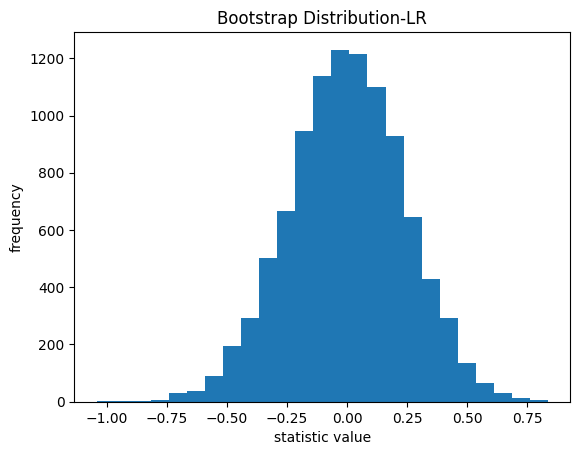

In [50]:
rng = np.random.default_rng()

data = (pred_error_lr,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-LR')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

In [53]:
y_test_predict = reg_lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = round(reg_lr.score(X_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 5.329714327288869
R2 score is 0.65




In [54]:
pred_error_lr = y_test_predict - y_test

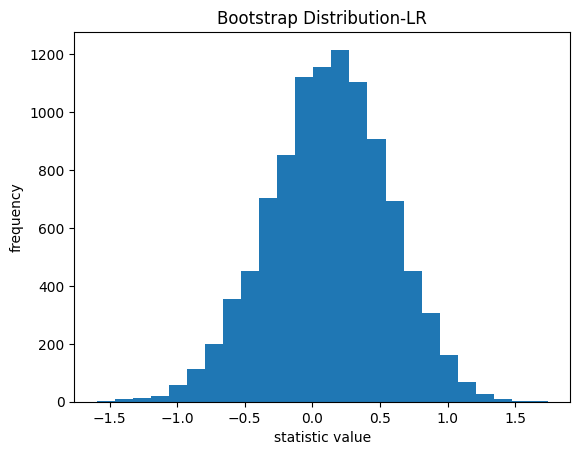

In [55]:
rng = np.random.default_rng()

data = (pred_error_lr,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-LR')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

### bias and variance decomposition

- on training dataset

In [34]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg_lr, X_train, y_train, X_train, y_train, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 21.399
Average bias: 20.196
Average variance: 1.203


- on testing dataset

In [33]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg_lr, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 29.891
Average bias: 28.609
Average variance: 1.282


## NN

In [36]:
from keras.layers import Activation

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=Activation('linear')),
    tf.keras.layers.Dense(64, activation=Activation('linear')),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(X_train, y_train, epochs=100, verbose=0)

mean_squared_error(model.predict(X_test), y_test)

5/5 [==============================] - 0s 1ms/step


34.813873087615114

In [38]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

12/12 [==============================] - 0s 872us/step
The model performance for training set
--------------------------------------
RMSE is 6.3668368827434305




In [39]:
pred_error_nn = np.squeeze(y_train_predict) - y_train

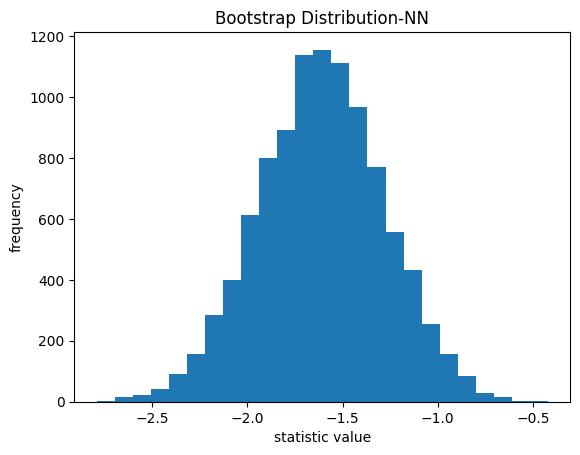

In [40]:
rng = np.random.default_rng()

data = (pred_error_nn,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-NN')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

In [41]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

5/5 [==============================] - 0s 1ms/step
The model performance for training set
--------------------------------------
RMSE is 5.900328218634546




In [42]:
pred_error_nn = np.squeeze(y_test_predict) - y_test

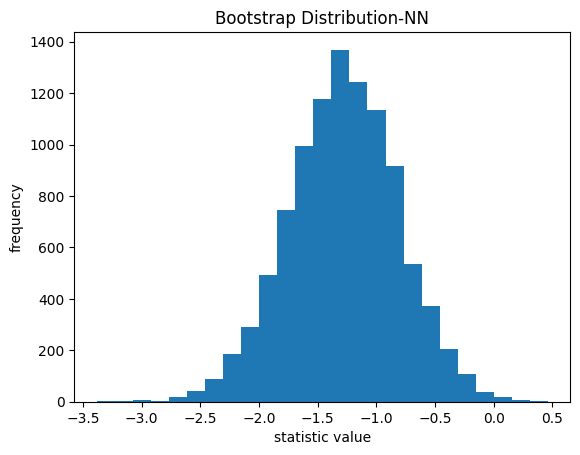

In [43]:
rng = np.random.default_rng()

data = (pred_error_nn,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-NN')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

In [51]:
np.mean(pred_error_lr)

-2.5360755554601315e-14

In [52]:
np.mean(pred_error_nn)

-1.2872643025297865

### ReLU

12/12 [==============================] - 0s 1ms/step
The model performance for training set
--------------------------------------
RMSE is 5.265188523235864




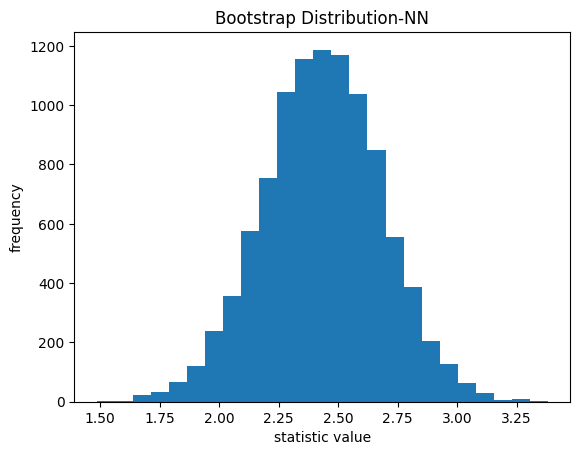

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(X_train, y_train, epochs=100, verbose=0)

mean_squared_error(model.predict(X_test), y_test)

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

pred_error_nn = np.squeeze(y_train_predict) - y_train
rng = np.random.default_rng()

data = (pred_error_nn,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-NN')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

12/12 [==============================] - 0s 1ms/step
The model performance for training set
--------------------------------------
RMSE is 5.584883933996565




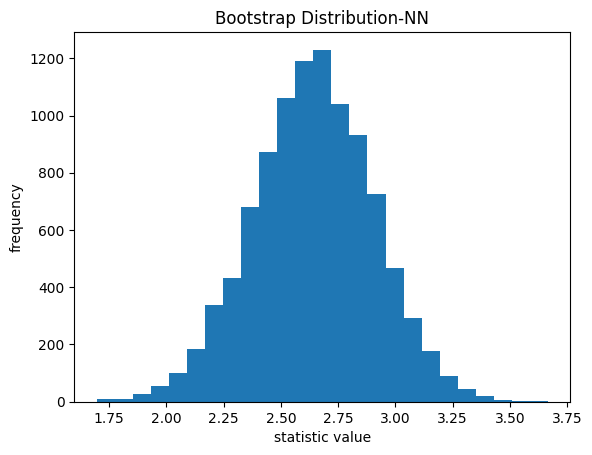

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(X_train, y_train, epochs=100, verbose=0)

mean_squared_error(model.predict(X_test), y_test)

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

pred_error_nn = np.squeeze(y_train_predict) - y_train
rng = np.random.default_rng()

data = (pred_error_nn,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-NN')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

12/12 [==============================] - 0s 933us/step
The model performance for training set
--------------------------------------
RMSE is 4.874847008418832




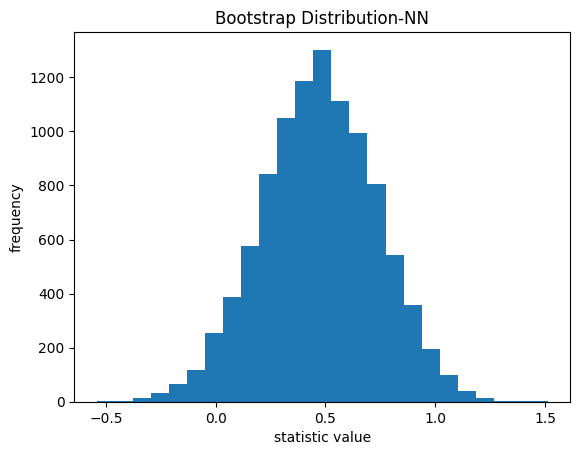

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(X_train, y_train, epochs=100, verbose=0)

mean_squared_error(model.predict(X_test), y_test)

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

pred_error_nn = np.squeeze(y_train_predict) - y_train
rng = np.random.default_rng()

data = (pred_error_nn,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-NN')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

12/12 [==============================] - 0s 972us/step
The model performance for training set
--------------------------------------
RMSE is 5.263687552686689




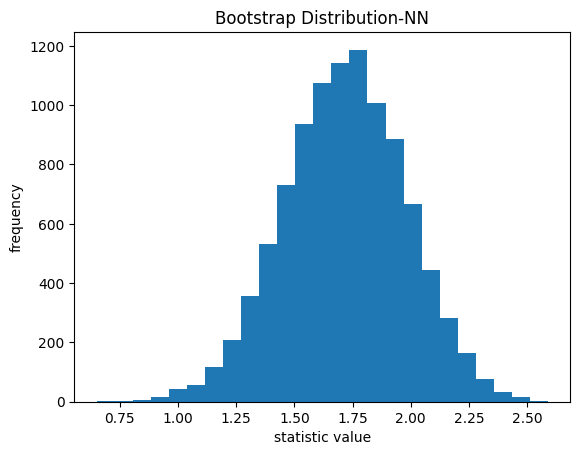

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(X_train, y_train, epochs=100, verbose=0)

mean_squared_error(model.predict(X_test), y_test)

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

pred_error_nn = np.squeeze(y_train_predict) - y_train
rng = np.random.default_rng()

data = (pred_error_nn,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-NN')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

12/12 [==============================] - 0s 977us/step
The model performance for training set
--------------------------------------
RMSE is 5.171802860064396




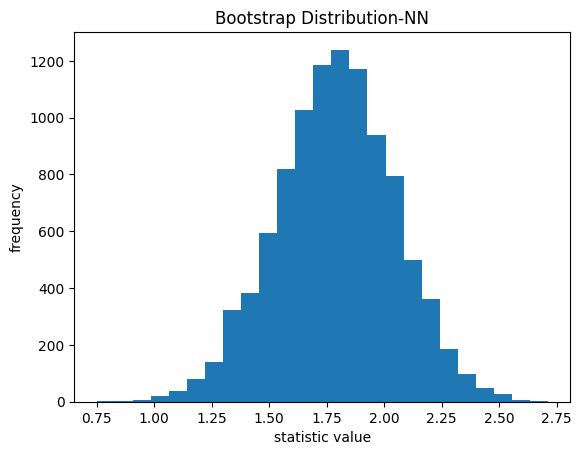

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(X_train, y_train, epochs=100, verbose=0)

mean_squared_error(model.predict(X_test), y_test)

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

pred_error_nn = np.squeeze(y_train_predict) - y_train
rng = np.random.default_rng()

data = (pred_error_nn,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-NN')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(X_train, y_train, epochs=100, verbose=0)

mean_squared_error(model.predict(X_test), y_test)

5/5 [==============================] - 0s 1ms/step


24.18792334768973

In [40]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

12/12 [==============================] - 0s 1ms/step
The model performance for training set
--------------------------------------
RMSE is 4.798229962145981




In [41]:
pred_error_nn = np.squeeze(y_train_predict) - y_train

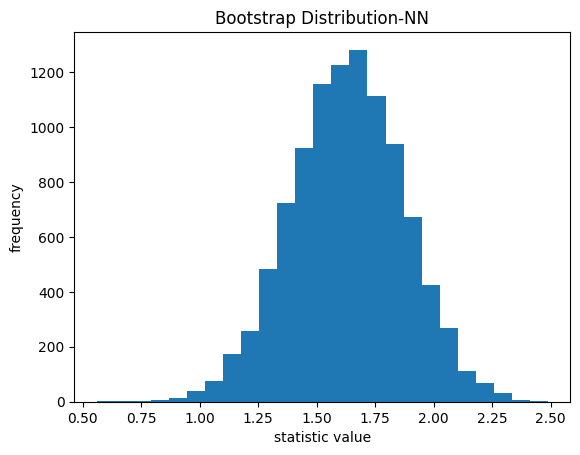

In [42]:
rng = np.random.default_rng()

data = (pred_error_nn,)  # samples must be in a sequence
res = bootstrap(data, np.mean, confidence_level=0.9,
                random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution-NN')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

- on training data

In [42]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, X_train, y_train, X_train, y_train,
        loss='mse',
        num_rounds=100,
        random_seed=123,
        epochs=200, # fit_param
        verbose=0) # fit_param


print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

/home/lei/anaconda3/envs/timeseries/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 901us/step
Average expected loss: 21.828
Average bias: 16.249
Average variance: 5.578


- on testing data

In [43]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, X_train, y_train, X_test, y_test, 
        loss='mse',
        num_rounds=100,
        random_seed=123,
        epochs=200, # fit_param
        verbose=0) # fit_param


print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

5/5 [==============================] - 0s 1ms/step
Average expected loss: 25.976
Average bias: 19.976
Average variance: 6.000
